# Surprise Housing Case Study
# Part - 1

#### Background :
Surprise Housing, a US Based Company, has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

The company is looking at prospective properties to buy to enter the market. 

#### Requirement : 
- To build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
The company wants to know:
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

#### Business Goal :
- To model the price of houses with the available independent variables. 
- This model will then be used by the management to understand how exactly the prices vary with the variables. 
- They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. 
- Further, the model will be a good way for management to understand the pricing dynamics of a new market.

#### Important Point To Note:
###### The company has collected a data set from the sale of houses in Australia. 
###### SalePrice of these House which were sold is Target Variable.

#### The solution is divided into the following sections:
- Case Study Part 1
    - Import Modules 
    - Data Understanding
    - Data Quality and Analysis
    - Data Exploration and Analysis
    - Univariate and Bivariate Analysis
    - Data preparation of Modelling
    - Model building and evaluation
    - Final Inference / Recommendation
- Case Study Part 2

# Import Libraries

In [1]:
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn.metrics as metrics
import os

# Model Build
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
import statsmodels.api as sm

# Evaluate Model
from sklearn.metrics import mean_squared_error, r2_score



# Hide warnings
import warnings
warnings.filterwarnings('ignore')

# Import Data

In [2]:
# Load the Data File
Housing_df = pd.read_csv('train.csv')

# Data Understanding

In [3]:
# Verifiy the Data Load - View 10 Rows
Housing_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
# Check number of rows and columns for the data - Print the data size
print("Number of Rows = ", Housing_df.shape[0])

print("Number of Columns = ", Housing_df.shape[1])

Number of Rows =  1460
Number of Columns =  81


In [5]:
# Based on the Data Dictionart, seems we have high number of columns and the values may not be displayed, we are increasing the maximum number of columns to be displayed
pd.options.display.max_columns = None

In [6]:
# View the Data types of the columns
Housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

###### Observation : 
- All required Libraties and Housing Data File is loaded.
- Housing Data has 1460 Rows and 80 Columns.
- Based on the Business Goal, 'SalePrice' is our Target Variable.
- Following Data Fields / Column have lower number of values, when compared to rest of data fields / columns
    - Alley - 91 values : Approx. 6% of rows have data for this column.
    - FireplaceQu - 770 values : Approx. 53% of rows have data for this column.
    - PoolQC - 7 Values : Approx. 0.48% of rows have data for this column.
    - Fence - 281 values : Approx. 19% of rows have data for this column.
    - MiscFeature - 54 values : Approx. 3.7% rows have data for this column.
- Inference :
    - Alley, PoolQA, Fence, MiscFeature may not be helpful in predicting the Target Variable.

#### Lets look at Data Ditctionary, confirm and assign appropriate data type updates to the columns.

In [7]:
# 'MSSubClass', 'OverallQual', 'OverallCond' data type is int, but by data dictionary definition it is a category / object data type
Housing_df[['MSSubClass', 'OverallQual', 'OverallCond']] = Housing_df[['MSSubClass', 'OverallQual', 'OverallCond']].astype(object)

In [8]:
# MoSold Column represents Month of the year 
Housing_df.MoSold = Housing_df.MoSold.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}).astype(object)

In [9]:
# View the Data types of the columns
Housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   object 
 18  OverallC

# Data Quality and Analysis

#### Data Quality Check

In [10]:
#Check for Null Values in the Data Set.
#lets list the columns with all null values these columns from the dataframe and assign it to a list
Housing_df.columns[Housing_df.isnull().all()]

Index([], dtype='object')

#### Observation :
- All Columns have atleast one values, i.e. there is no column in the data set will all values as NULL. 

In [11]:
# Lets check whether there are any rows with all null values
Housing_df.isnull().all(axis=1).sum()

0

#### Observation :
- There are no Rows ALL values as NULL, i.e. there is not a single row with all values in the columns as NULL.

In [12]:
# Check for duplicate rows
print("Duplicate Rows : ", Housing_df[Housing_df.duplicated()])

Duplicate Rows :  Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []


#### Observation : 
- There are no Duplicate Rows in the Data Set.

In [13]:
# Check for percentage of null or missing values in the columns of the data set.
null_perc = round(100*(Housing_df.isnull().sum()/len(Housing_df.index)), 2)
#Printing columns which have more than 0% missing values
print("Columns With NULL Values", '\n')
null_perc[ null_perc > 0 ]

Columns With NULL Values 



LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

#### Observation :
- Alley, FirePlaceQu, PoolQC, Fence, MiscFeature Columns have high percentage of NULL Values.
- First thing comes to mind, is to ignore these columns. But lets take look at Data Dictionary Definition before deciding.


###### Based on the Data Dictionary there are few columns which have value as 'NA', which may be considered as Missing Values. Following Columns have 'NA' Value, as per the data dictionary.
- Alley : Type of alley access to property - 'NA' = No alley access
- BsmtQual: Evaluates the height of the basement - 'NA' = No Basement
- BsmtCond: Evaluates the general condition of the basement - 'NA' = No Basement
- BsmtExposure: Refers to walkout or garden level walls - 'NA' = No Basement
- BsmtFinType1: Rating of basement finished area - 'NA' = No Basement
- BsmtFinType2: Rating of basement finished area (if multiple types) - 'NA' = No Basement
- If there is no Basement, then values of the following column/s may be null
    - BsmtFinSF1: Type 1 finished square feet
    - BsmtFinSF2: Type 2 finished square feet
    - BsmtUnfSF: Unfinished square feet of basement area
    - TotalBsmtSF: Total square feet of basement area
- FireplaceQu: Fireplace quality - 'NA' = No Fireplace
- IF there is no Fireplace then the below column/s values may be NULL
    - Fireplaces: Number of fireplaces
- GarageType: Garage location - 'NA' = No Garage
- GarageFinish: Interior finish of the garage - 'NA' = No Garage
- GarageQual: Garage quality - 'NA' = No Garage
- GarageCond: Garage condition - 'NA' = No Garage
- If there is no Garage then the below columns may have null values for corresponding records.
    - GarageCars: Size of garage in car capacity, 
    - GarageArea: Size of garage in square feet
- PoolQC: Pool quality - 'NA' = No Pool
- If there no Pool, then the below column/s values may be Null
    - PoolArea: Pool area in square feet : .
- Fence: Fence quality - 'NA' = No Fence
- MiscFeature: Miscellaneous feature not covered in other categories - 'NA' = None
- If there are no Miscellaneous feature then the below column/s values may be null
    - MiscVal: '$' Value of miscellaneous feature : .

#### So Lets Clean this data.

In [14]:
## Treating the NaN Values
# Alley
Housing_df['Alley'] = Housing_df['Alley'].fillna('No_Alley_Access')

# Basement
Housing_df['BsmtQual'] = Housing_df['BsmtQual'].fillna('No_Basement')
Housing_df['BsmtCond'] = Housing_df['BsmtCond'].fillna('No_Basement')
Housing_df['BsmtExposure'] = Housing_df['BsmtExposure'].fillna('No_Basement')
Housing_df['BsmtFinType1'] = Housing_df['BsmtFinType1'].fillna('No_Basement')
Housing_df['BsmtFinType2'] = Housing_df['BsmtFinType2'].fillna('No_Basement')
# If there is No Basement
Housing_df['BsmtFinSF1'] = Housing_df['BsmtFinSF1'].fillna(0)
Housing_df['BsmtFinSF2'] = Housing_df['BsmtFinSF2'].fillna(0)
Housing_df['BsmtUnfSF'] = Housing_df['BsmtUnfSF'].fillna(0)
Housing_df['TotalBsmtSF'] = Housing_df['TotalBsmtSF'].fillna(0)

# Fire Place
Housing_df['FireplaceQu'] = Housing_df['FireplaceQu'].fillna('No_FirePlace')
# If there is No Fire Place
Housing_df['Fireplaces'] = Housing_df['Fireplaces'].fillna(0)

# Garage
Housing_df['GarageType'] = Housing_df['GarageType'].fillna('No_Garage')
Housing_df['GarageFinish'] = Housing_df['GarageFinish'].fillna('No_Garage')
Housing_df['GarageQual'] = Housing_df['GarageQual'].fillna('No_Garage')
Housing_df['GarageCond'] = Housing_df['GarageCond'].fillna('No_Garage')
# If there is No Garage
Housing_df['GarageCars'] = Housing_df['GarageCars'].fillna(0)
Housing_df['GarageArea'] = Housing_df['GarageArea'].fillna(0)

# Pool
Housing_df['PoolQC'] = Housing_df['PoolQC'].fillna('No_Pool')
# If there is No Pool, then
Housing_df['PoolArea'] = Housing_df['PoolArea'].fillna(0)

# Fence
Housing_df['Fence'] = Housing_df['Fence'].fillna('No_Fence')

# Miscelleanous Features
Housing_df['MiscFeature'] = Housing_df['MiscFeature'].fillna('None')
# If there is No Miscelleanous Features, then
Housing_df['MiscVal'] = Housing_df['MiscVal'].fillna(0)

# Other Columns
# Update Null Values with Zeros
Housing_df['LotFrontage'] = Housing_df['LotFrontage'].fillna(0)
Housing_df['MasVnrArea'] = Housing_df['MasVnrArea'].fillna(0)
Housing_df['MasVnrType'] = Housing_df['MasVnrType'].fillna(0)

# Electrical is a Object Type, so filling it with 'None'
Housing_df['Electrical'] = Housing_df['Electrical'].fillna("None")

In [15]:
#Lets Reconfirm whether we have handled the missing / NULL Values -  percentage of null or missing values
null_perc = round(100*(Housing_df.isnull().sum()/len(Housing_df.index)), 2)
#Printing columns which have more than 0% missing values
print("Columns With NULL Values, after Handling", '\n')
null_perc[ null_perc > 0 ]

Columns With NULL Values, after Handling 



GarageYrBlt    5.55
dtype: float64

#### Observation:
- We have handled all the Null and Missing Values and updated the data set.

In [16]:
# # Lets check the statistical description 
Housing_df.describe()

Id  LotFrontage        LotArea    YearBuilt  YearRemodAdd  \
count  1460.000000  1460.000000    1460.000000  1460.000000   1460.000000   
mean    730.500000    57.623288   10516.828082  1971.267808   1984.865753   
std     421.610009    34.664304    9981.264932    30.202904     20.645407   
min       1.000000     0.000000    1300.000000  1872.000000   1950.000000   
25%     365.750000    42.000000    7553.500000  1954.000000   1967.000000   
50%     730.500000    63.000000    9478.500000  1973.000000   1994.000000   
75%    1095.250000    79.000000   11601.500000  2000.000000   2004.000000   
max    1460.000000   313.000000  215245.000000  2010.000000   2010.000000   

        MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean    103.117123   443.639726    46.549315   567.240411  1057.429452   
std     180.731373   456.098091   161.319273   441.866955   438.705324   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000   223.000000   795.750000   
50%       0.000000   383.500000     0.000000   477.500000   991.500000   
75%     164.250000   712.250000     0.000000   808.000000  1298.250000   
max    1600.000000  5644.000000  1474.000000  2336.000000  6110.000000   

          1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  \
count  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000   
mean   1162.626712   346.992466      5.844521  1515.463699      0.425342   
std     386.587738   436.528436     48.623081   525.480383      0.518911   
min     334.000000     0.000000      0.000000   334.000000      0.000000   
25%     882.000000     0.000000      0.000000  1129.500000      0.000000   
50%    1087.000000     0.000000      0.000000  1464.000000      0.000000   
75%    1391.250000   728.000000      0.000000  1776.750000      1.000000   
max    4692.000000  2065.000000    572.000000  5642.000000      3.000000   

       BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  \
count   1460.000000  1460.000000  1460.000000   1460.000000   1460.000000   
mean       0.057534     1.565068     0.382877      2.866438      1.046575   
std        0.238753     0.550916     0.502885      0.815778      0.220338   
min        0.000000     0.000000     0.000000      0.000000      0.000000   
25%        0.000000     1.000000     0.000000      2.000000      1.000000   
50%        0.000000     2.000000     0.000000      3.000000      1.000000   
75%        0.000000     2.000000     1.000000      3.000000      1.000000   
max        2.000000     3.000000     2.000000      8.000000      3.000000   

       TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars   GarageArea  \
count   1460.000000  1460.000000  1379.000000  1460.000000  1460.000000   
mean       6.517808     0.613014  1978.506164     1.767123   472.980137   
std        1.625393     0.644666    24.689725     0.747315   213.804841   
min        2.000000     0.000000  1900.000000     0.000000     0.000000   
25%        5.000000     0.000000  1961.000000     1.000000   334.500000   
50%        6.000000     1.000000  1980.000000     2.000000   480.000000   
75%        7.000000     1.000000  2002.000000     2.000000   576.000000   
max       14.000000     3.000000  2010.000000     4.000000  1418.000000   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.00

# Data Exploration and Visualization

#### Notice that there are few Year columns - 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt'.
- These are not truly Float / Int data, so we need to explore and assign / convert them to appropriate data type.
- Year Sold data does not make much sense, SalePrice is showing strong relation with the YearBlt Variable.
- We Can compute the Age of the House, based on the YearBuilt and Year Sold, check whether this showing any trend.
- We can apply the same for GarageBuilt and Year Remodelling, to check SalePrice Variations.
- Please note that this is data of Sale, so the value of house as per age of the House, Post Age after it was Remodelled and age after the Garage was re-built makes sense. As Age of the house makes sense with respect to SalePrice.

In [17]:
# Compute Age of the House
#Add Derived Columns - Year, Month from issue_d
Housing_df['House_age'] = Housing_df['YrSold'] - Housing_df['YearBuilt']
Housing_df['Remodel_age'] = Housing_df['YrSold'] - Housing_df['YearRemodAdd']
Housing_df['Garage_age'] = Housing_df['YrSold'] - Housing_df['GarageYrBlt']

In [18]:
# Check the Unique Values
print("House Age : ", '\n',Housing_df.House_age.unique())
print('\n')
print("Remodel Age : ", '\n',Housing_df.Remodel_age.unique())
print('\n')
print("Garage Age : ", '\n', Housing_df.Garage_age.unique())

House Age :  
 [  5  31   7  91   8  16   3  36  77  69  43   1  46  48  78  40  39   4
  51   6  42   2  59  49  81  88  15  55  57  53  41  24  33  47  89  10
  72  25  52  44   0  87  12  65  34  11  56  95  60  99  14  94  13  45
  97  90  30  76 122  54  62  20  37  68  50  71   9  38  18  58  70  32
  35  83  84  66  19  22  86  98 114  93  75  82  17 106  29  96  27  92
 128  61  67  21  26 108  28  63  73  74  80 115 126 102  85  23 110 117
 129  64 100 111 104 119 127 107 135 109 136 103  79 125]


Remodel Age :  
 [ 5 31  6 36  8 14  2 58 43  0 46 48 40 39  4 44 57  9 10  1 51 19  3 53
 41 24 28 47 56 52 11 60 21 34  7 42 13 27 12 45 16 25 30 33 54 20 37 50
 15 38 17 32 35 22 18 59 29 49 26 -1 55 23]


Garage Age :  
 [  5.  31.   7.   8.  16.   3.  36.  77.  69.  43.   1.  46.  48.  40.
  39.   4.  51.   6.  42.   2.  49.  88.  14.  55.  57.  nan  41.  24.
  47.  10.  21.  25.  45.  44.   0.  35.  72.  20.  11.  65.  53.  34.
  95.  52.  60.  33.  15.  56. 107.  90.  30.  54

#### Observation :
- We have a negative value for Remodel Age, seems the house was sold and later remodelled, so lets replace it 0.
- We also have NaN value in Garage Built, seems that Garage was build along with the House or the house does not have Garage, so lets replace it with 0.

In [19]:
# Replace Remodel Age < 0, as 0
Housing_df.Remodel_age[Housing_df['Remodel_age'] < 0] = 0
# Replace NaN values in Garage Age with Zero
Housing_df['Garage_age'] = Housing_df['Garage_age'].fillna(0)
#Convert them to Int Type
Housing_df['House_age'] = Housing_df['House_age'].astype(int)
Housing_df['Remodel_age']=Housing_df['Remodel_age'].astype(int)
Housing_df['Garage_age'] =Housing_df['Garage_age'].astype(int)

In [20]:
# Check the Unique Values
print("House Age : ", '\n',Housing_df.House_age.unique())
print('\n')
print("Remodel Age : ", '\n',Housing_df.Remodel_age.unique())
print('\n')
print("Garage Age : ", '\n', Housing_df.Garage_age.unique())

House Age :  
 [  5  31   7  91   8  16   3  36  77  69  43   1  46  48  78  40  39   4
  51   6  42   2  59  49  81  88  15  55  57  53  41  24  33  47  89  10
  72  25  52  44   0  87  12  65  34  11  56  95  60  99  14  94  13  45
  97  90  30  76 122  54  62  20  37  68  50  71   9  38  18  58  70  32
  35  83  84  66  19  22  86  98 114  93  75  82  17 106  29  96  27  92
 128  61  67  21  26 108  28  63  73  74  80 115 126 102  85  23 110 117
 129  64 100 111 104 119 127 107 135 109 136 103  79 125]


Remodel Age :  
 [ 5 31  6 36  8 14  2 58 43  0 46 48 40 39  4 44 57  9 10  1 51 19  3 53
 41 24 28 47 56 52 11 60 21 34  7 42 13 27 12 45 16 25 30 33 54 20 37 50
 15 38 17 32 35 22 18 59 29 49 26 55 23]


Garage Age :  
 [  5  31   7   8  16   3  36  77  69  43   1  46  48  40  39   4  51   6
  42   2  49  88  14  55  57   0  41  24  47  10  21  25  45  44  35  72
  20  11  65  53  34  95  52  60  33  15  56 107  90  30  54  62  37  28
  50   9  38  17  12  78  70  32  83  81  19  

In [21]:
Housing_df[['House_age','Remodel_age','Garage_age']].describe()

House_age  Remodel_age   Garage_age
count  1460.000000  1460.000000  1460.000000
mean     36.547945    22.950685    27.680137
std      30.250152    20.639875    24.950144
min       0.000000     0.000000     0.000000
25%       8.000000     4.000000     4.000000
50%      35.000000    14.000000    23.500000
75%      54.000000    41.000000    46.000000
max     136.000000    60.000000   107.000000

In [22]:
#Create categorical derived Age Columns
# Based on the Max Values, create Bins
Housing_df['House_age_catg'] = pd.cut(Housing_df['House_age'], bins=15,precision =0,labels=['0-5','6-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100', '101-110','111-120','121-130', '131-140'])
Housing_df['Remodel_age_catg'] = pd.cut(Housing_df['Remodel_age'], bins=7,precision =0,labels=['0-5','6-10','11-20','21-30','31-40','41-50','51-60'])
Housing_df['Garage_age_catg'] = pd.cut(Housing_df['Garage_age'], bins=12,precision =0,labels=['0-5','6-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100', '101-110'])

In [23]:
Housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 87 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Id                1460 non-null   int64   
 1   MSSubClass        1460 non-null   object  
 2   MSZoning          1460 non-null   object  
 3   LotFrontage       1460 non-null   float64 
 4   LotArea           1460 non-null   int64   
 5   Street            1460 non-null   object  
 6   Alley             1460 non-null   object  
 7   LotShape          1460 non-null   object  
 8   LandContour       1460 non-null   object  
 9   Utilities         1460 non-null   object  
 10  LotConfig         1460 non-null   object  
 11  LandSlope         1460 non-null   object  
 12  Neighborhood      1460 non-null   object  
 13  Condition1        1460 non-null   object  
 14  Condition2        1460 non-null   object  
 15  BldgType          1460 non-null   object  
 16  HouseStyle        1460 n

In [24]:
# Droping Redundant Year Columns, for which we have created Age Categoricals Bins.
Housing_df.drop(['YrSold','YearBuilt','YearRemodAdd','GarageYrBlt', 'House_age','Remodel_age','Garage_age'], axis=1, inplace=True)

In [25]:
Housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Id                1460 non-null   int64   
 1   MSSubClass        1460 non-null   object  
 2   MSZoning          1460 non-null   object  
 3   LotFrontage       1460 non-null   float64 
 4   LotArea           1460 non-null   int64   
 5   Street            1460 non-null   object  
 6   Alley             1460 non-null   object  
 7   LotShape          1460 non-null   object  
 8   LandContour       1460 non-null   object  
 9   Utilities         1460 non-null   object  
 10  LotConfig         1460 non-null   object  
 11  LandSlope         1460 non-null   object  
 12  Neighborhood      1460 non-null   object  
 13  Condition1        1460 non-null   object  
 14  Condition2        1460 non-null   object  
 15  BldgType          1460 non-null   object  
 16  HouseStyle        1460 n

###### Let's Separate the Categorical (Object) type and Numerical (float / Int) Type columns


In [26]:
# Extract all Categorical and Numeric Values into separate DF

# Exrract all Categorical Columns
df_catg = Housing_df.select_dtypes(include=['object','category'])
print("Categorical Data : Rows - ",df_catg.shape[0], "Columns - ",df_catg.shape[1]) 

## Extract Numerical columns
df_numeric = Housing_df.select_dtypes(include=['int64', 'float64'])
print("Numerical Data : Rows - ",df_numeric.shape[0], "Columns - ",df_numeric.shape[1]) 

Categorical Data : Rows -  1460 Columns -  50
Numerical Data : Rows -  1460 Columns -  30


# Univariate and Bivariate Analysis 
- Analyze and take appropriate action.

#### Numerical Data Analysis

In [27]:
# Numberical Data - Columns List
df_numeric.columns

Index(['Id', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice'],
      dtype='object')

In [28]:
###### Check Correlation for the numerical variables
# correlation matrix
co_rel = df_numeric.corr()
## Removing the Null / NaN values in correlation
co_rel_notna = ~co_rel.isna().all()
co_rel = co_rel.loc[co_rel_notna, co_rel_notna]
co_rel

Id  LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  \
Id             1.000000    -0.019761 -0.033226   -0.051071   -0.005024   
LotFrontage   -0.019761     1.000000  0.100739    0.105010    0.076670   
LotArea       -0.033226     0.100739  1.000000    0.103321    0.214103   
MasVnrArea    -0.051071     0.105010  0.103321    1.000000    0.261256   
BsmtFinSF1    -0.005024     0.076670  0.214103    0.261256    1.000000   
BsmtFinSF2    -0.005968    -0.009312  0.111170   -0.071330   -0.050117   
BsmtUnfSF     -0.007940     0.160829 -0.002618    0.113862   -0.495251   
TotalBsmtSF   -0.015415     0.238274  0.260833    0.360067    0.522396   
1stFlrSF       0.010496     0.245181  0.299475    0.339850    0.445863   
2ndFlrSF       0.005590     0.042549  0.050986    0.173800   -0.137079   
LowQualFinSF  -0.044230     0.049981  0.004779   -0.068628   -0.064503   
GrLivArea      0.008273     0.220347  0.263116    0.388052    0.208171   
BsmtFullBath   0.002289     0.010514  0.158155    0.083010    0.649212   
BsmtHalfBath  -0.020155    -0.027856  0.048046    0.027403    0.067418   
FullBath       0.005587     0.120548  0.126031    0.272999    0.058543   
HalfBath       0.006784    -0.012952  0.014259    0.199108    0.004262   
BedroomAbvGr   0.037719     0.144494  0.119690    0.102775   -0.107355   
KitchenAbvGr   0.002951     0.034425 -0.017784   -0.038450   -0.081007   
TotRmsAbvGrd   0.027239     0.221396  0.190015    0.279568    0.044316   
Fireplaces    -0.019772     0.044018  0.271364    0.247015    0.260011   
GarageCars     0.016570     0.165229  0.154871    0.361945    0.224054   
GarageArea     0.017634     0.201473  0.180403    0.370884    0.296970   
WoodDeckSF    -0.029643    -0.016780  0.171698    0.159991    0.204306   
OpenPorchSF   -0.000477     0.069605  0.084774    0.122528    0.111761   
EnclosedPorch  0.002889     0.027366 -0.018340   -0.109907   -0.102303   
3SsnPorch     -0.046635     0.023499  0.020423    0.019144    0.026451   
ScreenPorch    0.001330     0.022969  0.043160    0.062248    0.062021   
PoolArea       0.057044     0.114106  0.077672    0.011928    0.140491   
MiscVal       -0.006242    -0.059606  0.038068   -0.029512    0.003571   
SalePrice     -0.021917     0.209624  0.263843    0.472614    0.386420   

               BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
Id              -0.005968  -0.007940    -0.015415  0.010496  0.005590   
LotFrontage     -0.009312   0.160829     0.238274  0.245181  0.042549   
LotArea          0.111170  -0.002618     0.260833  0.299475  0.050986   
MasVnrArea      -0.071330   0.113862     0.360067  0.339850  0.173800   
BsmtFinSF1      -0.050117  -0.495251     0.522396  0.445863 -0.137079   
BsmtFinSF2       1.000000  -0.209294     0.104810  0.097117 -0.099260   
BsmtUnfSF       -0.209294   1.000000     0.415360  0.317987  0.004469   
TotalBsmtSF      0.104810   0.415360     1.000000  0.819530 -0.174512   
1stFlrSF         0.097117   0.317987     0.819530  1.000000 -0.202646   
2ndFlrSF        -0.099260   0.004469    -0.174512 -0.202646  1.000000   
LowQualFinSF     0.014807   0.028167    -0.033245 -0.014241  0.063353   
GrLivArea       -0.009640   0.240257     0.454868  0.566024  0.687501   
BsmtFullBath     0.158678  -0.422900     0.307351  0.244671 -0.169494   
BsmtHalfBath     0.070948  -0.095804    -0.000315  0.001956 -0.023855   
FullBath        -0.076444   0.288886     0.323722  0.380637  0.421378   
HalfBath        -0.032148  -0.041118    -0.048804 -0.119916  0.609707   
BedroomAbvGr    -0.015728   0.166643     0.050450  0.127401  0.502901   
KitchenAbvGr    -0.040751   0.030086    -0.068901  0.068101  0.059306   
TotRmsAbvGrd    -0.035227   0.250647     0.285573  0.409516  0.616423   
Fireplaces       0.046921   0.051575     0.339519  0.410531  0.194561   
GarageCars      -0.038264   0.214175     0.434585  0.439317  0.183926   
GarageArea      -0.018227   0.183303     0.486665  0.489782  0.138347   
WoodDeckSF       0.067898  -0.005316     0.2320

<AxesSubplot:>

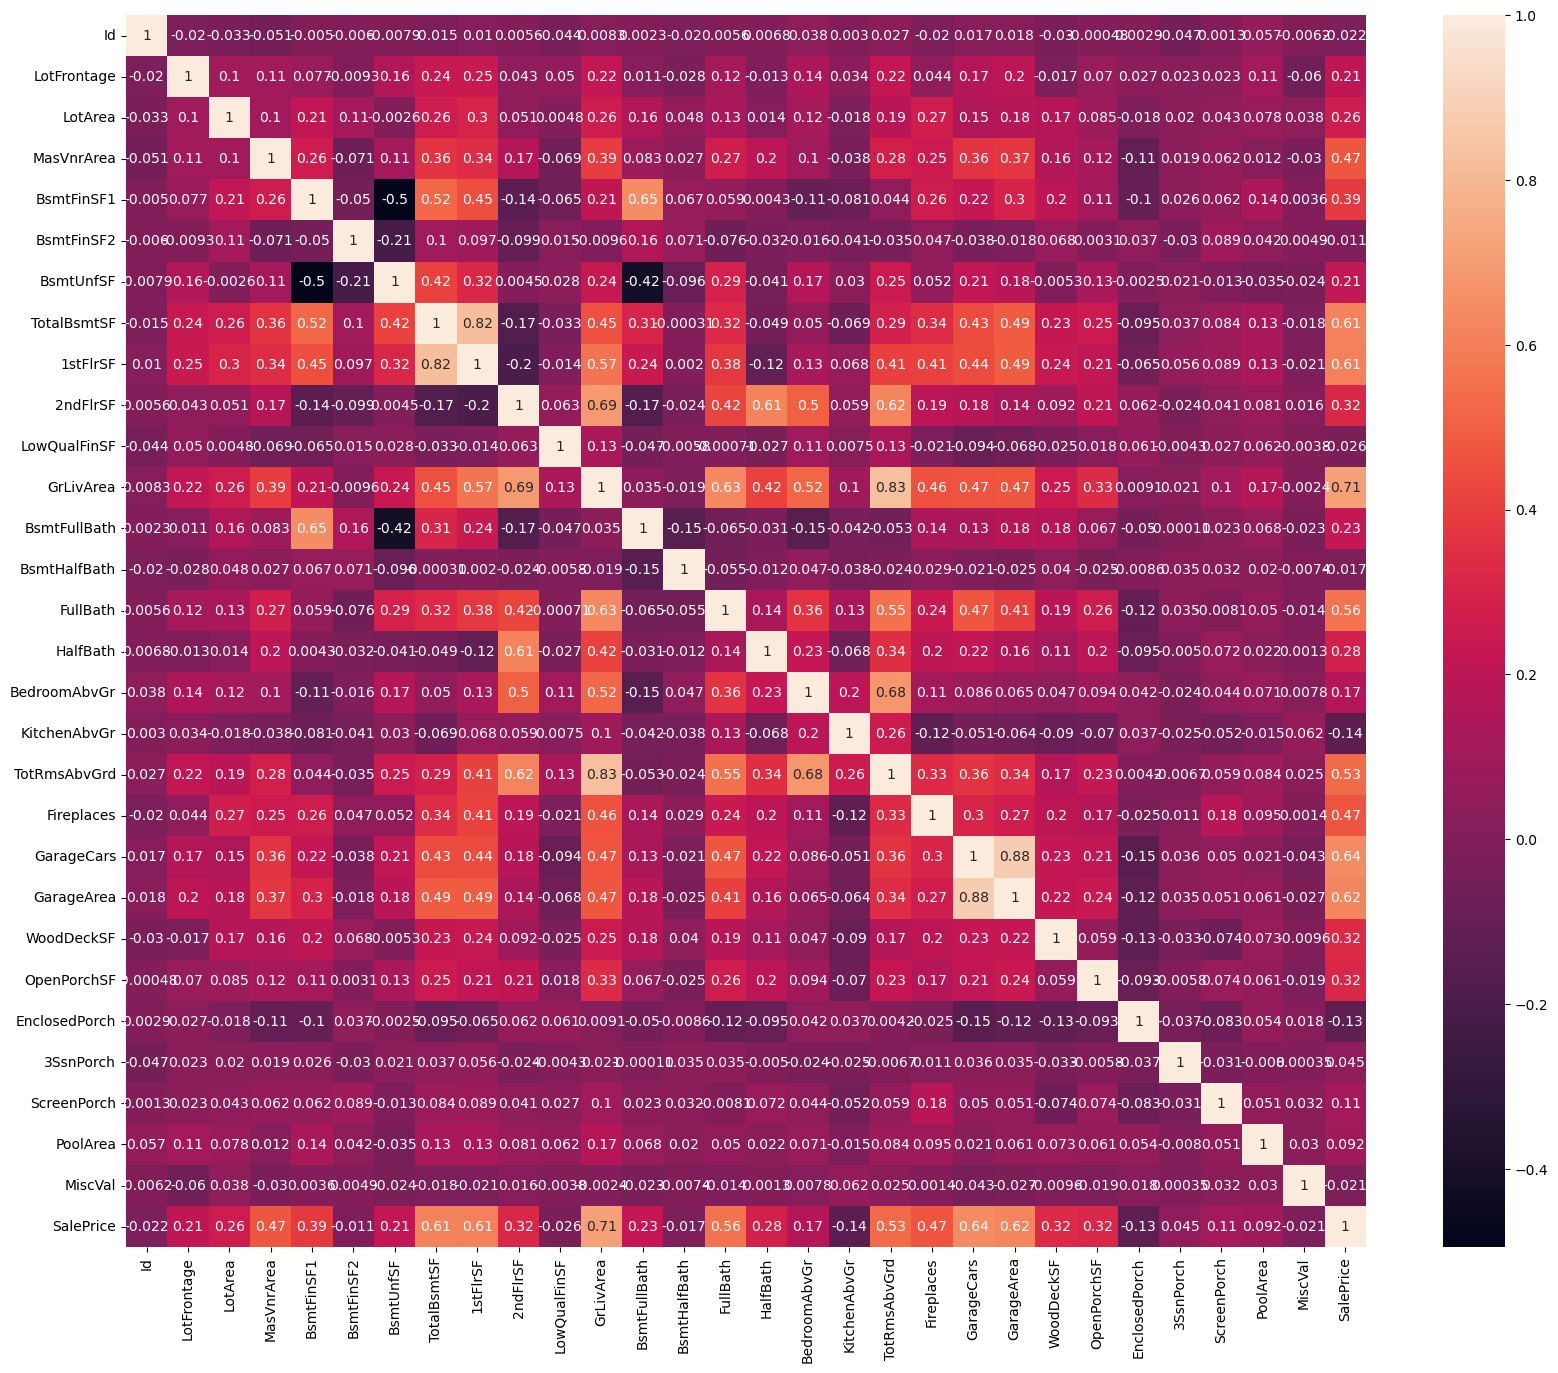

In [29]:
# Lets View the same in Heat Map
# Heat Map for Correlation
plt.subplots(figsize=(20,16))
sns.heatmap(co_rel, annot=True)

#### Observation:
- Hihg Correlinearity between the following variables:
    - 1stFlrSF and TotalBsmtSF : 0.81953
    - TotRmsAbvGrd and GrLivArea : 0.825489
    - GarageCars and GarageArea : 0.882475
- We can look forward to drop one from these pair of collinear variables.
- As there is multicollinearity among predictors in our data, it would be good to use Ridge / Lasso Regression.

#### Visualize Numerical Data

<Figure size 1500x500 with 0 Axes>

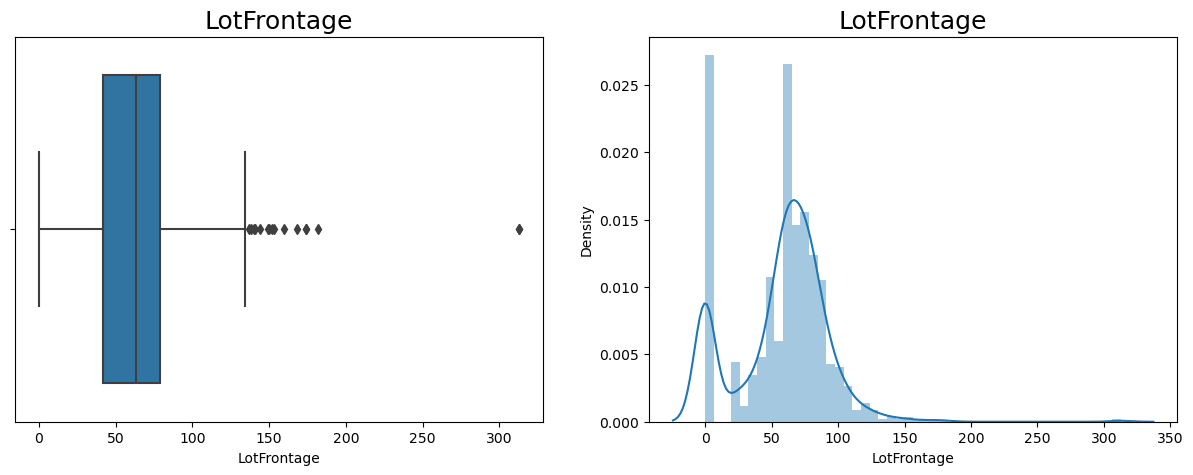

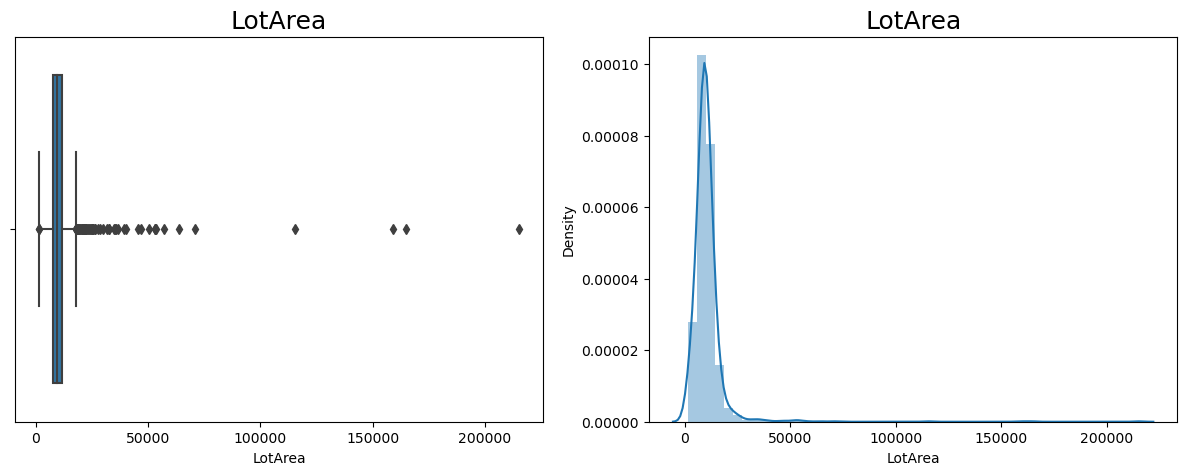

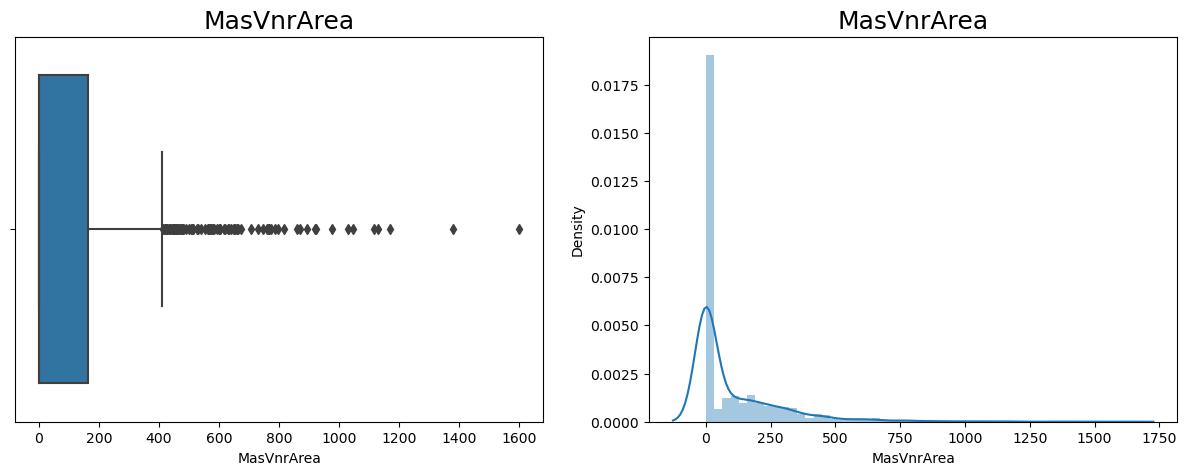

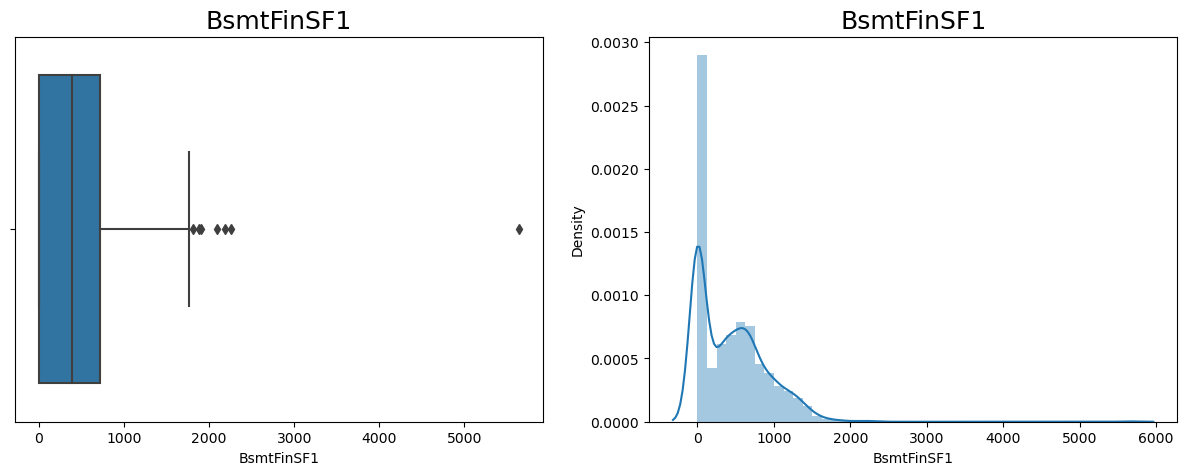

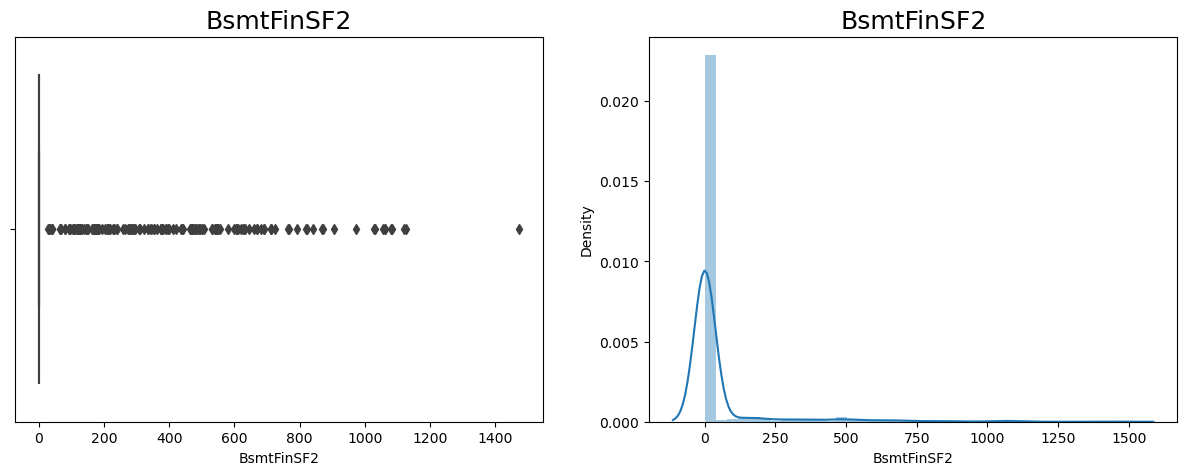

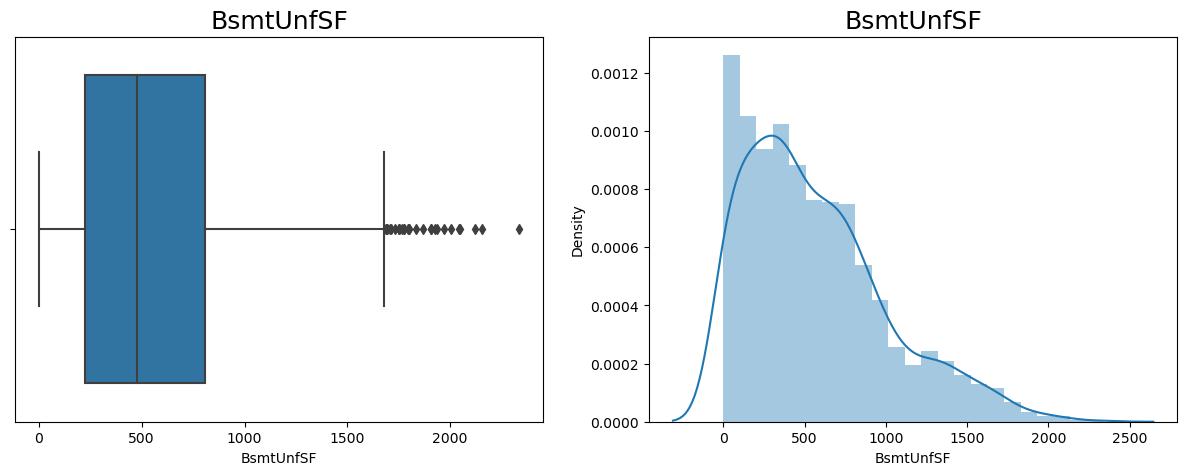

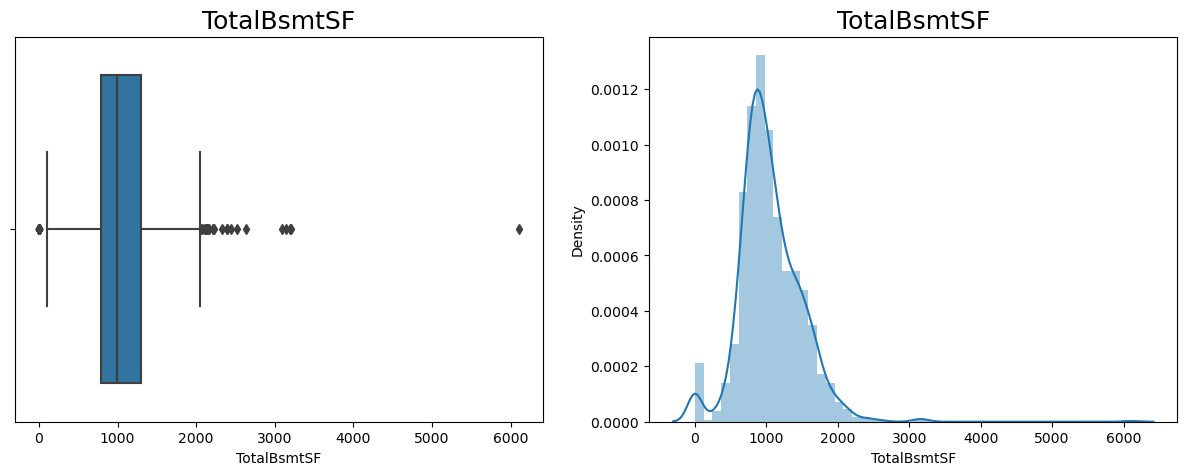

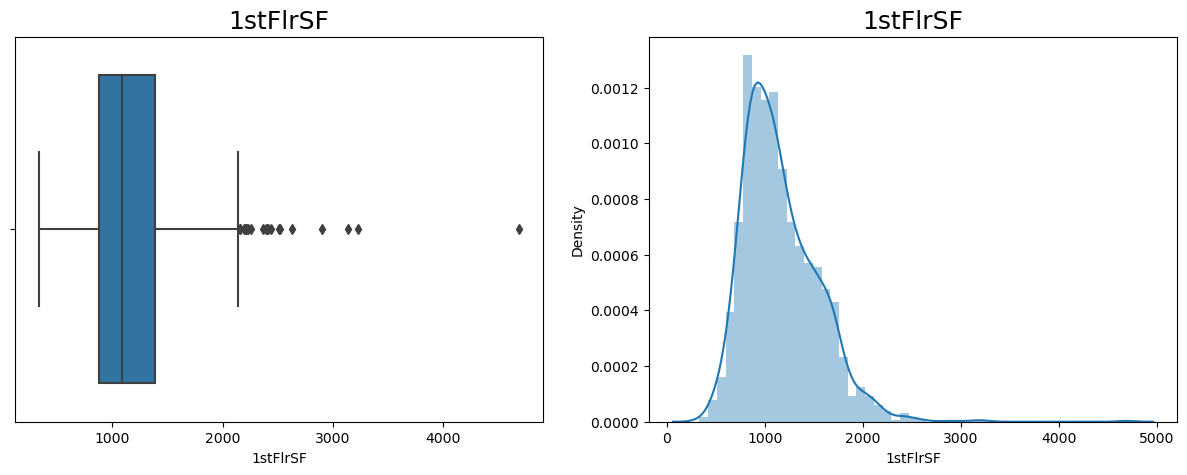

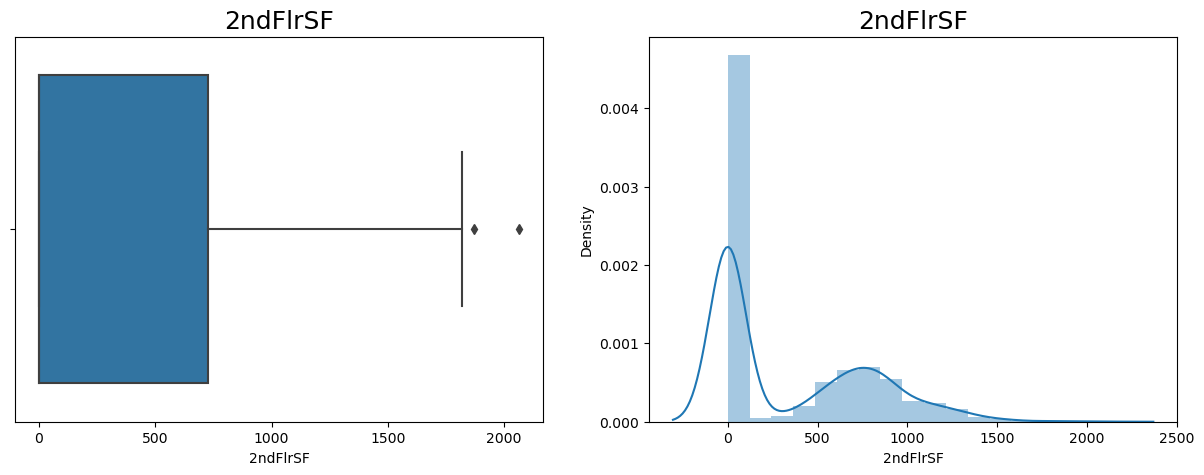

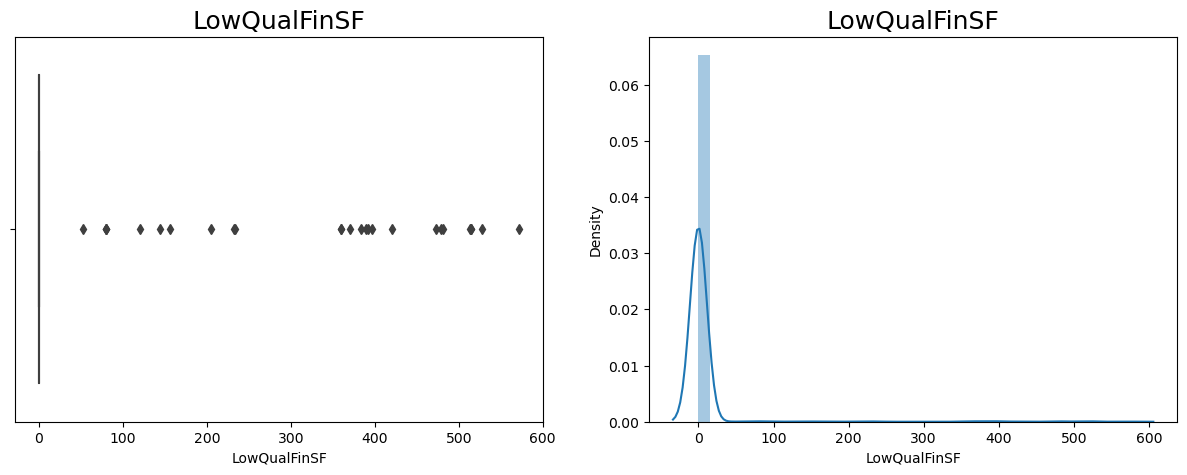

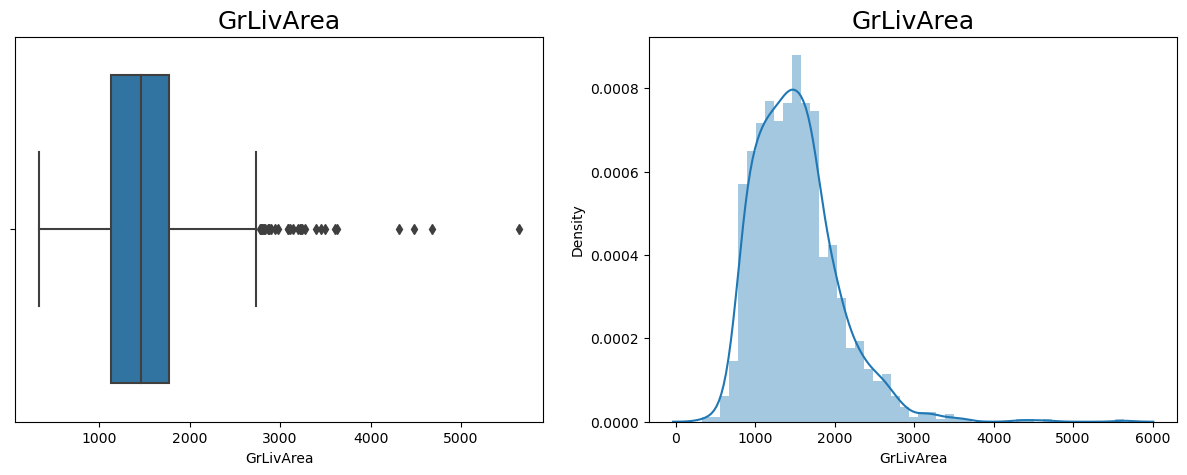

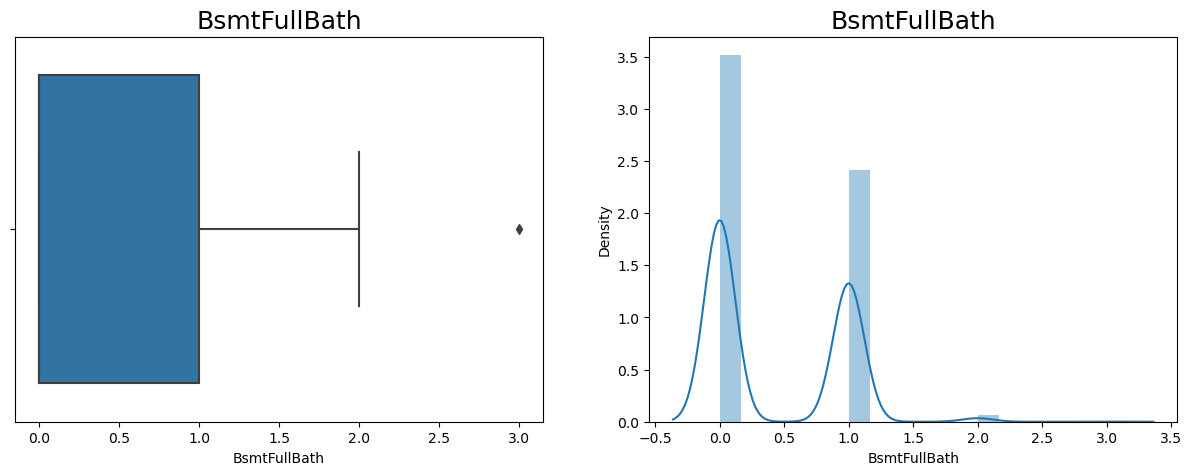

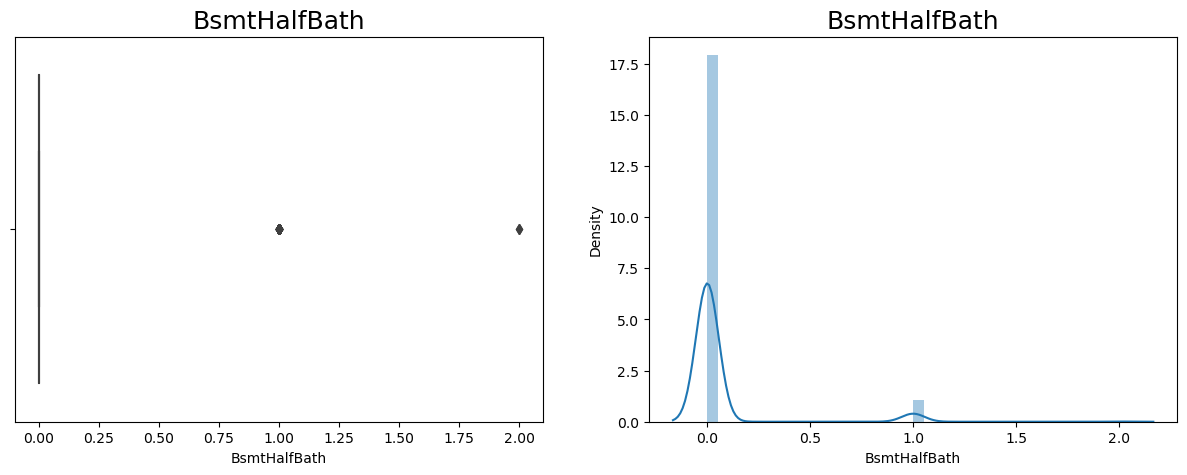

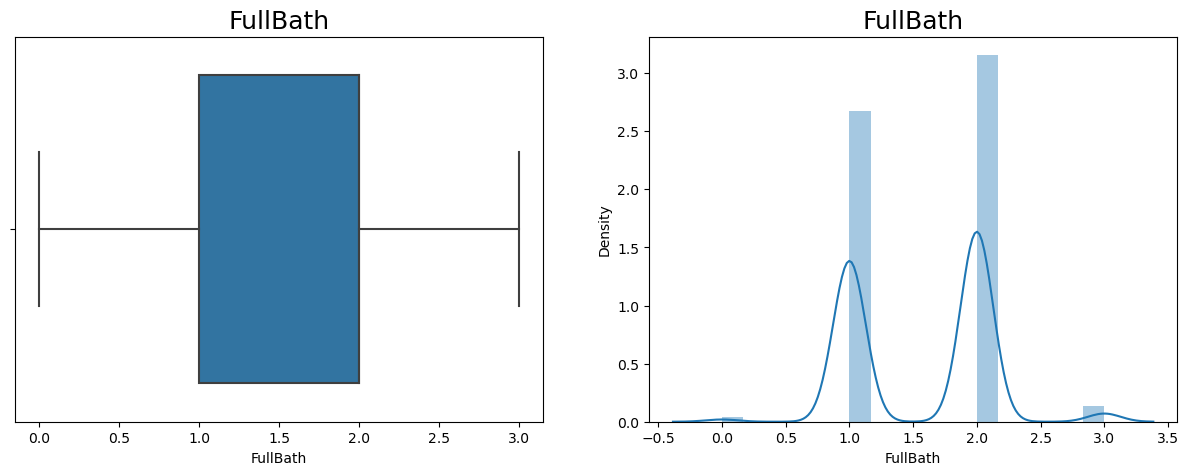

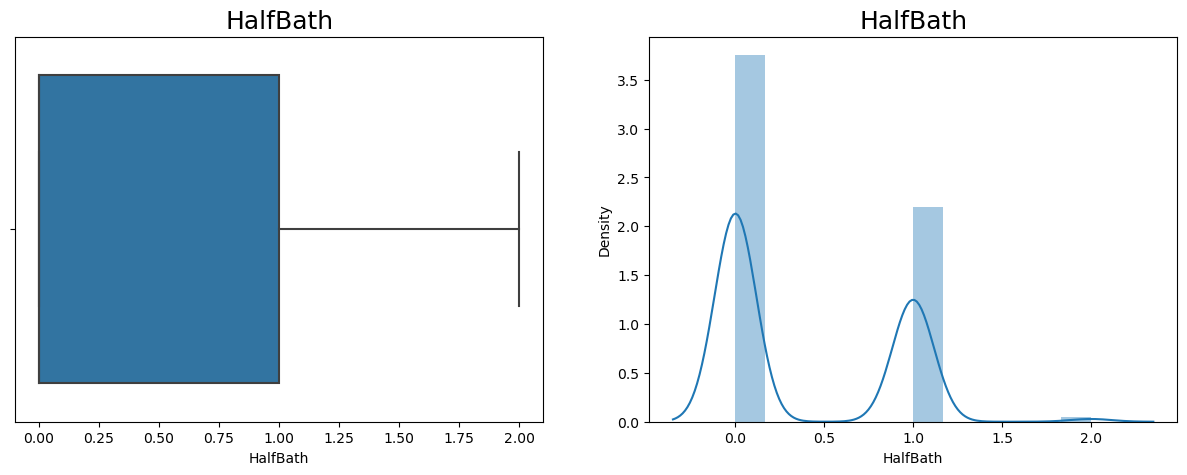

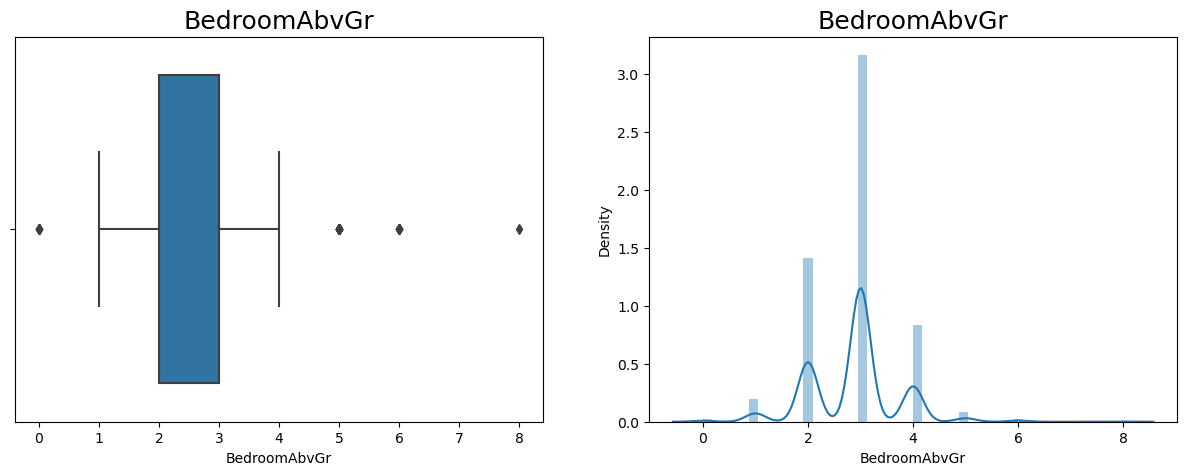

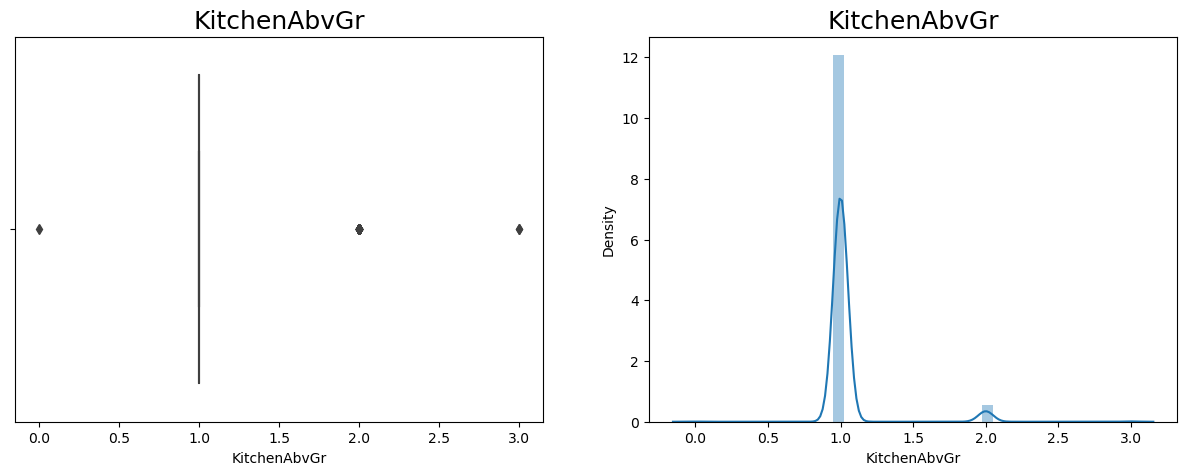

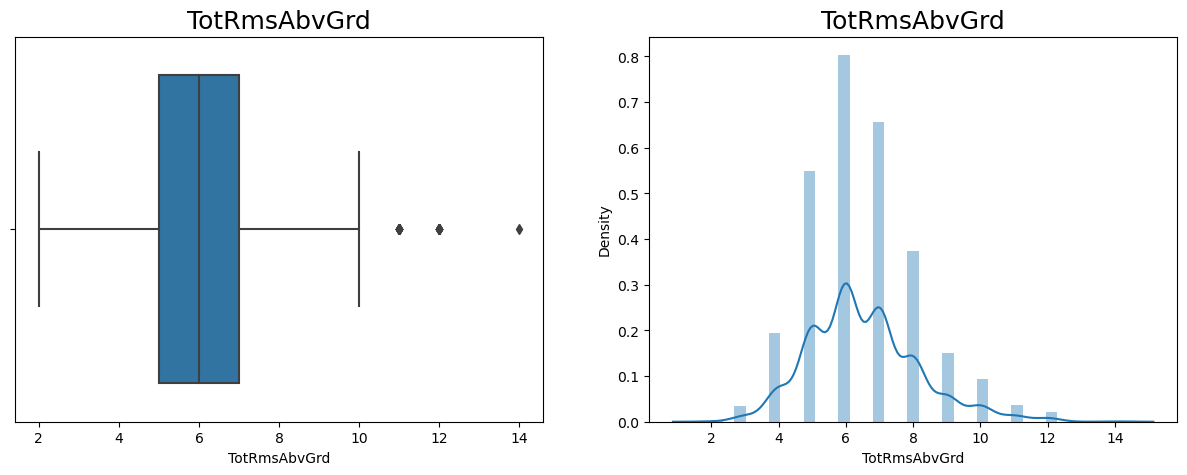

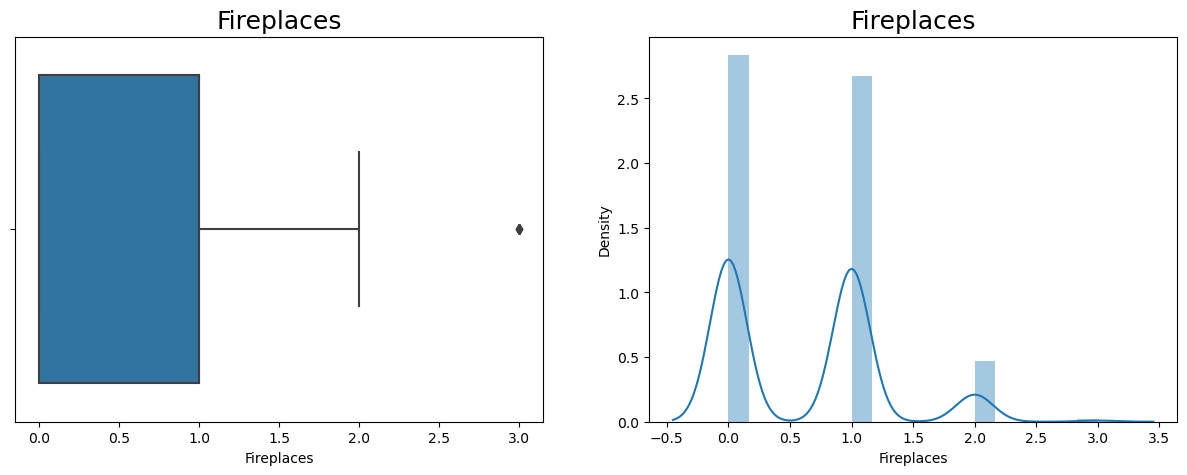

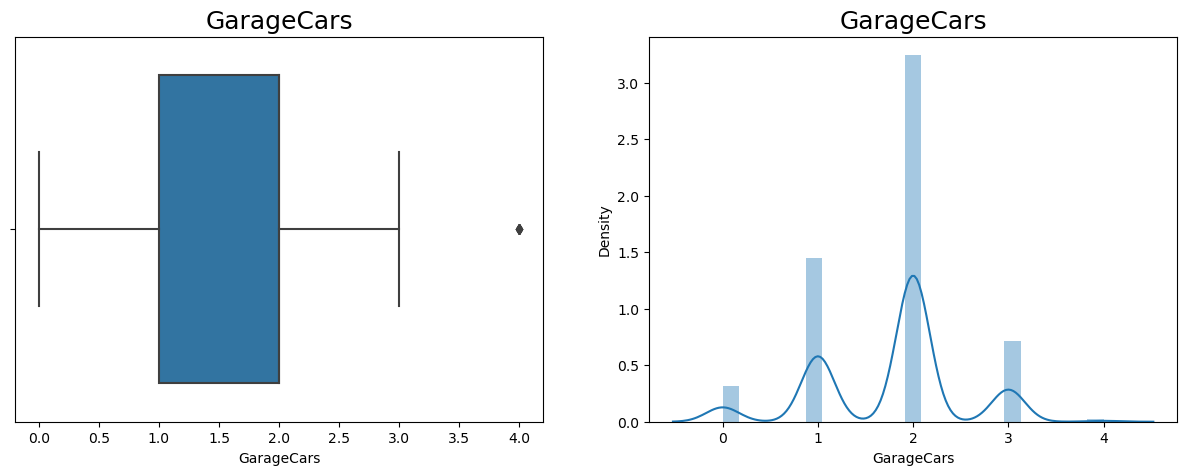

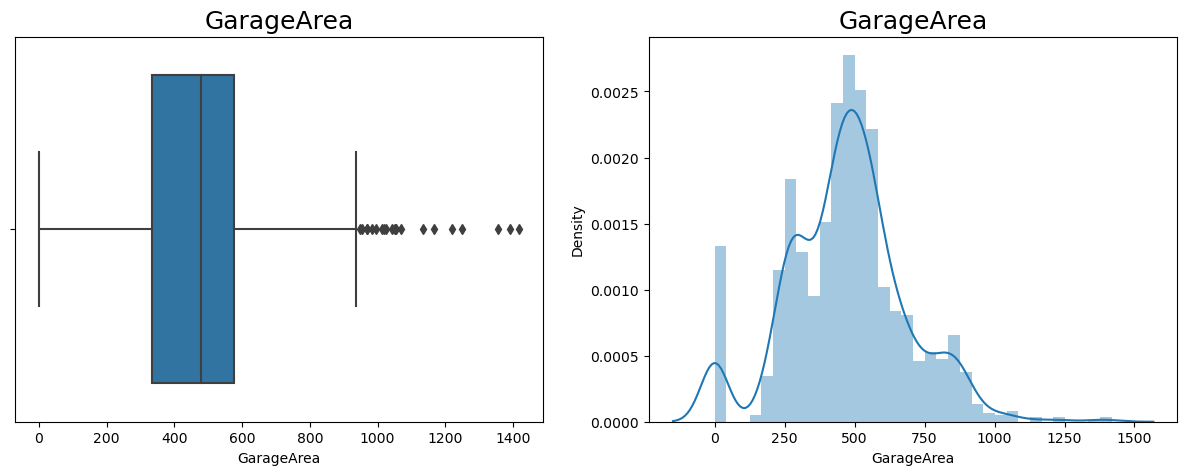

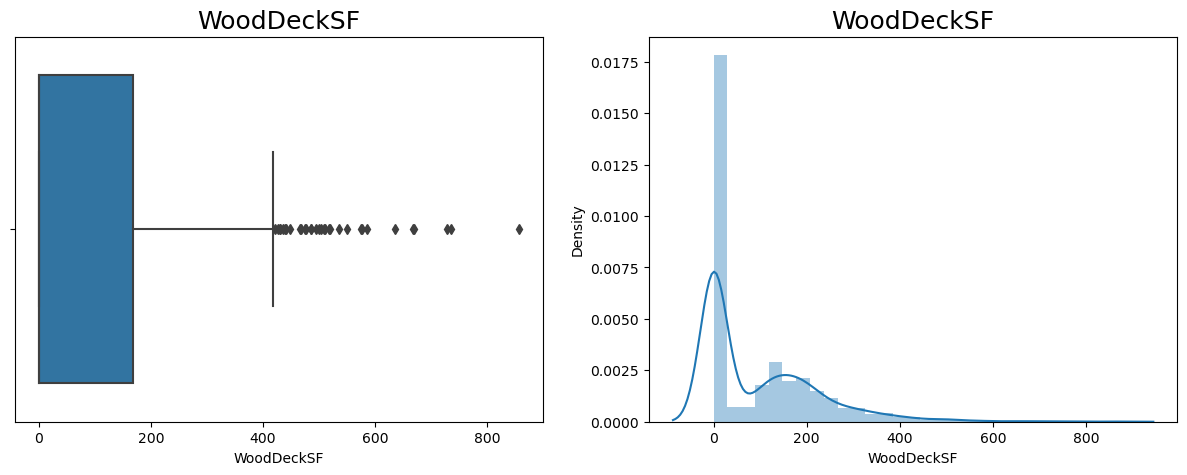

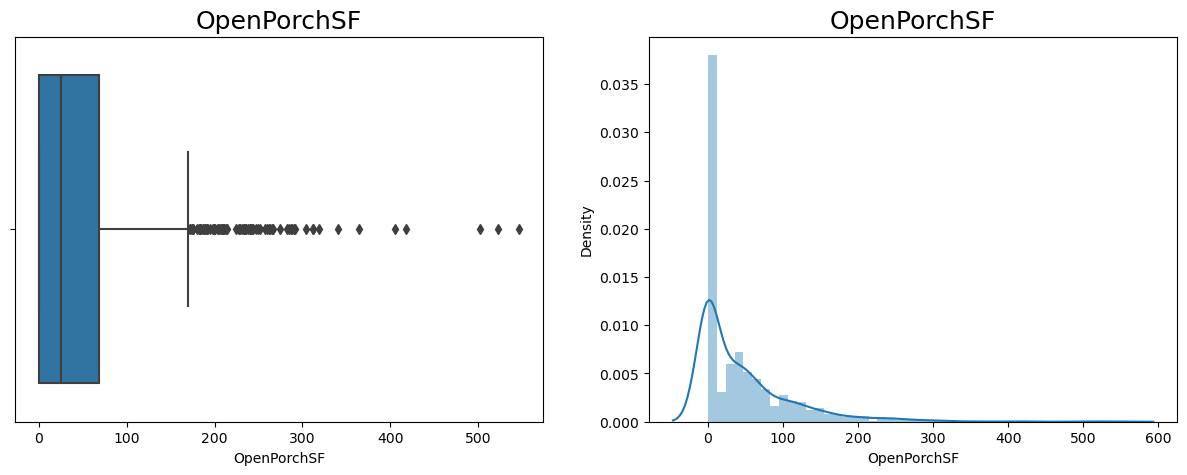

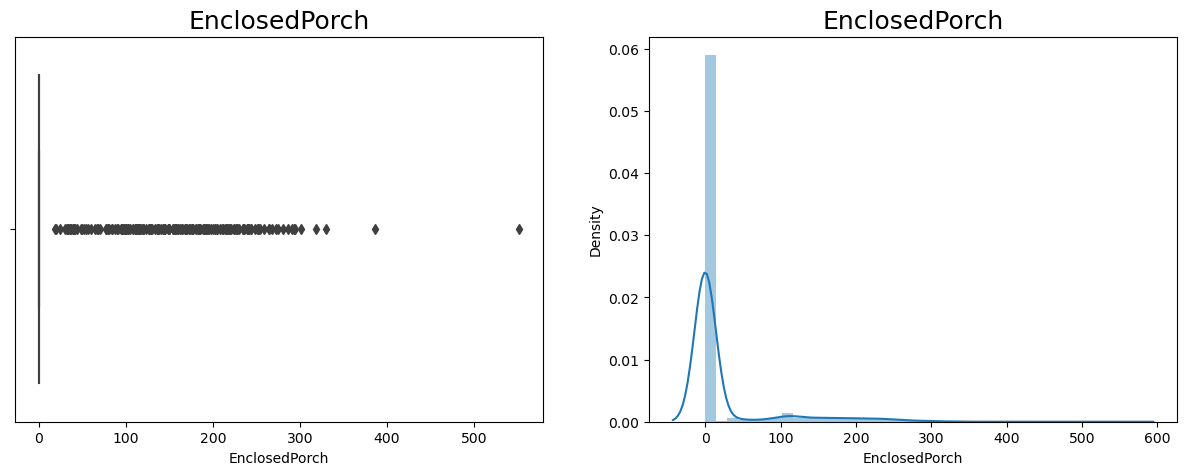

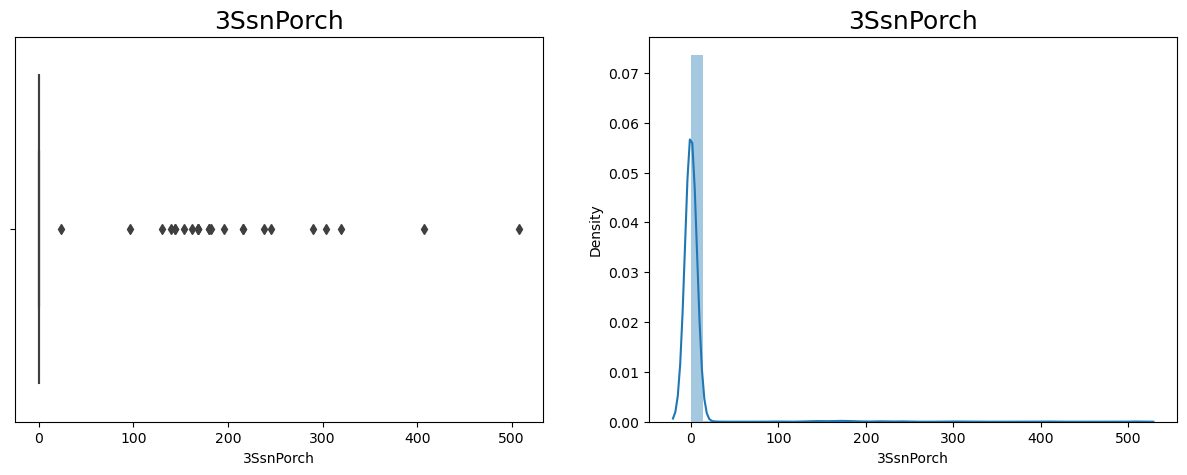

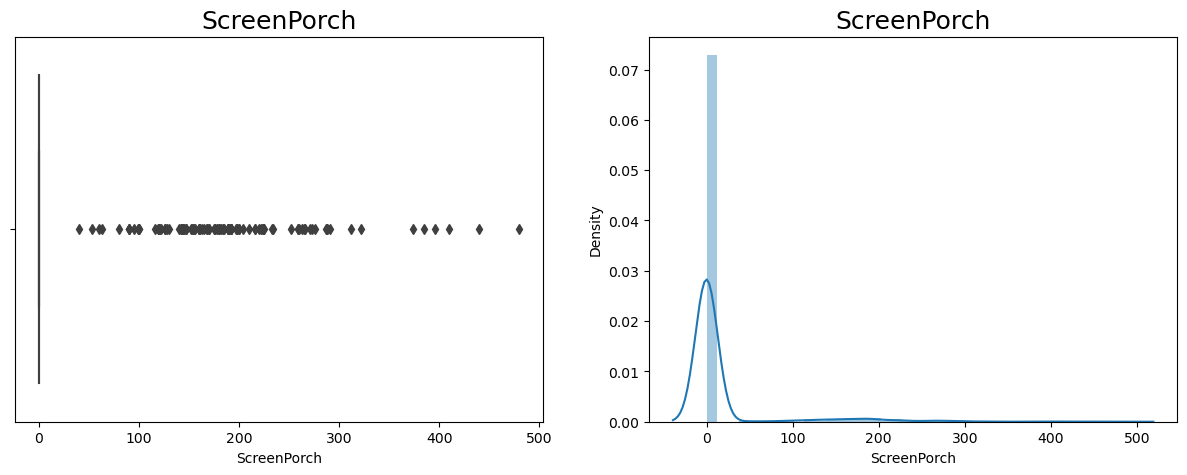

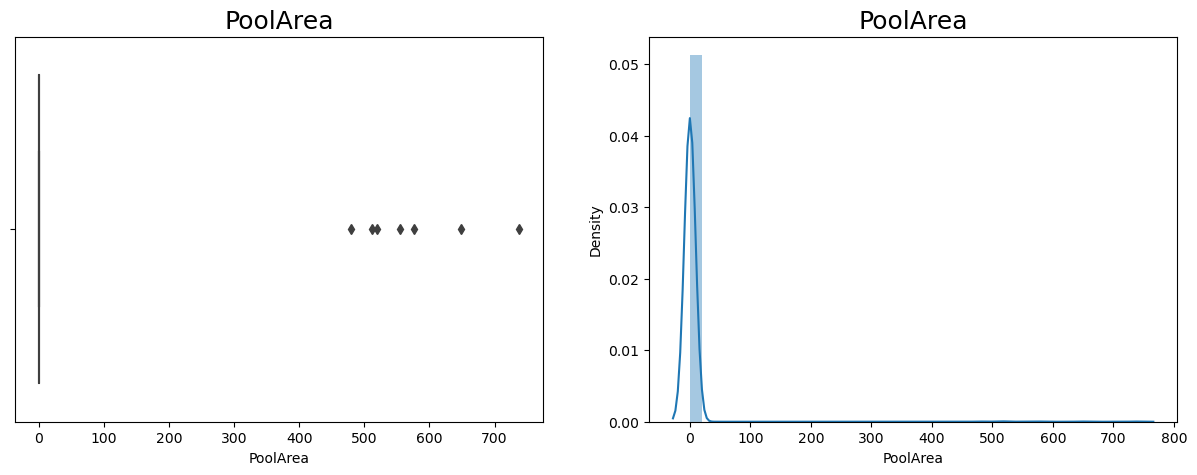

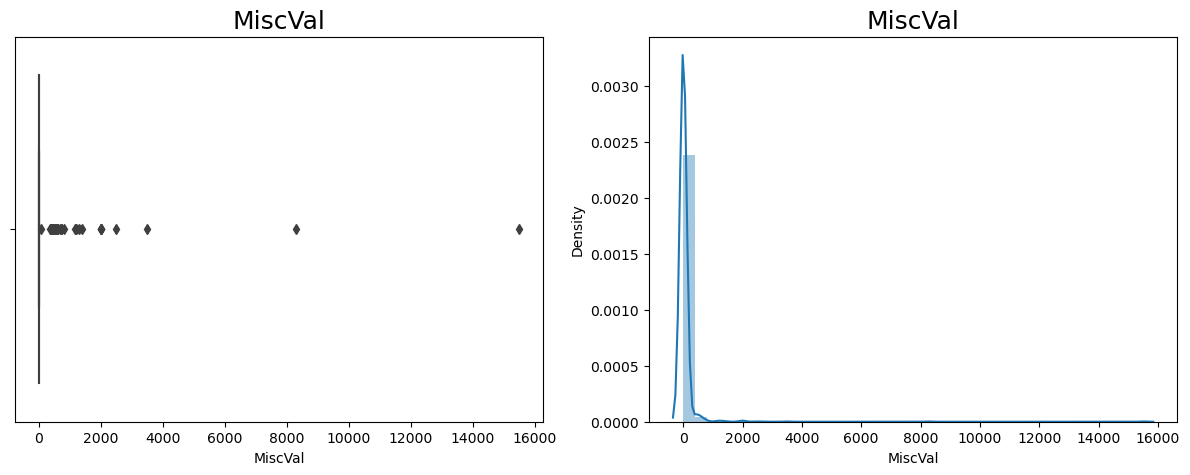

<Figure size 1500x500 with 0 Axes>

In [30]:
# Plot Histograms and Box Plots for Nuerical Calumns
for col in df_numeric.columns:
    plt.figure(figsize=(15,5))
    if col != "Id":
        if col != "SalePrice":
            plt.subplot(1,2,1)
            plt.title(col, fontdict={'fontsize': 18})
            sns.boxplot(Housing_df[col])
            # Distplot clubbed with the Kernel Density Estimate Plot : To estimate the probability of distribution of continuous variables across various data values.
            plt.subplot(1,2,2)
            sns.distplot(Housing_df[col],kde=True)
            plt.title(col, fontdict={'fontsize': 18})
            plt.show() 

#### Observation : 
- Most of the Numerical Columns have Outliers.
- Distribution Plots indicates that Numerical Columns are not normally distributed.

###### Let's Treat the Outliers

Text(0.5, 1.0, 'Before Handling Outliers')

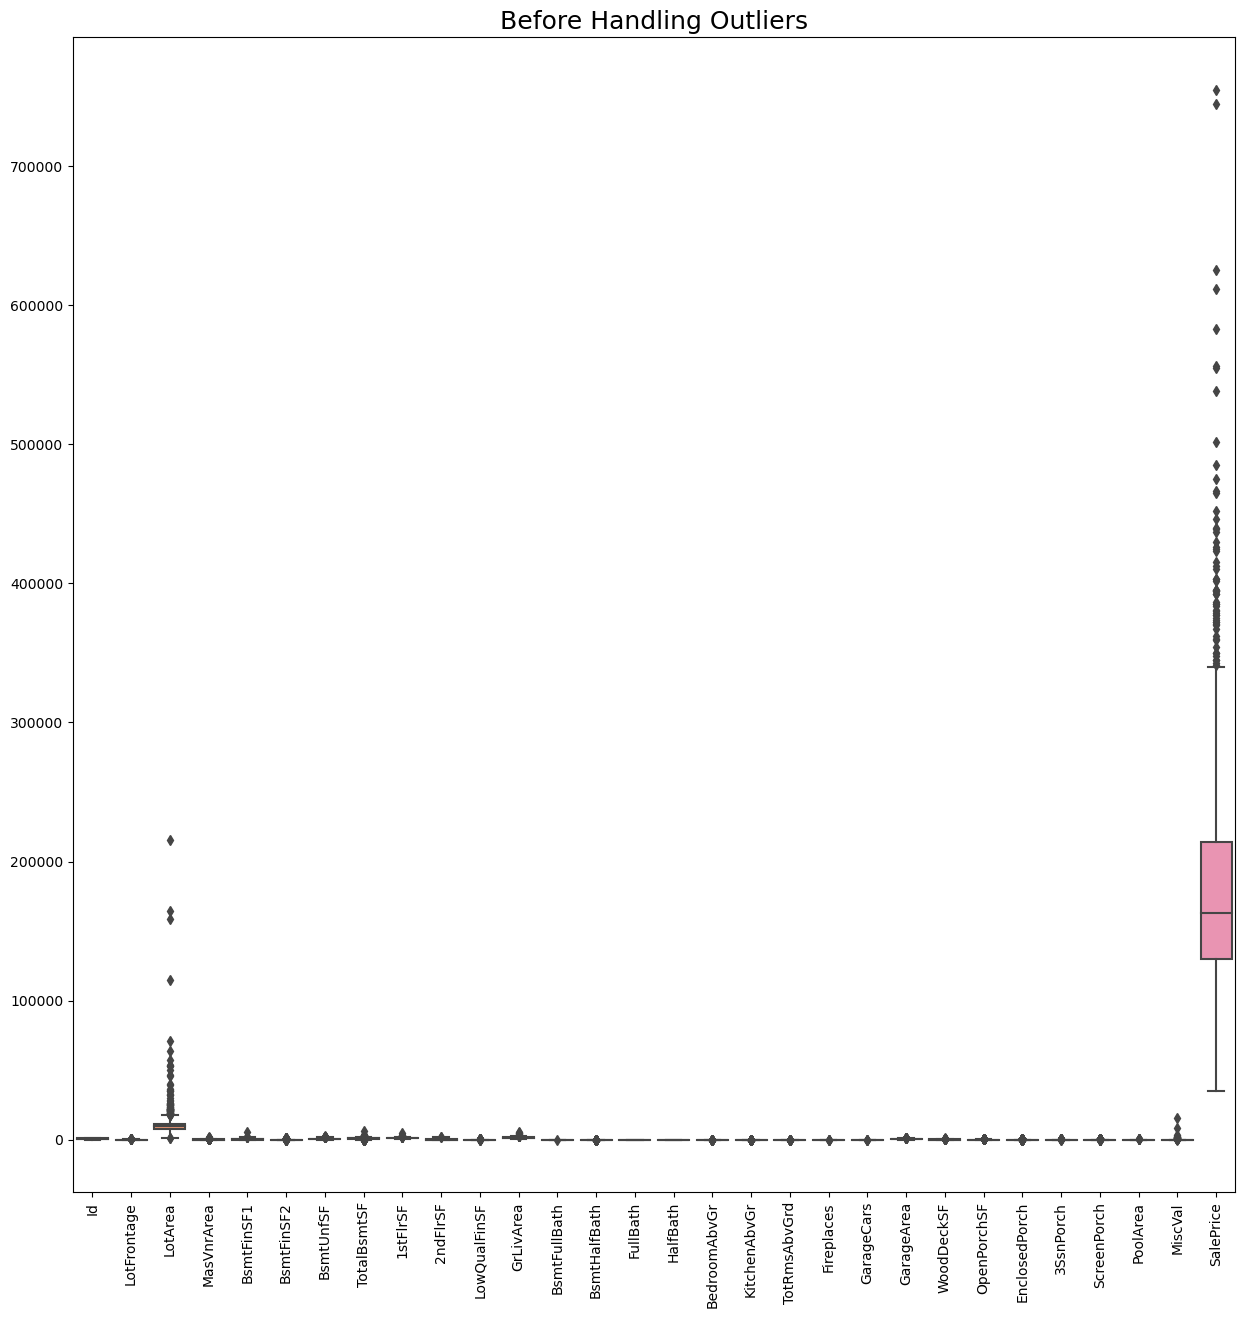

In [31]:
# Since there are too many Numerical Columns, lets plot the Boz Plot showing the outliers before the treatment
# We will use the same, to verify after we treat the Outliers
## Check all numeric variables in one Plot.
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=df_numeric);
plt.title("Before Handling Outliers", fontdict={'fontsize': 18})

##### Handling the Outliers

In [32]:
# Use For Loop to pick-up each of the numerical columns and handle the outliers
for col in df_numeric.columns:
    # We will exclude the Target Variable and ID
    if col != 'SalePrice':
        if col != 'Id':
            # We will us IQR method of identifying outliers to set up a “fence” outside of Q1 and Q3.
            Q1 = df_numeric[col].quantile(.25)
            Q3 = df_numeric[col].quantile(.75)
            IQR = Q3 - Q1
            upper = Q3+1.5*IQR
            lower = Q1-1.5*IQR
            df_numeric[col][df_numeric[col] <= lower] = lower
            df_numeric[col][df_numeric[col] >= upper] = upper
    

Text(0.5, 1.0, 'After Handling Outliers')

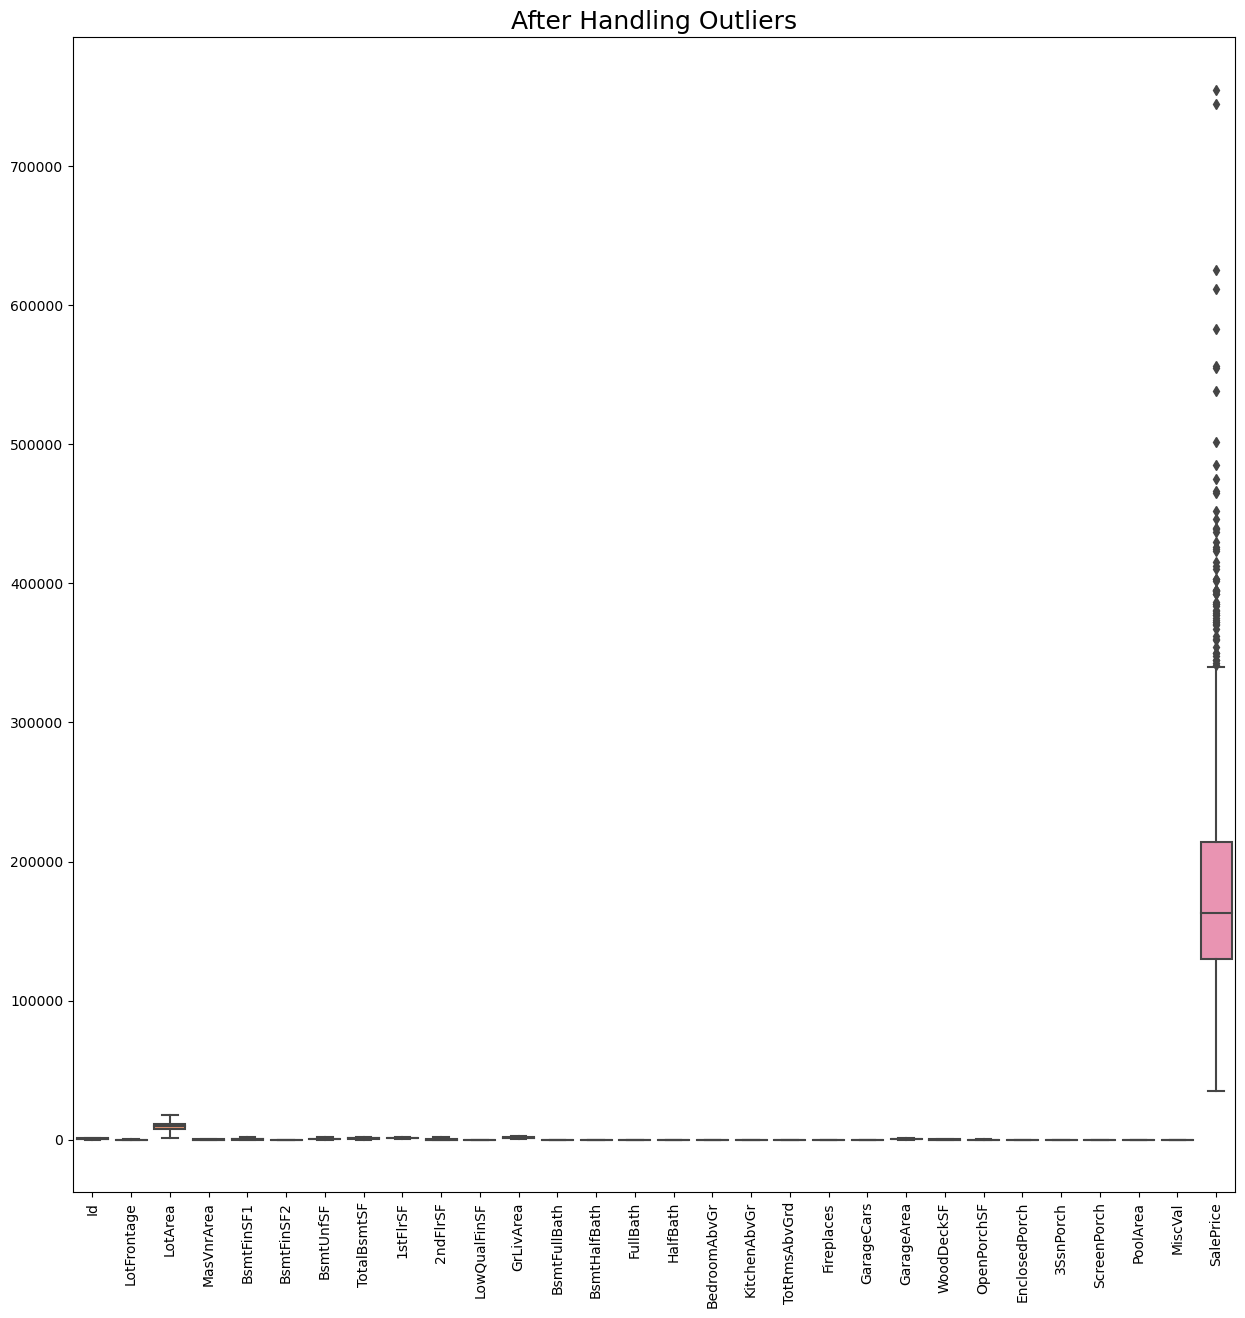

In [33]:
# Since there are too many Numerical Columns, lets plot the Boz Plot showing the outliers before the treatment
# We will use the same, to verify after we treat the Outliers
## Check all numeric variables in one Plot.
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=df_numeric);
plt.title("After Handling Outliers", fontdict={'fontsize': 18})

#### Observation : 
- All the Outlier for the Numerical varaibles have been address.
- SalePrice being an exception, as it is out Target Variable.

In [34]:
# Lets look at statistical description of the numerical data after handling Outliers
df_numeric.describe()

Id  LotFrontage       LotArea   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean    730.500000    57.187671   9647.388014    89.406336   439.997517   
std     421.610009    32.938522   3594.356399   134.017553   433.219435   
min       1.000000     0.000000   1481.500000     0.000000     0.000000   
25%     365.750000    42.000000   7553.500000     0.000000     0.000000   
50%     730.500000    63.000000   9478.500000     0.000000   383.500000   
75%    1095.250000    79.000000  11601.500000   164.250000   712.250000   
max    1460.000000   134.500000  17673.500000   410.625000  1780.625000   

       BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count      1460.0  1460.000000  1460.000000  1460.000000  1460.000000   
mean          0.0   563.777740  1050.254795  1157.018151   346.789041   
std           0.0   431.710214   397.937878   362.583002   435.791621   
min           0.0     0.000000    42.000000   334.000000     0.000000   
25%           0.0   223.000000   795.750000   882.000000     0.000000   
50%           0.0   477.500000   991.500000  1087.000000     0.000000   
75%           0.0   808.000000  1298.250000  1391.250000   728.000000   
max           0.0  1685.500000  2052.000000  2155.125000  1820.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count        1460.0  1460.000000   1460.000000        1460.0  1460.000000   
mean            0.0  1503.735873      0.425000           0.0     1.565068   
std             0.0   481.375641      0.517373           0.0     0.550916   
min             0.0   334.000000      0.000000           0.0     0.000000   
25%             0.0  1129.500000      0.000000           0.0     1.000000   
50%             0.0  1464.000000      0.000000           0.0     2.000000   
75%             0.0  1776.750000      1.000000           0.0     2.000000   
max             0.0  2747.625000      2.500000           0.0     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000        1460.0   1460.000000  1460.000000   
mean      0.382877      2.851712           1.0      6.487671     0.611301   
std       0.502885      0.759516           0.0      1.541916     0.638959   
min       0.000000      0.500000           1.0      2.000000     0.000000   
25%       0.000000      2.000000           1.0      5.000000     0.000000   
50%       0.000000      3.000000           1.0      6.000000     1.000000   
75%       1.000000      3.000000           1.0      7.000000     1.000000   
max       2.000000      4.500000           1.0     10.000000     2.500000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1460.000000  1460.000000  1460.000000  1460.000000         1460.0   
mean      1.765411   470.670719    91.806849    42.603425            0.0   
std       0.742753   207.105729   116.658120    52.501584            0.0   
min       0.000000     0.000000     0.000000     0.000000            0.0   
25%       1.000000   334.500000     0.000000     0.000000            0.0   
50%       2.000000   480.000000     0.000000    25.000000            0.0   
75%       2.000000   576.000000   168.000000    68.000000            0.0   
max       3.500000   938.250000   420.000000   170.000000            0.0   

       3SsnPorch  ScreenPorch  PoolArea  MiscVal      SalePrice  
count     1460.0       1460.0    1460.0   1460.0    1460.000000  
mean         0.0          0.0       0.0      0.0  180921.195890  
std          0.0          0.0       0.0      0.0   79442.502883  
min          0.0          0.0       0.0      0.0   34900.000000  
25%          0.0          0.0       0.0      0.0  129975.000000  
50%          0.0          0.0       0.0      0.0  163000.000000  
75%          0.0          0.0       0.0      0.0  214000.000000  
max          0.0          0.0       0.0      0.0  755000.000000

#### Observation :
- Followng Variables seems to have only single or lesser values, which will of not much use for predictions
    - BsmtFinSF2, LowQualFinSF, BsmtHalfBath, KitchenAbvGr, EnclosedPorch, 3SnPorch, ScreenPorch, PoolArea
- Following Variables have discrete values 
    - 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'OpenPorchSF'

#### Analyze Target Variable

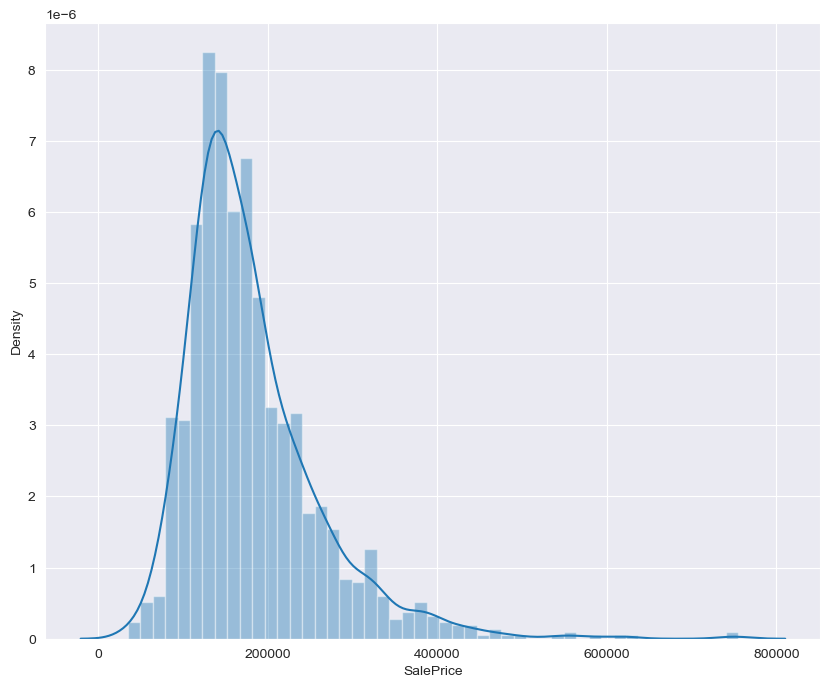

In [35]:
# Based on the problem statement, SalePrice is our Target Variable. 
# Lets Check the SalePrice
plt.figure(figsize=[10,8])
sns.set_style('darkgrid')
sns.distplot(df_numeric['SalePrice']);

#### Observation : 
- SalePrice Data is Right skewed, lets check the skew value of it and Fix it.

In [36]:
## Check the skewness of target variable
df_numeric['SalePrice'].skew()

1.8828757597682129

- Value of the Skew is greated than 1, i.e. it is highly skewed
- Rule of Thumb seems to be that Skew value should be between -0.5 and 0.5, for the data to be symmetrical

In [37]:
## Check the kurtosis of target variable
df_numeric['SalePrice'].kurt()   # Kurtosis is used to find the presence of outliers in our data. It gives us the total degree of outliers present. 

6.536281860064529

- Kurtosis value is Higher than 3, lets fix the skewness and get normal distribution of SalePrice data using Log transformation.

In [38]:
## Log transform the target variable to handle the skewness of the data observed.
df_numeric['SalePrice'] = np.log(df_numeric['SalePrice'])
## Check the skewness of target variable
print("Skew Value :",df_numeric['SalePrice'].skew())
## Check the kurtosis of target variable
print("Kurosis Value :", df_numeric['SalePrice'].kurt())

Skew Value : 0.12133506220520406
Kurosis Value : 0.8095319958036296


- The Skew value and Kurtosis values seem to be in acceptable range. Lets check plot the data and check.

Text(0.5, 1.0, 'Target Variable After Fixing Skewness')

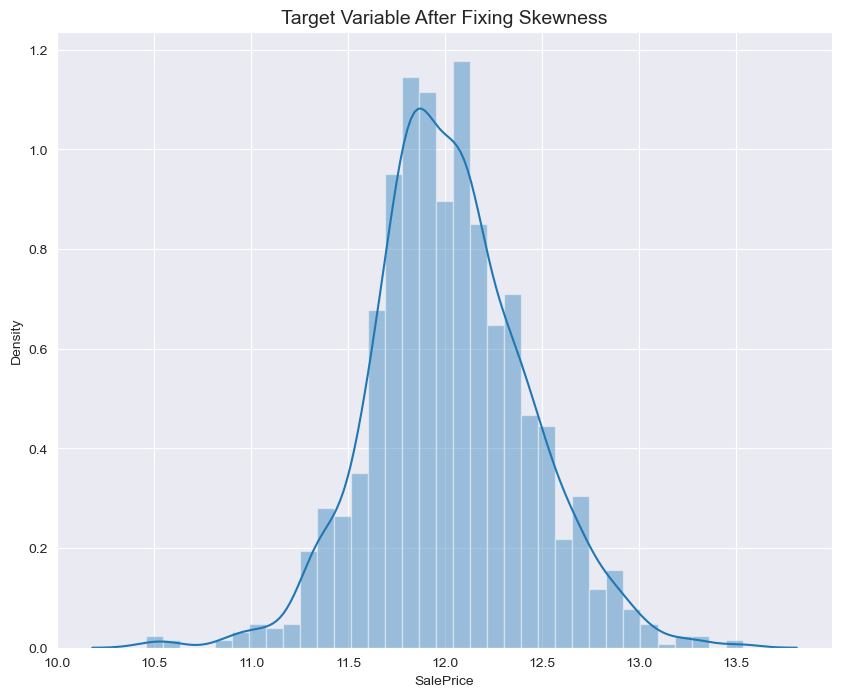

In [39]:
plt.figure(figsize=[10,8])
sns.set_style('darkgrid')
sns.distplot(df_numeric['SalePrice']);
plt.title("Target Variable After Fixing Skewness", fontdict={'fontsize': 14})

#### Observation :
- After fixing the data skewness for Target variable ('SalePrice'), now we see a Normal distribution.

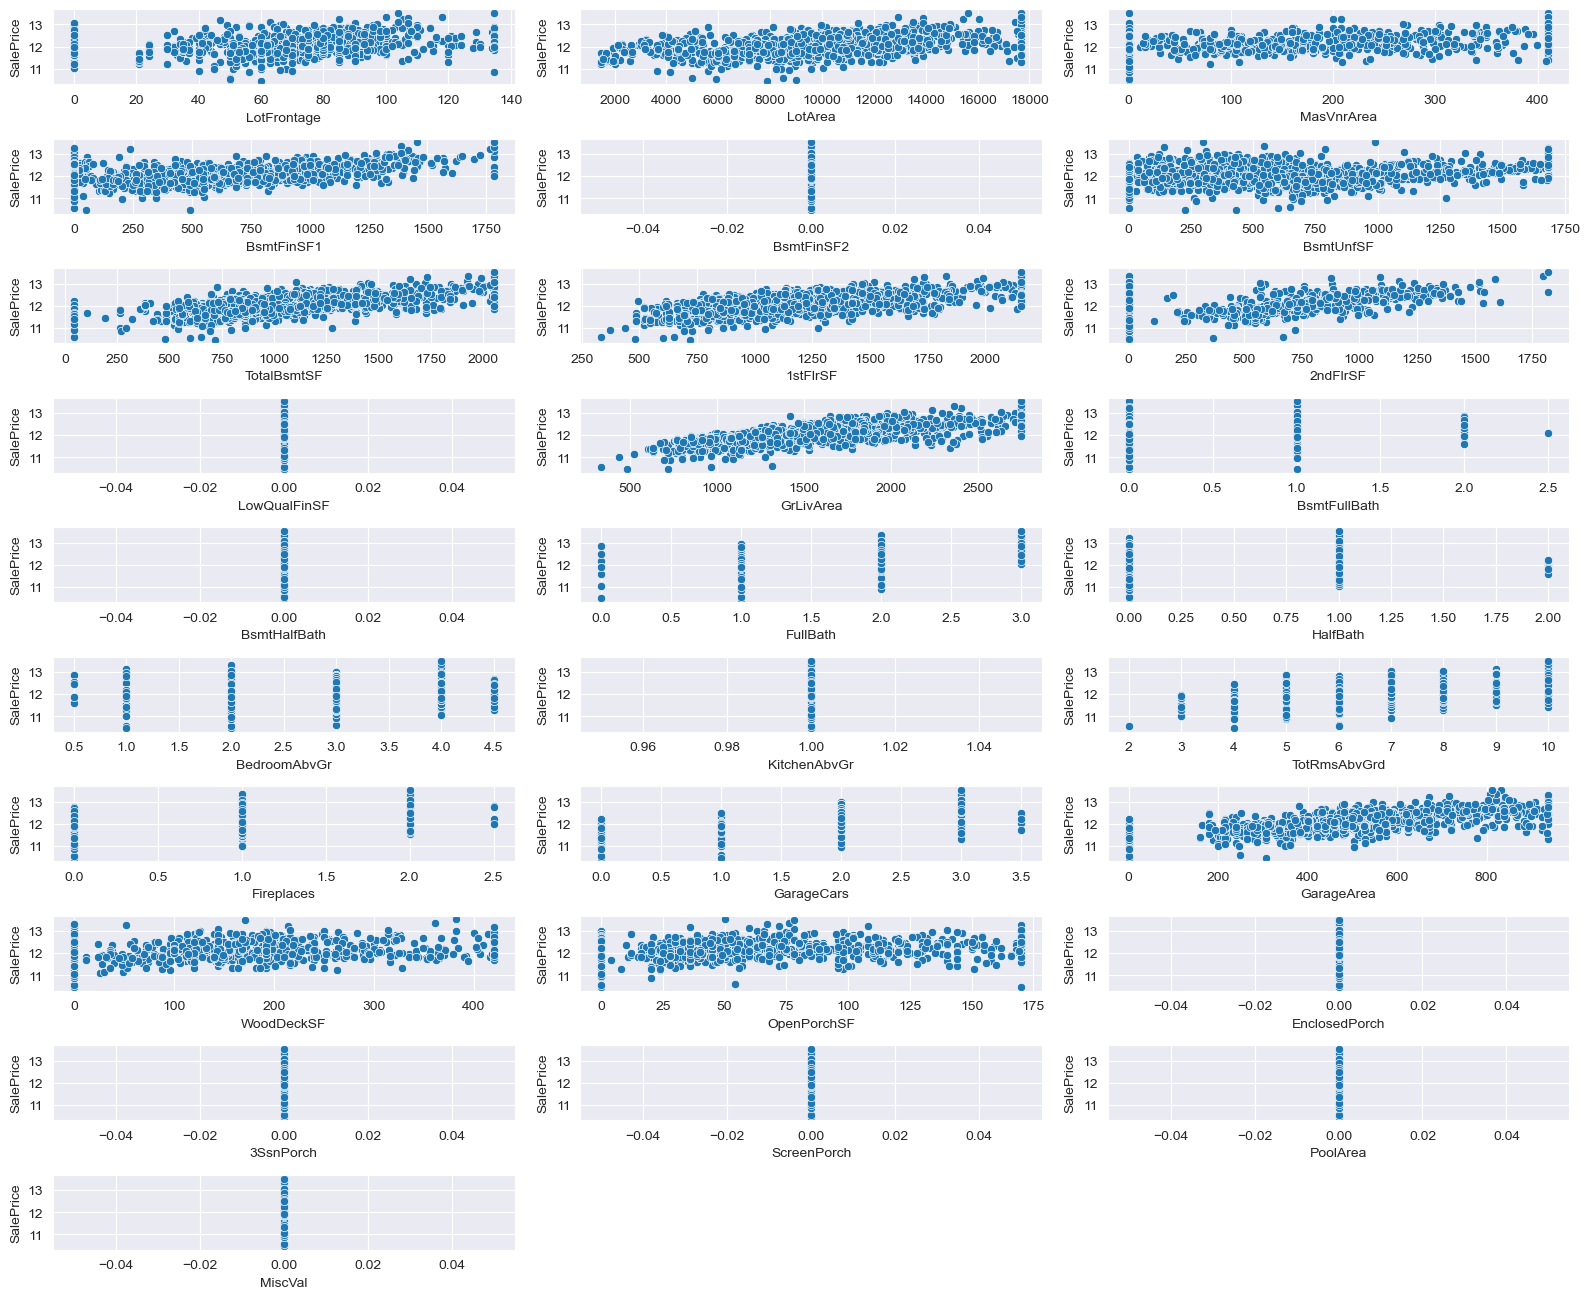

In [40]:
# Analysis of Numerical Variables with Target Variable
fig=plt.subplots(figsize=(16,14))
i=0
for col in df_numeric.columns:
    if col != 'Id':
        if col != 'SalePrice':
            i=i+1
            plt.subplot(11,3,i)
            plt.subplots_adjust(hspace=2.0)
            sns.scatterplot(df_numeric[col], df_numeric['SalePrice'])
            plt.tight_layout()

#### Observation : 
- Following variables are showing strong correlation with Target Variable 'SalePrice'
    - 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF'
- Following variables are showing discrete values
    - 'BsmtFullBath',  'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',  'MoSold'
- Following variables can be dropped as these have one single value
    - 'LowQualFinSF', 'BsmtFinSF2', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'

###### Analysing Discrete Numerical Variables

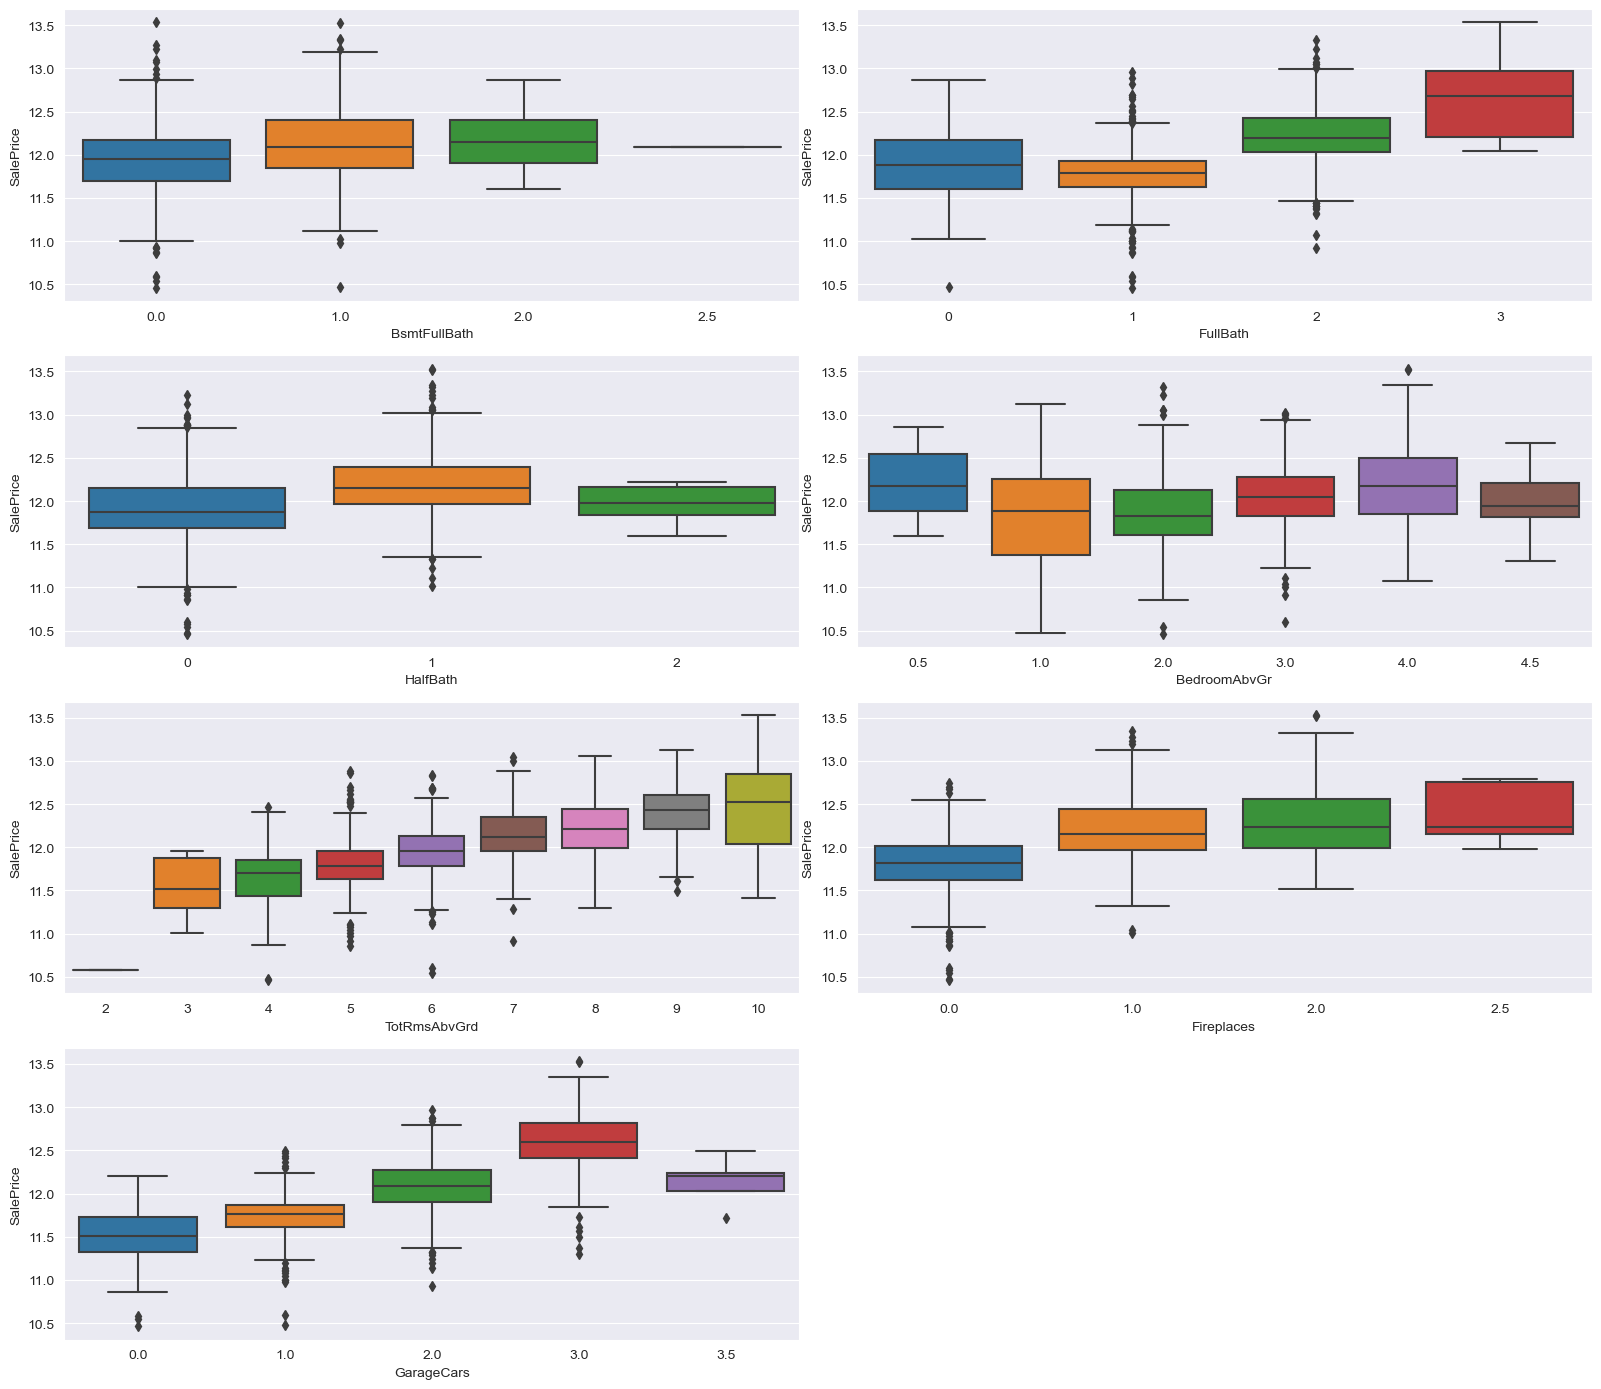

In [41]:
# Analysis of Numerical Variables having discreet correlation with Target Variable
fig=plt.subplots(figsize=(16,14))


plt.subplot(4,2,1)
plt.subplots_adjust(hspace=2.0)
sns.boxplot(df_numeric['BsmtFullBath'], df_numeric['SalePrice'])
plt.tight_layout()
plt.subplot(4,2,2)
plt.subplots_adjust(hspace=2.0)
sns.boxplot(df_numeric['FullBath'], df_numeric['SalePrice'])
plt.tight_layout()
plt.subplot(4,2,3)
plt.subplots_adjust(hspace=2.0)
sns.boxplot(df_numeric['HalfBath'], df_numeric['SalePrice'])
plt.tight_layout()
plt.subplot(4,2,4)
plt.subplots_adjust(hspace=2.0)
sns.boxplot(df_numeric['BedroomAbvGr'], df_numeric['SalePrice'])
plt.tight_layout()
plt.subplot(4,2,5)
plt.subplots_adjust(hspace=2.0)
sns.boxplot(df_numeric['TotRmsAbvGrd'], df_numeric['SalePrice'])
plt.tight_layout()
plt.subplot(4,2,6)
plt.subplots_adjust(hspace=2.0)
sns.boxplot(df_numeric['Fireplaces'], df_numeric['SalePrice'])
plt.tight_layout()
plt.subplot(4,2,7)
plt.subplots_adjust(hspace=2.0)
sns.boxplot(df_numeric['GarageCars'], df_numeric['SalePrice'])
plt.tight_layout()


#### Observation
- BsmtFullBath: Basement full bathrooms
    - SalePrice is higher for Value of 2.
- FullBath: Full bathrooms above grade
    - SalePrice is highest of Houses with 3 Full Bathrooms
- HalfBath: Half baths above grade
    - SalePrice is higher for Houses with 1 Hald Bathroom
- BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms)
    - SalePrice is higher for Houses with 0.5 and 5 Bedrooms
- Fireplaces: Number of fireplaces
    - SalePrice is higher for House with 2.5 Fireplaces.
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
    - SalePrice increase steadily for values from 3 to 10.
- GarageCars: Size of garage in car capacity
    - SalePrice is highest for Houses with capacity for 3, followed by 2 and 1.
    - SalePrice is low for Houses without capacity for cars or Garage.

###### Let's check the same for the Variables identified to have single value

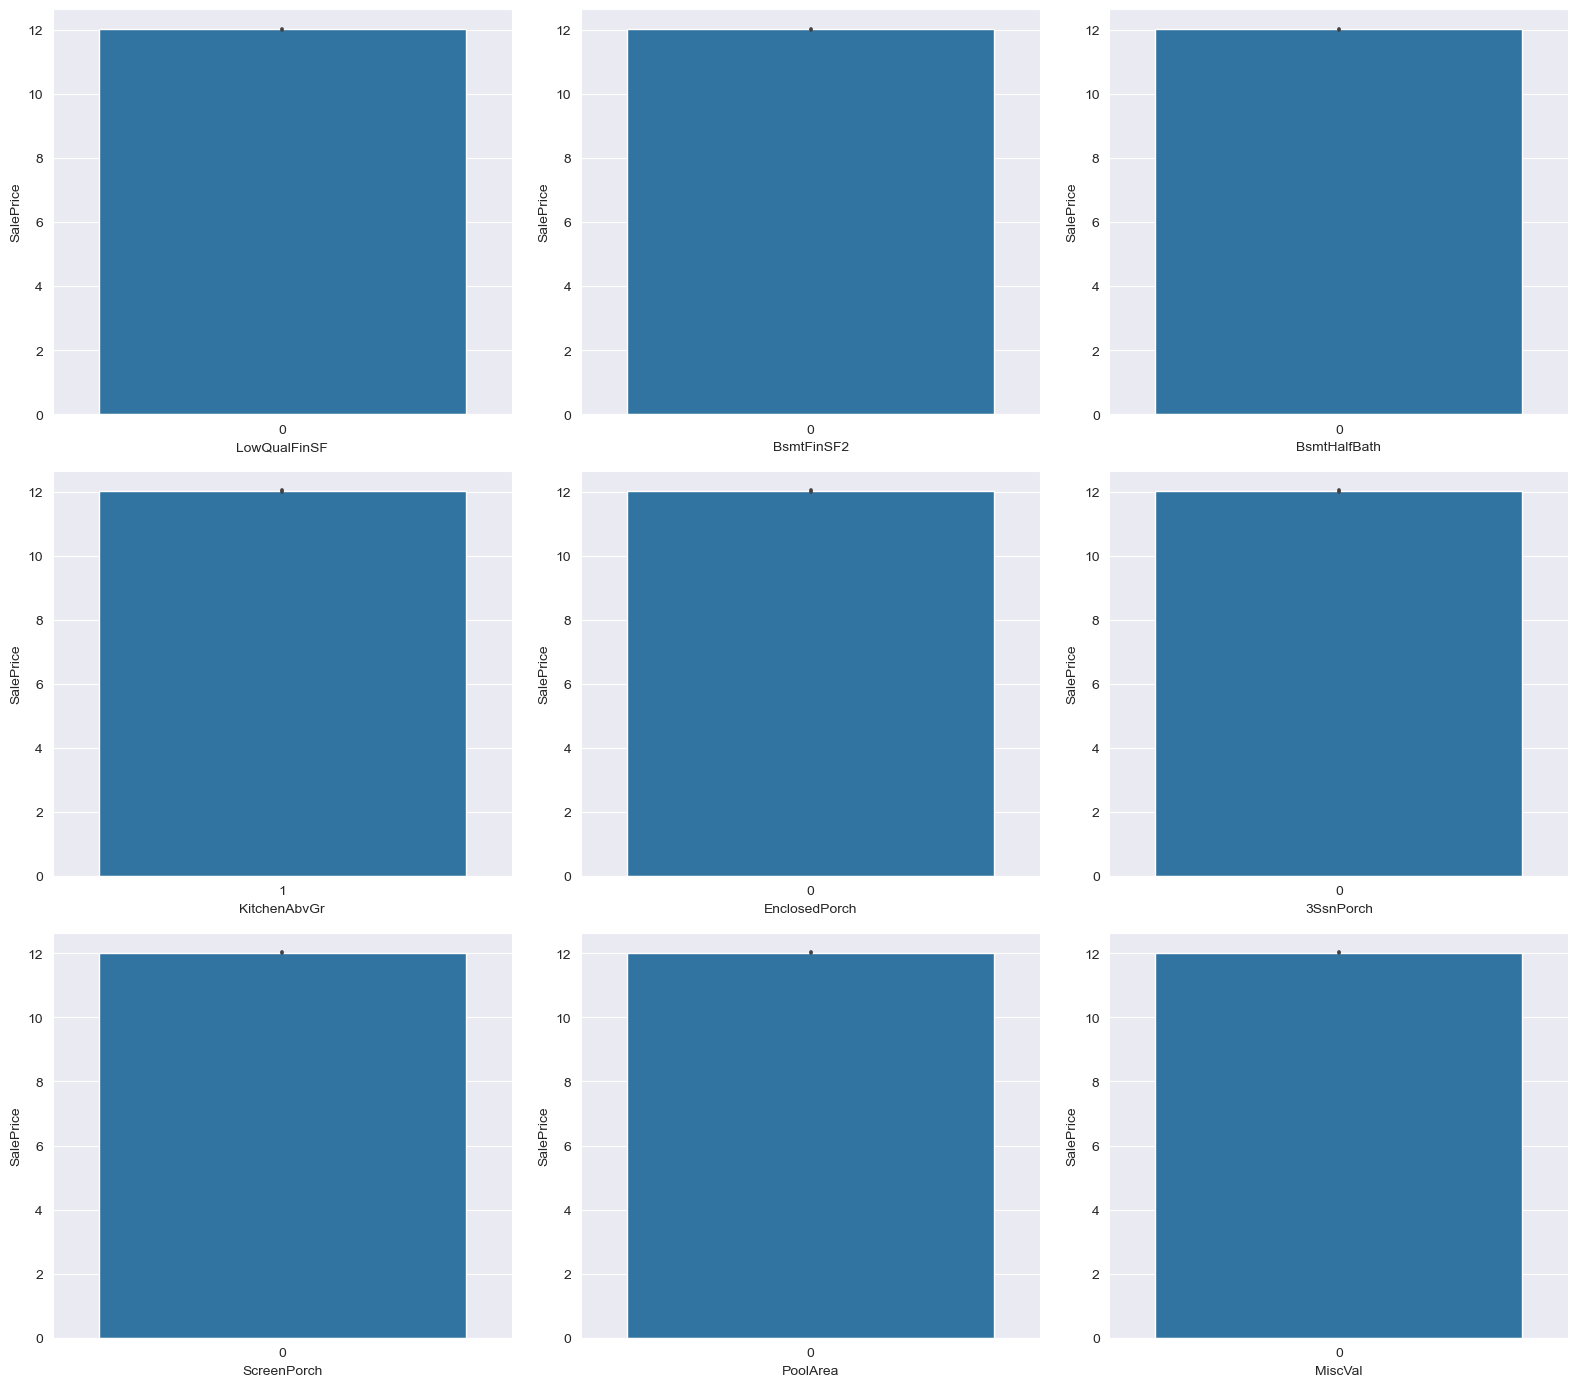

In [42]:
# Analysis of Single Valued Numerical Variables with Target Variable
# 'LowQualFinSF', 'BsmtFinSF2', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'
fig=plt.subplots(figsize=(16,14))


plt.subplot(3,3,1)
plt.subplots_adjust(hspace=2.0)
sns.barplot(df_numeric['LowQualFinSF'], df_numeric['SalePrice'])
plt.tight_layout()
plt.subplot(3,3,2)
plt.subplots_adjust(hspace=2.0)
sns.barplot(df_numeric['BsmtFinSF2'], df_numeric['SalePrice'])
plt.tight_layout()
plt.subplot(3,3,3)
plt.subplots_adjust(hspace=2.0)
sns.barplot(df_numeric['BsmtHalfBath'], df_numeric['SalePrice'])
plt.tight_layout()
plt.subplot(3,3,4)
plt.subplots_adjust(hspace=2.0)
sns.barplot(df_numeric['KitchenAbvGr'], df_numeric['SalePrice'])
plt.tight_layout()
plt.subplot(3,3,5)
plt.subplots_adjust(hspace=2.0)
sns.barplot(df_numeric['EnclosedPorch'], df_numeric['SalePrice'])
plt.tight_layout()
plt.subplot(3,3,6)
plt.subplots_adjust(hspace=2.0)
sns.barplot(df_numeric['3SsnPorch'], df_numeric['SalePrice'])
plt.tight_layout()
plt.subplot(3,3,7)
plt.subplots_adjust(hspace=2.0)
sns.barplot(df_numeric['ScreenPorch'], df_numeric['SalePrice'])
plt.tight_layout()
plt.subplot(3,3,8)
plt.subplots_adjust(hspace=2.0)
sns.barplot(df_numeric['PoolArea'], df_numeric['SalePrice'])
plt.tight_layout()
plt.subplot(3,3,9)
plt.subplots_adjust(hspace=2.0)
sns.barplot(df_numeric['MiscVal'], df_numeric['SalePrice'])
plt.tight_layout()

In [43]:
# Re-Check the unique value count.
print("LowQualFinSF : ", '\n', df_numeric['LowQualFinSF'].value_counts())
print("BsmtFinSF2 ", '\n', df_numeric['BsmtFinSF2'].value_counts())
print("BsmtHalfBath", '\n', df_numeric['BsmtHalfBath'].value_counts())
print("KitchenAbvGr", '\n', df_numeric['KitchenAbvGr'].value_counts())
print("EnclosedPorch", '\n', df_numeric['EnclosedPorch'].value_counts())
print("3SsnPorch", '\n', df_numeric['3SsnPorch'].value_counts())
print("ScreenPorch", '\n', df_numeric['ScreenPorch'].value_counts())
print("PoolArea", '\n', df_numeric['PoolArea'].value_counts())
print("MiscVal", '\n', df_numeric['MiscVal'].value_counts())

LowQualFinSF :  
 0    1460
Name: LowQualFinSF, dtype: int64
BsmtFinSF2  
 0    1460
Name: BsmtFinSF2, dtype: int64
BsmtHalfBath 
 0    1460
Name: BsmtHalfBath, dtype: int64
KitchenAbvGr 
 1    1460
Name: KitchenAbvGr, dtype: int64
EnclosedPorch 
 0    1460
Name: EnclosedPorch, dtype: int64
3SsnPorch 
 0    1460
Name: 3SsnPorch, dtype: int64
ScreenPorch 
 0    1460
Name: ScreenPorch, dtype: int64
PoolArea 
 0    1460
Name: PoolArea, dtype: int64
MiscVal 
 0    1460
Name: MiscVal, dtype: int64


- Above Plot re-confirm out understanding of the variables with single value.
- We can drop these columns.

In [44]:
# Droppring columns
df_numeric = df_numeric.drop(['LowQualFinSF', 'BsmtFinSF2', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'],axis=1)

In [45]:
df_numeric.columns

Index(['Id', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

#### Catgorical Columns - Data Analysis and Handling

In [46]:
df_catg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 50 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   MSSubClass        1460 non-null   object  
 1   MSZoning          1460 non-null   object  
 2   Street            1460 non-null   object  
 3   Alley             1460 non-null   object  
 4   LotShape          1460 non-null   object  
 5   LandContour       1460 non-null   object  
 6   Utilities         1460 non-null   object  
 7   LotConfig         1460 non-null   object  
 8   LandSlope         1460 non-null   object  
 9   Neighborhood      1460 non-null   object  
 10  Condition1        1460 non-null   object  
 11  Condition2        1460 non-null   object  
 12  BldgType          1460 non-null   object  
 13  HouseStyle        1460 non-null   object  
 14  OverallQual       1460 non-null   object  
 15  OverallCond       1460 non-null   object  
 16  RoofStyle         1460 n

In [47]:
# Convert the data type to Category
for col in df_catg.columns:
    df_catg[col]=df_catg[col].astype('category')

df_catg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 50 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   MSSubClass        1460 non-null   category
 1   MSZoning          1460 non-null   category
 2   Street            1460 non-null   category
 3   Alley             1460 non-null   category
 4   LotShape          1460 non-null   category
 5   LandContour       1460 non-null   category
 6   Utilities         1460 non-null   category
 7   LotConfig         1460 non-null   category
 8   LandSlope         1460 non-null   category
 9   Neighborhood      1460 non-null   category
 10  Condition1        1460 non-null   category
 11  Condition2        1460 non-null   category
 12  BldgType          1460 non-null   category
 13  HouseStyle        1460 non-null   category
 14  OverallQual       1460 non-null   category
 15  OverallCond       1460 non-null   category
 16  RoofStyle         1460 n

In [48]:
# Check for Unique Values and Count of Rows for each
for col in df_catg.columns:
    print(col, " : ", df_catg[col].unique())
    print("Count : ", '\n', df_catg[col].value_counts(), '\n')

MSSubClass  :  [60, 20, 70, 50, 190, ..., 80, 160, 75, 180, 40]
Length: 15
Categories (15, int64): [20, 30, 40, 45, ..., 120, 160, 180, 190]
Count :  
 20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64 

MSZoning  :  ['RL', 'RM', 'C (all)', 'FV', 'RH']
Categories (5, object): ['C (all)', 'FV', 'RH', 'RL', 'RM']
Count :  
 RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64 

Street  :  ['Pave', 'Grvl']
Categories (2, object): ['Grvl', 'Pave']
Count :  
 Pave    1454
Grvl       6
Name: Street, dtype: int64 

Alley  :  ['No_Alley_Access', 'Grvl', 'Pave']
Categories (3, object): ['Grvl', 'No_Alley_Access', 'Pave']
Count :  
 No_Alley_Access    1369
Grvl                 50
Pave                 41
Name: Alley, dtype: int64 

LotShape  :  ['Reg', 'IR1', 'IR2', 'IR3']
Categories (4, object): [

Count :  
 No_Pool    1453
Gd            3
Ex            2
Fa            2
Name: PoolQC, dtype: int64 

Fence  :  ['No_Fence', 'MnPrv', 'GdWo', 'GdPrv', 'MnWw']
Categories (5, object): ['GdPrv', 'GdWo', 'MnPrv', 'MnWw', 'No_Fence']
Count :  
 No_Fence    1179
MnPrv        157
GdPrv         59
GdWo          54
MnWw          11
Name: Fence, dtype: int64 

MiscFeature  :  ['None', 'Shed', 'Gar2', 'Othr', 'TenC']
Categories (5, object): ['Gar2', 'None', 'Othr', 'Shed', 'TenC']
Count :  
 None    1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64 

MoSold  :  ['Feb', 'May', 'Sep', 'Dec', 'Oct', ..., 'Apr', 'Jan', 'July', 'Mar', 'June']
Length: 12
Categories (12, object): ['Apr', 'Aug', 'Dec', 'Feb', ..., 'May', 'Nov', 'Oct', 'Sep']
Count :  
 June    253
July    234
May     204
Apr     141
Aug     122
Mar     106
Oct      89
Nov      79
Sep      63
Dec      59
Jan      58
Feb      52
Name: MoSold, dtype: int64 

SaleType  :  ['WD', 'New', 'COD', 'ConLD'

In [49]:
# Categorical Data - Columns List
df_catg.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition',
       'House_age_catg', 'Remodel_age_catg', 'Garage_age_catg'],
      dtype='object')

In [50]:
# Draw a Bar Plot Categorical Columns
# Creating Groups of Categorical Columns for easier to view Plots
LotType = ["LotShape", "LandContour", "LotConfig", "LandSlope" ]
Loc_Access = ["MSZoning", "Street", "Alley", "Neighborhood", "Condition1", "Condition2", "PavedDrive" ]
HouseConst = ["MSSubClass","RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "ExterQual", "ExterCond", "Foundation"]
Basement = ["HouseStyle", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]
Garage = ["GarageType", "GarageFinish", "GarageQual", "GarageCond"]
Util_Interiors = ["Utilities", "Heating", "HeatingQC", "CentralAir", "Electrical", "KitchenQual" ]
Misc_Features = ["PoolQC", "Fence", "MiscFeature" ]
Sale = ["BldgType", "SaleType","SaleCondition", "MoSold" ]
Age = ["House_age_catg", "Remodel_age_catg", "Garage_age_catg"]
Condition_rating = ["OverallQual", "OverallCond"]



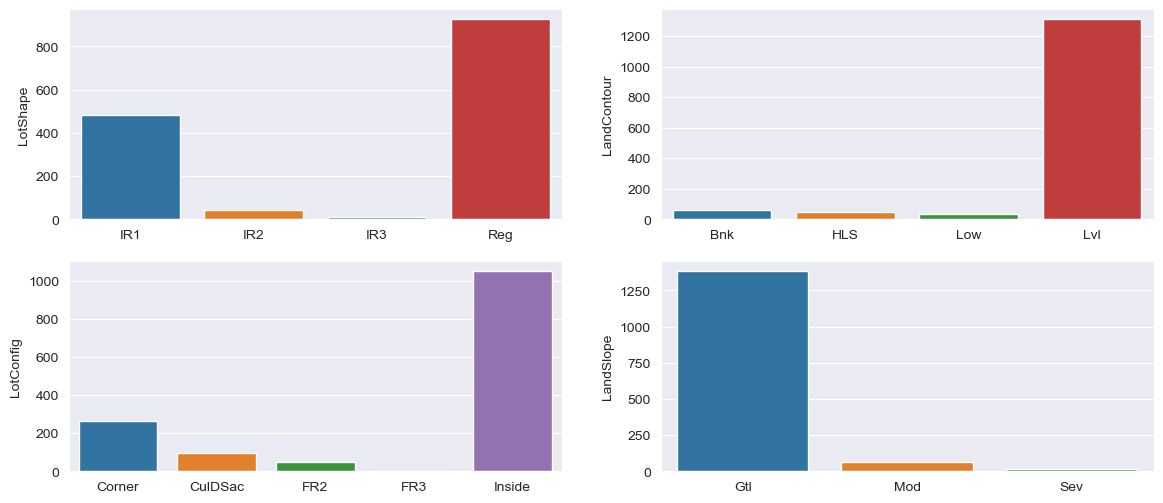

In [51]:
# Analysis of Categorical Variables -  LOT Shape Value Count 
plt.subplots(figsize=(14,6))
i=0
for col in LotType:
    i=i+1
    plt.subplot(2,2,i)
    sns.barplot(df_catg[col].value_counts().index, df_catg[col].value_counts())

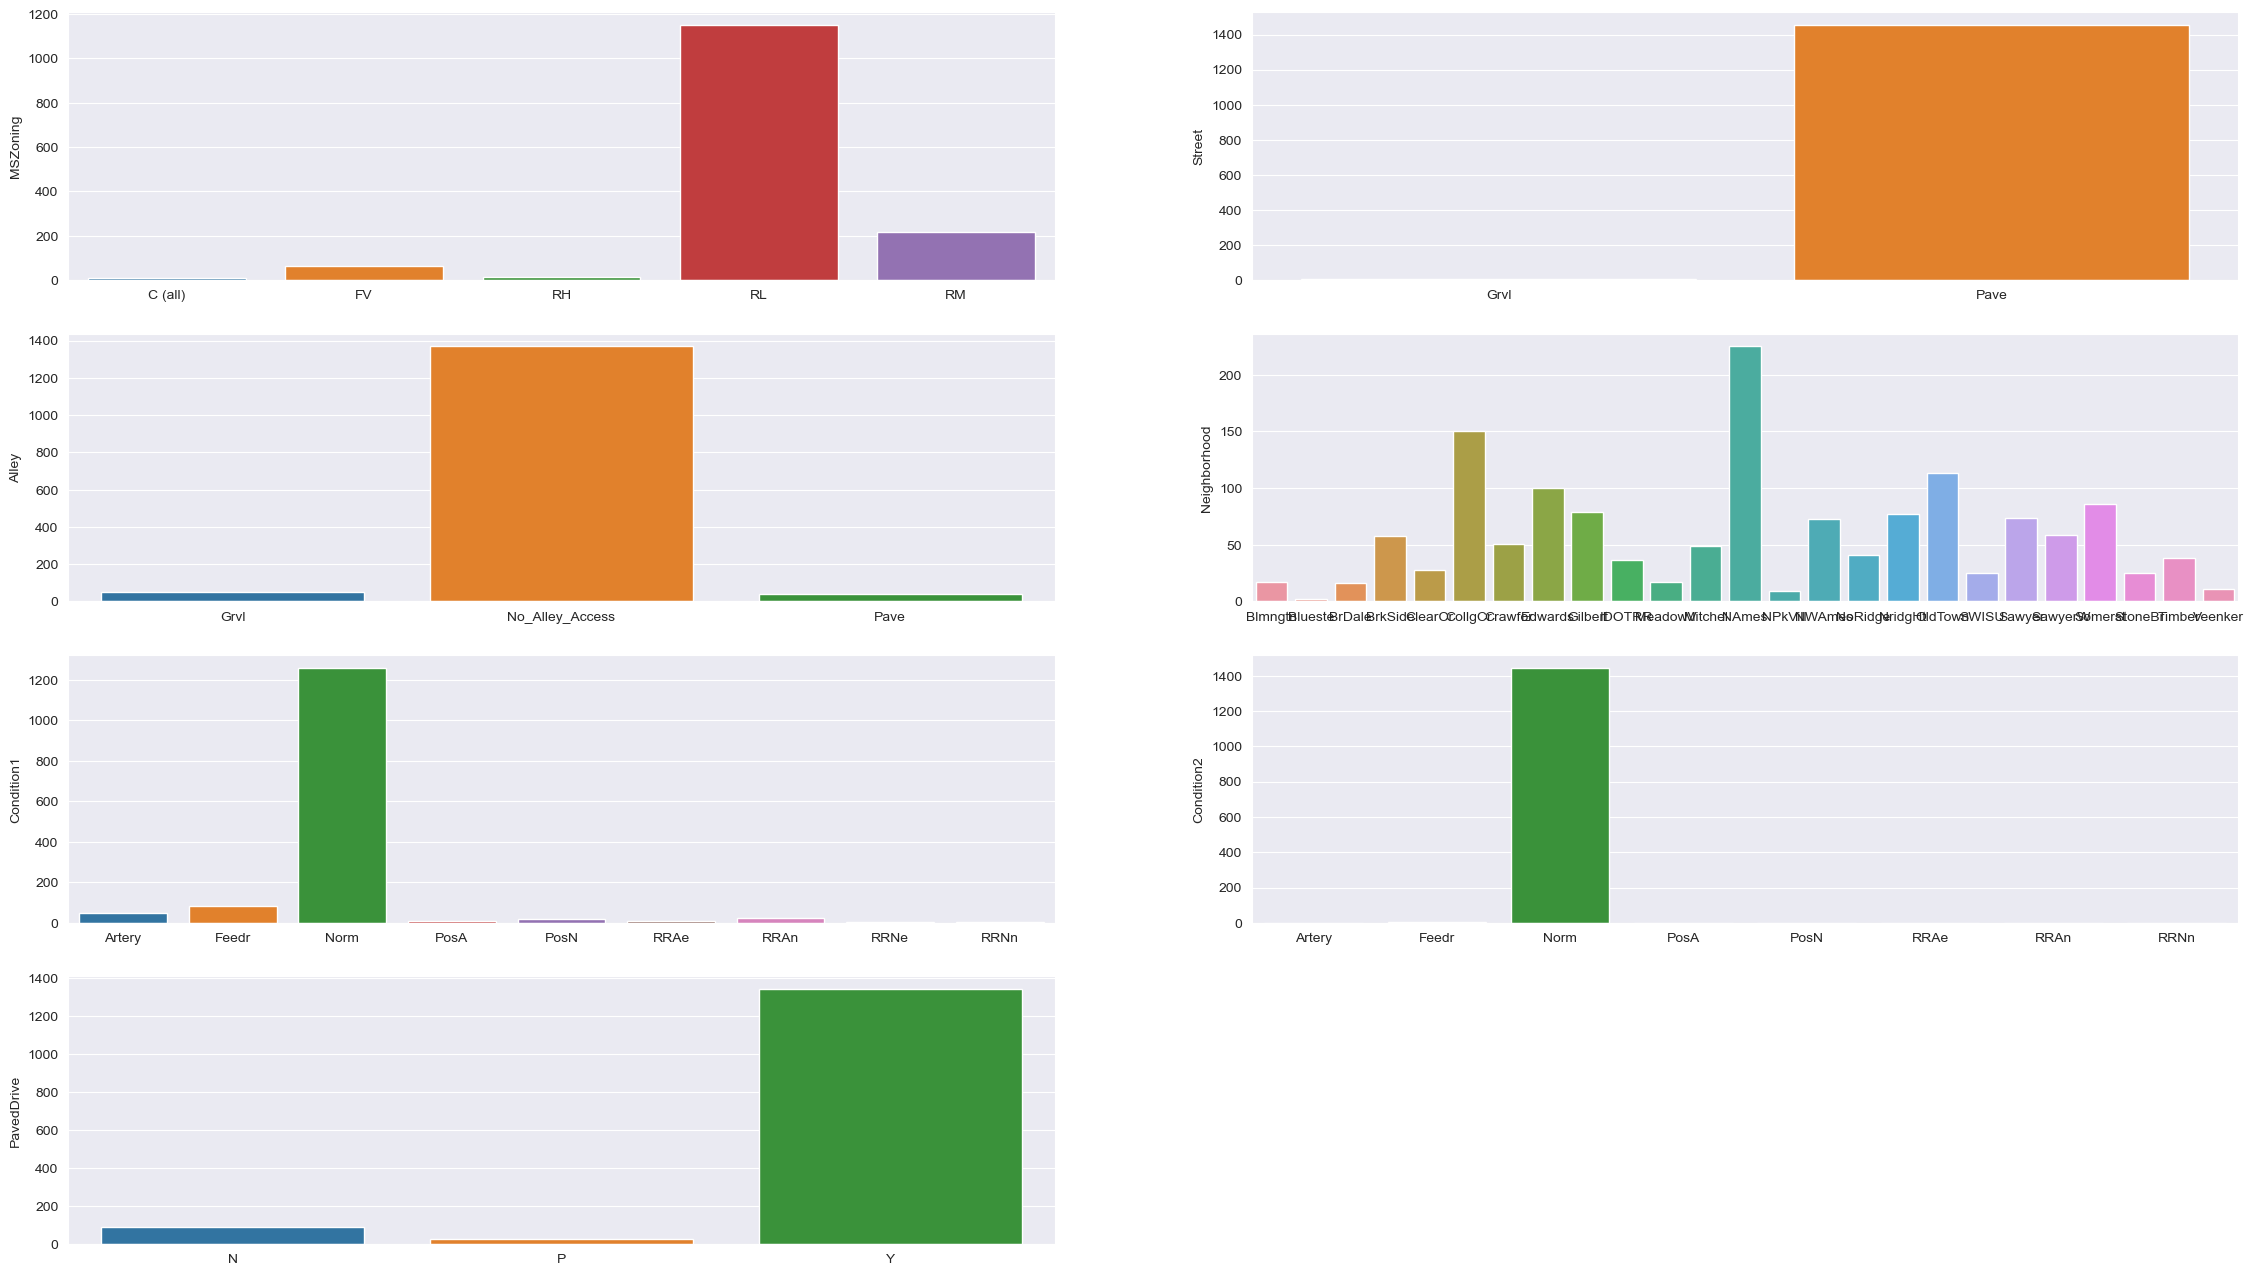

In [52]:
# Analysis of Categorical Variables - Lot Access Value Count 
plt.subplots(figsize=(28,16))
i=0
for col in Loc_Access:
    i=i+1
    plt.subplot(4,2,i)
    sns.barplot(df_catg[col].value_counts().index, df_catg[col].value_counts())

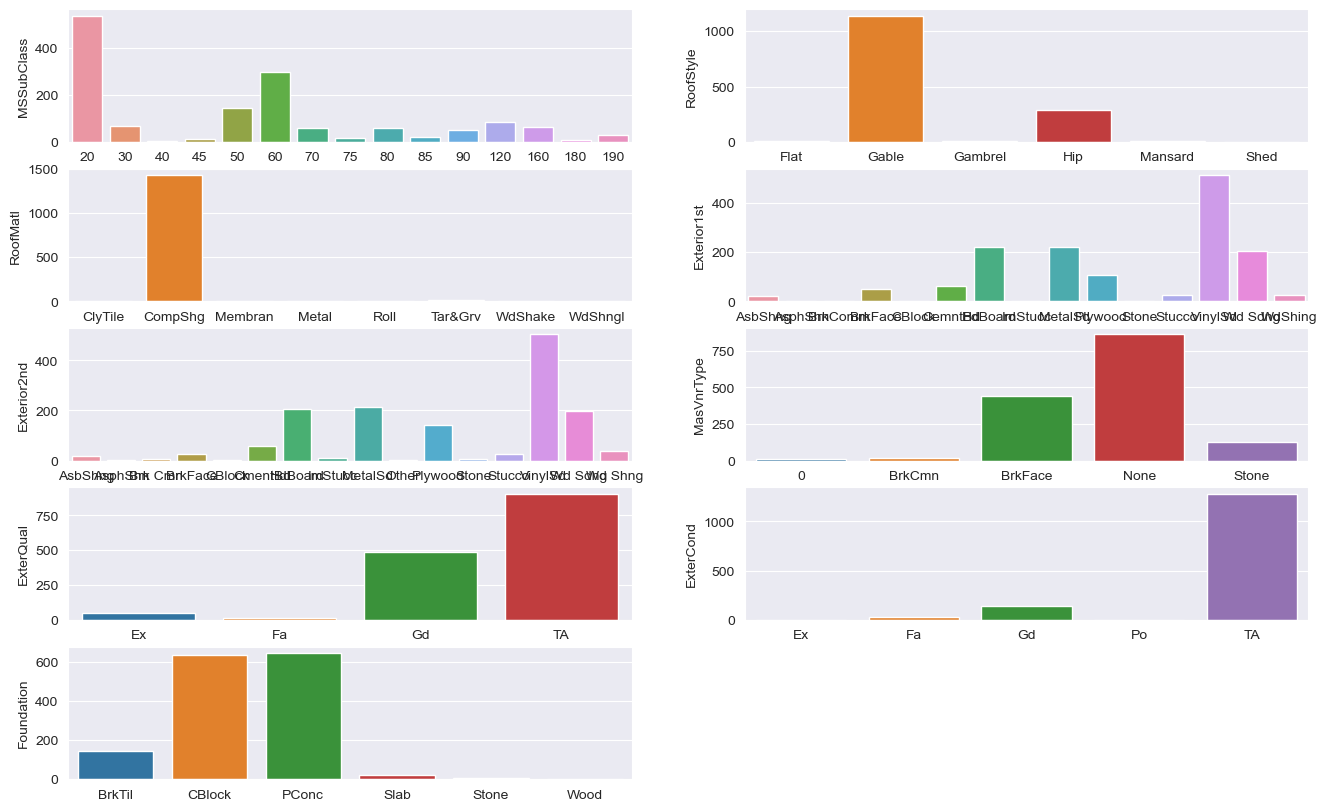

In [53]:
# Analysis of Categorical Variables - Construction Type Value Count 
plt.subplots(figsize=(16,10))
i=0
for col in HouseConst:
    i=i+1
    plt.subplot(5,2,i)
    sns.barplot(df_catg[col].value_counts().index, df_catg[col].value_counts())

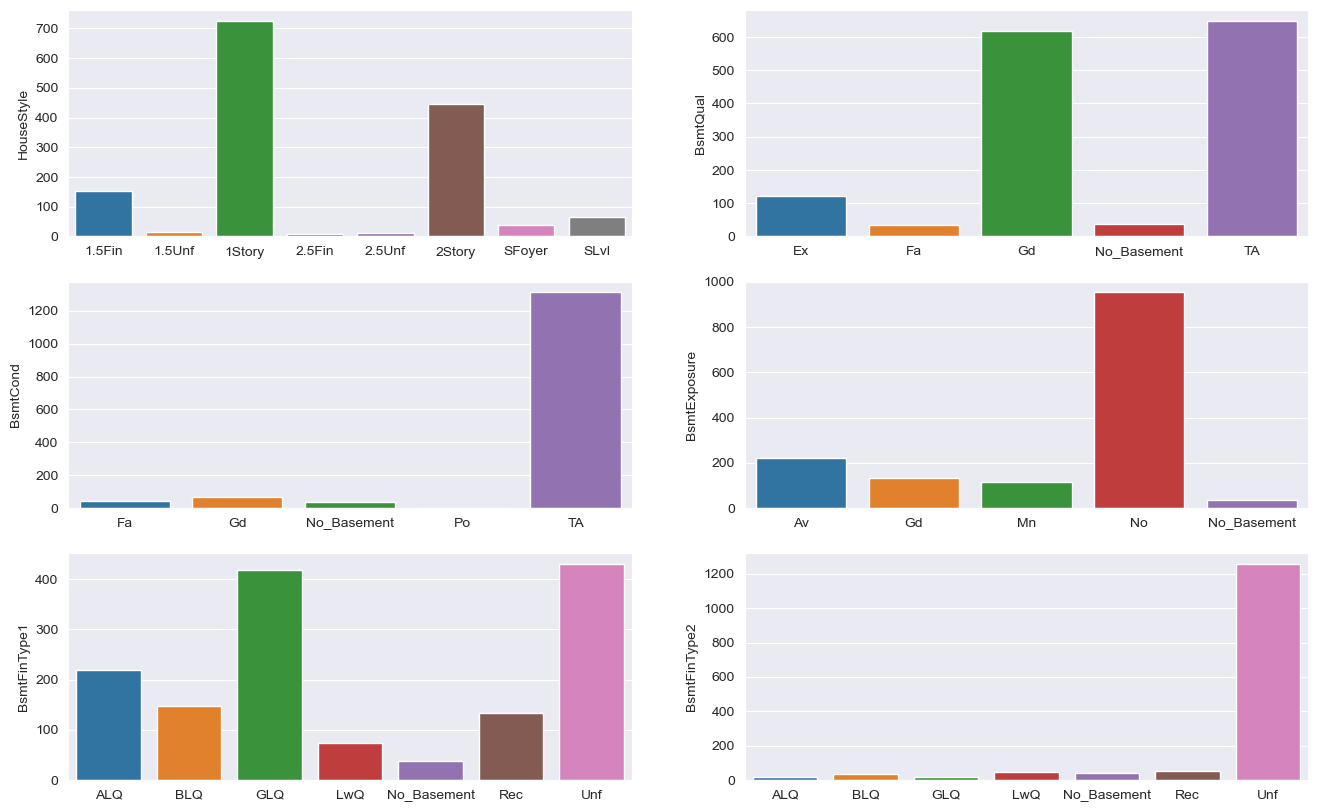

In [54]:
# Analysis of Categorical Variables - Basement Value Count 
plt.subplots(figsize=(16,10))
i=0
for col in Basement:
    i=i+1
    plt.subplot(3,2,i)
    sns.barplot(df_catg[col].value_counts().index, df_catg[col].value_counts())

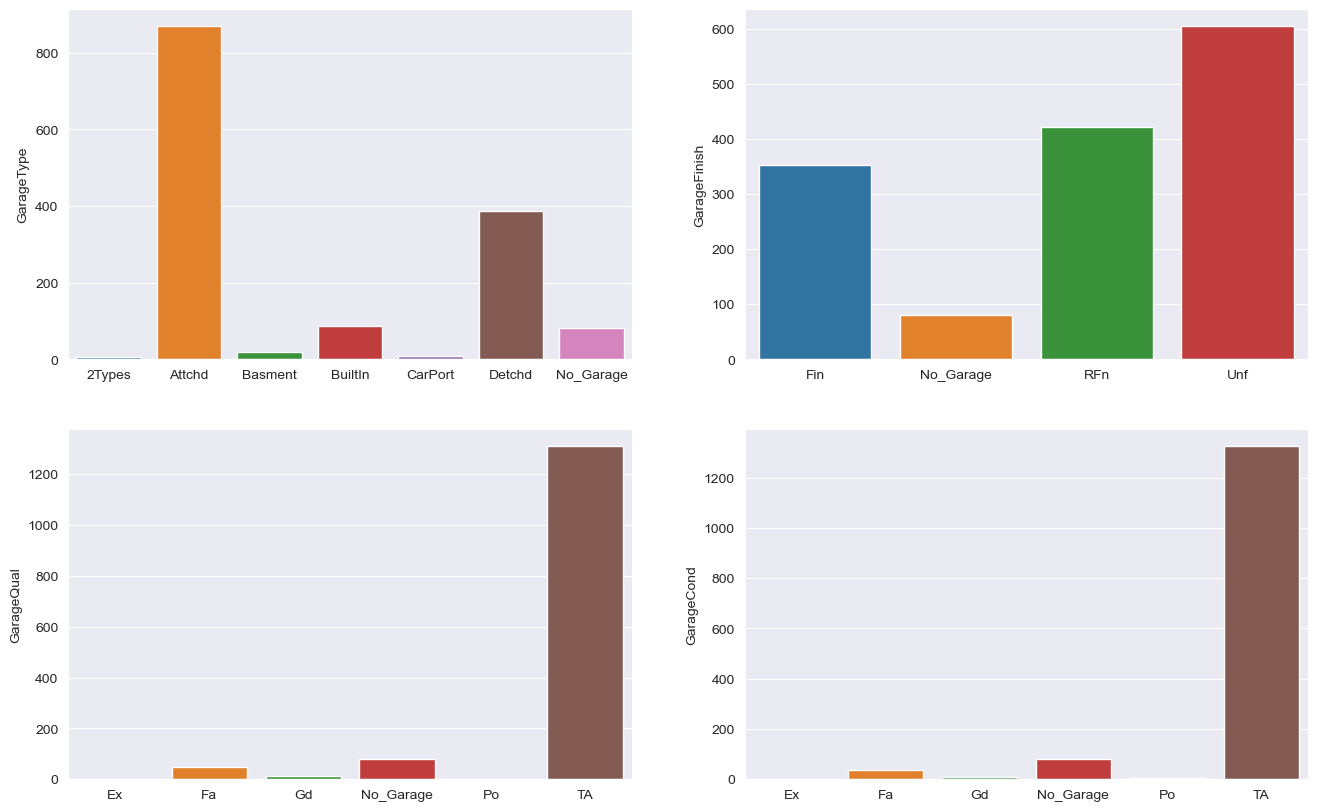

In [55]:
# Analysis of Categorical Variables - Garage Value Count 
plt.subplots(figsize=(16,10))
i=0
for col in Garage:
    i=i+1
    plt.subplot(2,2,i)
    sns.barplot(df_catg[col].value_counts().index, df_catg[col].value_counts())

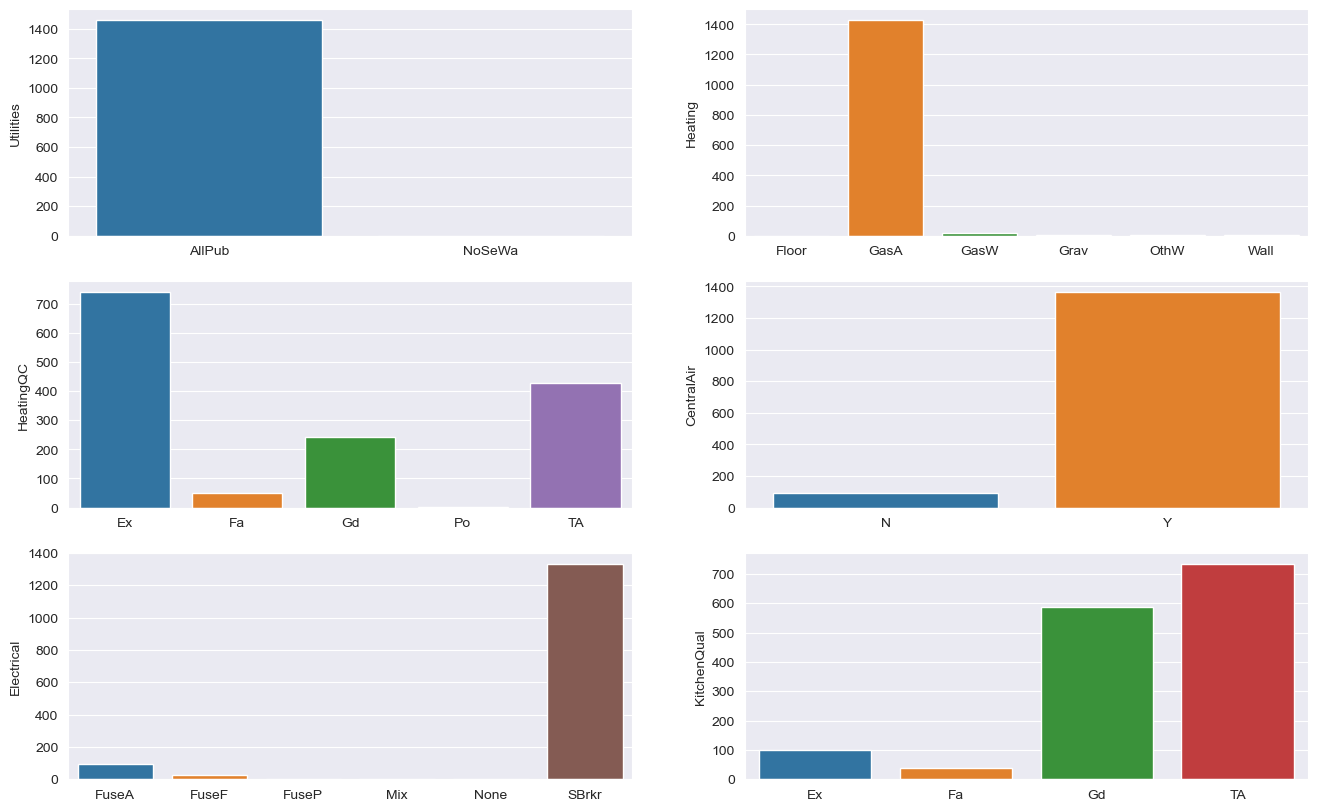

In [56]:
# Analysis of Categorical Variables - Utlilities and Interiors Value Count 
plt.subplots(figsize=(16,10))
i=0
for col in Util_Interiors:
    i=i+1
    plt.subplot(3,2,i)
    sns.barplot(df_catg[col].value_counts().index, df_catg[col].value_counts())

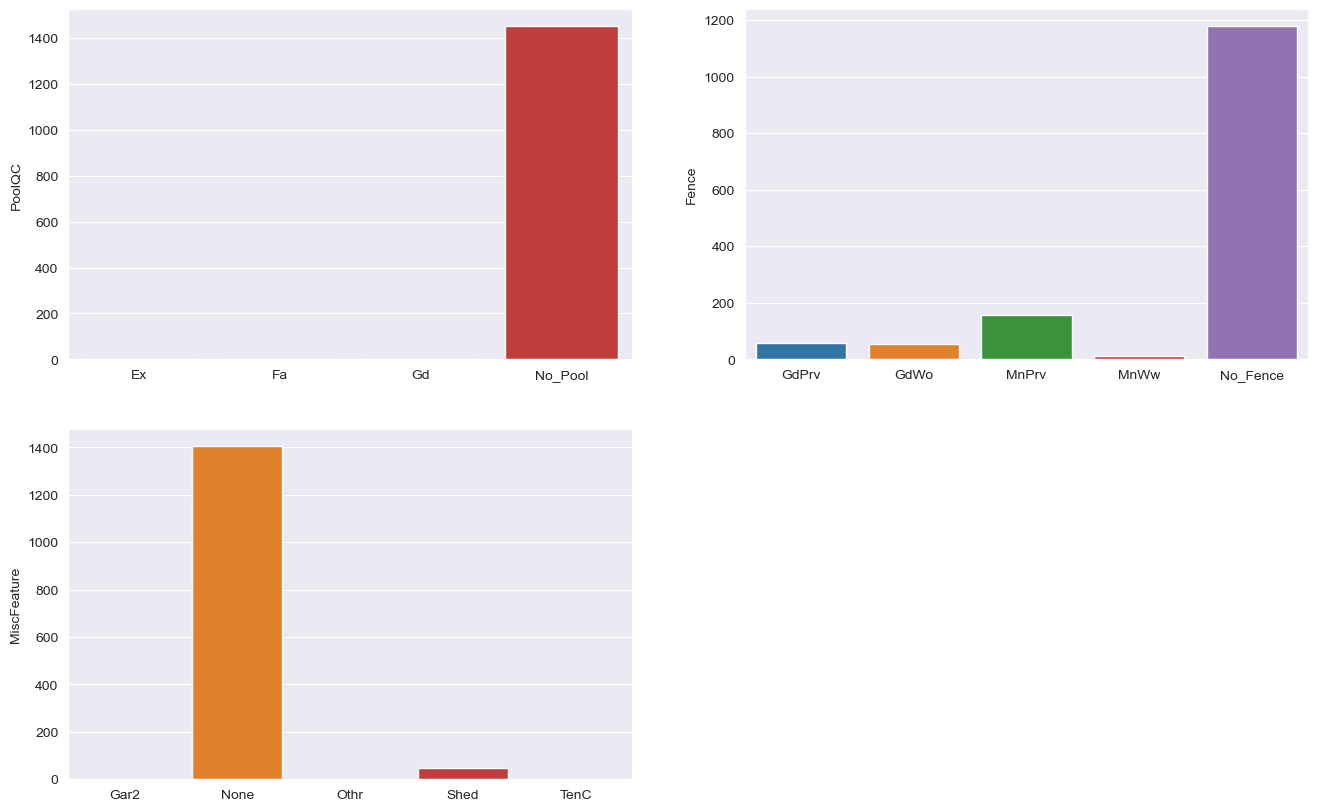

In [57]:

# Analysis of Categorical Variables - Misc / Other attributes Value Count 
plt.subplots(figsize=(16,10))
i=0
for col in Misc_Features:
    i=i+1
    plt.subplot(2,2,i)
    sns.barplot(df_catg[col].value_counts().index, df_catg[col].value_counts())

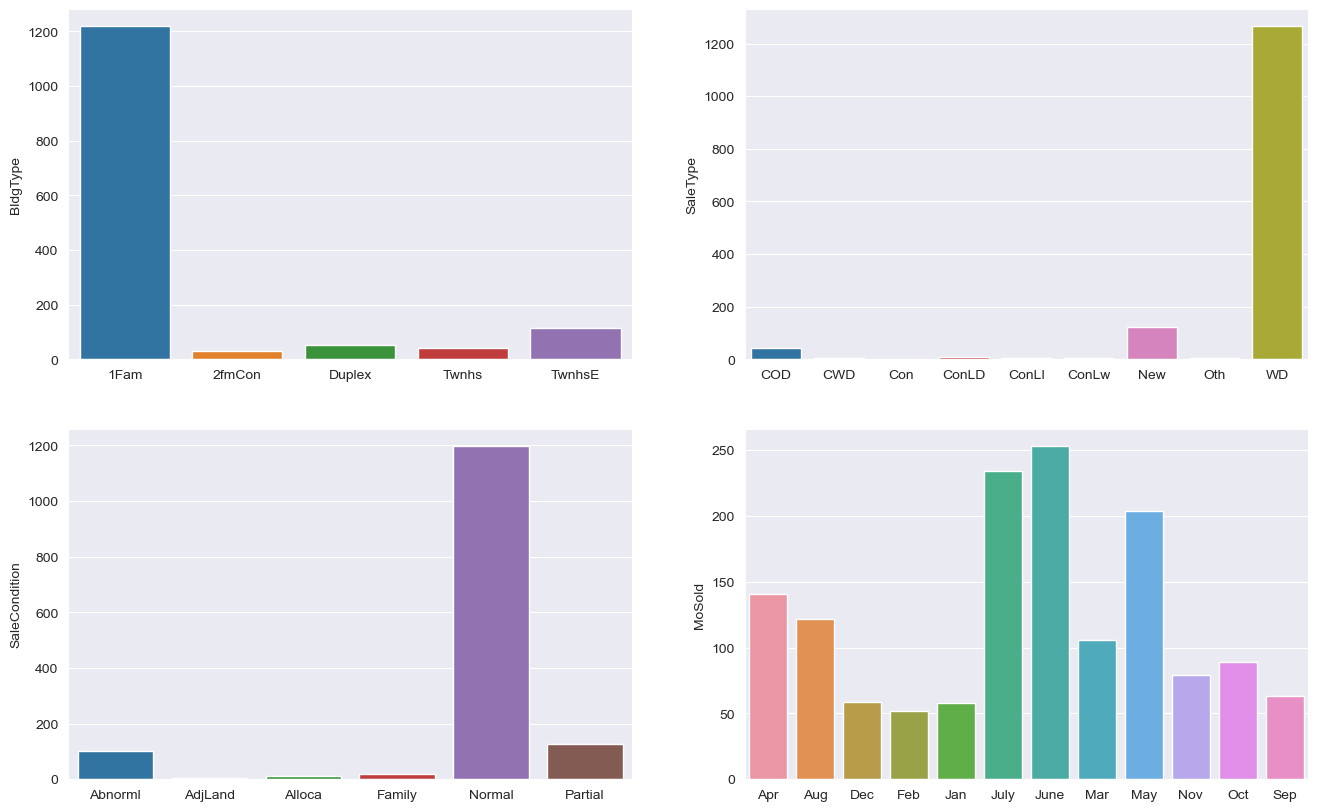

In [58]:
# Analysis of Categorical Variables - Sale Ownership Value Count 
plt.subplots(figsize=(16,10))
i=0
for col in Sale:
    i=i+1
    plt.subplot(2,2,i)
    sns.barplot(df_catg[col].value_counts().index, df_catg[col].value_counts())

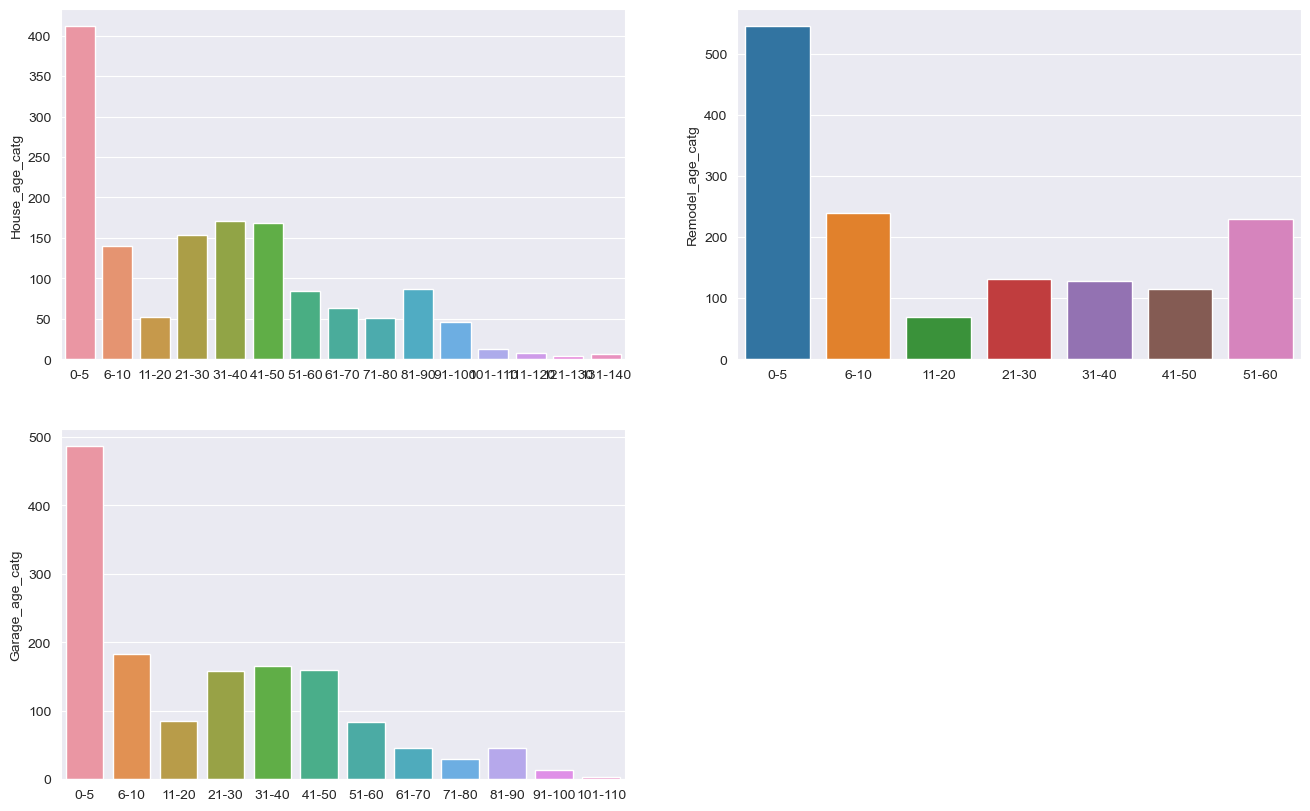

In [59]:
# Analysis of Categorical Variables - House Age Ownership Value Count 
plt.subplots(figsize=(16,10))
i=0
for col in Age:
    i=i+1
    plt.subplot(2,2,i)
    sns.barplot(df_catg[col].value_counts().index, df_catg[col].value_counts())

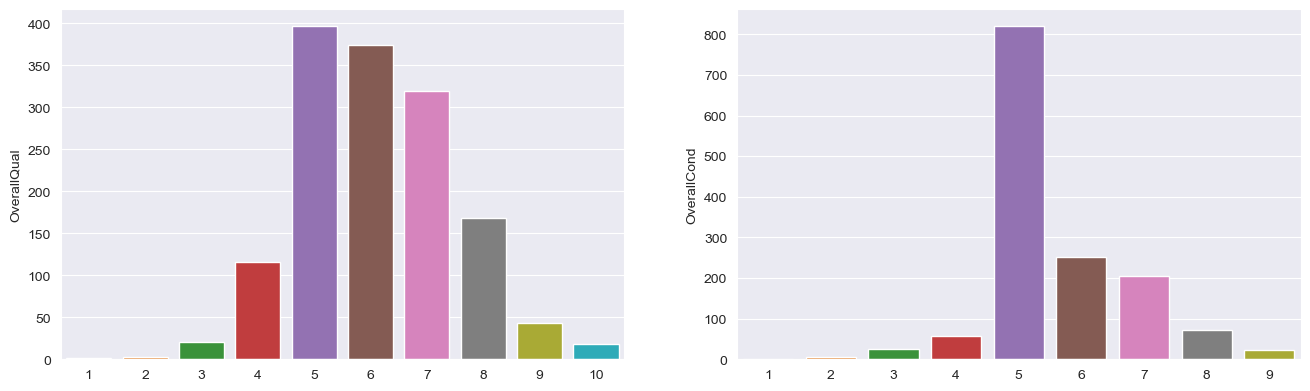

In [60]:
# Analysis of Categorical Variables - House Condition Rating Value Count 
plt.subplots(figsize=(16,10))
i=0
for col in Condition_rating:
    i=i+1
    plt.subplot(2,2,i)
    sns.barplot(df_catg[col].value_counts().index, df_catg[col].value_counts())

#### Observation :
-   MSZoning: Identifies the general zoning classification of the sale.
    - RL : Residential Lower Density : Has highest number of House Sales.
-	Street: Type of road access to property
    - Grvl : Houses with Gravel road access are higher in sales.
-	Alley: Type of alley access to property
    - No_Alley_Access : Houses with no access to alley are higher in sales.
-	LotShape: General shape of property
    - Reg, IR1 : Houses with Regular and Slightly regular shape are higher in sales.
-	LandContour: Flatness of the property
    - Lvl : Houses with Near Flat /Level are higher in Sales.
-	Utilities: Type of utilities available
    - AllPub : Houses with all public utilities are higher in sales.
-	LotConfig: Lot configuration
    - Inside : House with inside configurate are higher in sales, followed by corner houses.
-	LandSlope: Slope of property
    - Gtl : Houses with gentle slope are higher in sales.
-	Neighborhood: Physical locations within Ames city limits
    - Houses in neighbourhood of Northwest Ames, College Creek, Old Town, Edwards  are higher in sales, when compared to rest.
-	Condition1: Proximity to various conditions
    - Houses with Normal Proximity are higher in sales.
-	Condition2: Proximity to various conditions (if more than one is present)
    - Houses with more than one Normal proximity are higher in sales.
-	HouseStyle: Style of dwelling
    - Houses with 1 and 2 story are high in sales.
-	RoofStyle: Type of roof
    - Houses with Gable roof type are higher in sales.
-	RoofMatl: Roof material
    - Houses with Standard (Composite) Shingle roof material are higher in sales.
-	Exterior1st: Exterior covering on house
-	Exterior2nd: Exterior covering on house (if more than one material)
    - Houses with Vinyl sliding are higher in sales, followed by Hard board, Metal and wood sliding.
-	MasVnrType: Masonry veneer type
    - Houses with Masonry as None are higher sales, indicating that this may not be one of the factors affecting sales.
-	ExterCond: Evaluates the present condition of the material on the exterior
    - Houses with Average / Typical condition are higher in sales.
-	ExterQual: Evaluates the quality of the material on the exterior 
    - Houses with Average / Typical material, followed by Good material are higher in sales
-	Foundation: Type of foundation
    - Houses with Poured Concrete and Cinder Block foundation are higher in sales.
-	BsmtQual: Evaluates the height of the basement
    - Houses with Typical (80-89 inches) and Good (90-99 inches) of basement height are higher in sales.
-	BsmtCond: Evaluates the general condition of the basement
    - Houses with Typical - slight dampness allowed are higher in sales.
-	BsmtExposure: Refers to walkout or garden level walls
    - Houses with No Exposure are higher in sales.
-	BsmtFinType1: Rating of basement finished area
    - Houses with Unfinished and Good Living Quarters are higher in sales.
-	BsmtFinType2: Rating of basement finished area (if multiple types)
    - Houses with Unfinished Basements are higher in sales.
-	Heating: Type of heating
    - Housed with Gas forced warm air furnace are higher in sales.
-	HeatingQC: Heating quality and condition
    - Houses with Excellent and Good Heating Quality are higher in sales.
-	CentralAir: Central air conditioning
    - Houses with Central air conditioning are higher in sales.
-	Electrical: Electrical system
    - Houses with Standard Circuit Breakers & Romex are higher in sales.
-	KitchenQual: Kitchen quality
    - Houses with Typical / Average and Good quality kitchens are higher in sales.
-	Functional: Home functionality (Assume typical unless deductions are warranted)
    - Houses with Typical Functionality / deductions are higher in sales.
-	FireplaceQu: Fireplace quality
    - Houses with no fireplace are higher in sales, followed by house with good quality fireplace.
-	GarageType: Garage location
    - Houses with attached garages are higher in sales.
-	GarageFinish: Interior finish of the garage
    - Houses with unfinished garages are higher sales, followed by houses with rough finished garages.
-	GarageQual: Garage quality
-	GarageCond: Garage condition
    - Houses with Typical / Average condition  and quality garages are higher in sales.
-	PavedDrive: Paved driveway
    - Houses with Paved path are higher in sales.
-	PoolQC: Pool quality
    - Houses with no pool are higher in sales.
-	Fence: Fence quality
    - Houses with no fence are higher in sales.
-	MiscFeature: Miscellaneous feature not covered in other categories
    - Houses with no additional features (other than the covered above) are higher in sales.
-	BldgType: Type of dwelling
    - Houses meant for Single Family detachted are higher in sales.
-	SaleType: Type of sale
    - Houses sold with Convential Warranty deed are higher in sales.
-	SaleCondition: Condition of sale
    - Normal Sale Houses are higher in sales.
-   Age - From Year of Construction, Year of Remodelling and Year of Garage Built
    - Houses Sold which have been constructed / remodelled / Garage Built are higher, if these are done in last 0-5 years.
- OverallQual: Rates the overall material and finish of the house
- OverallCond: Rates the overall condition of the house
    - SalePrice is highest for the Rating 5.
- MoSold - Month House is sold.
    - June, July record highest House Sales.

In [61]:
###### Lets look at Categorical Variables Relationship with SalePrice

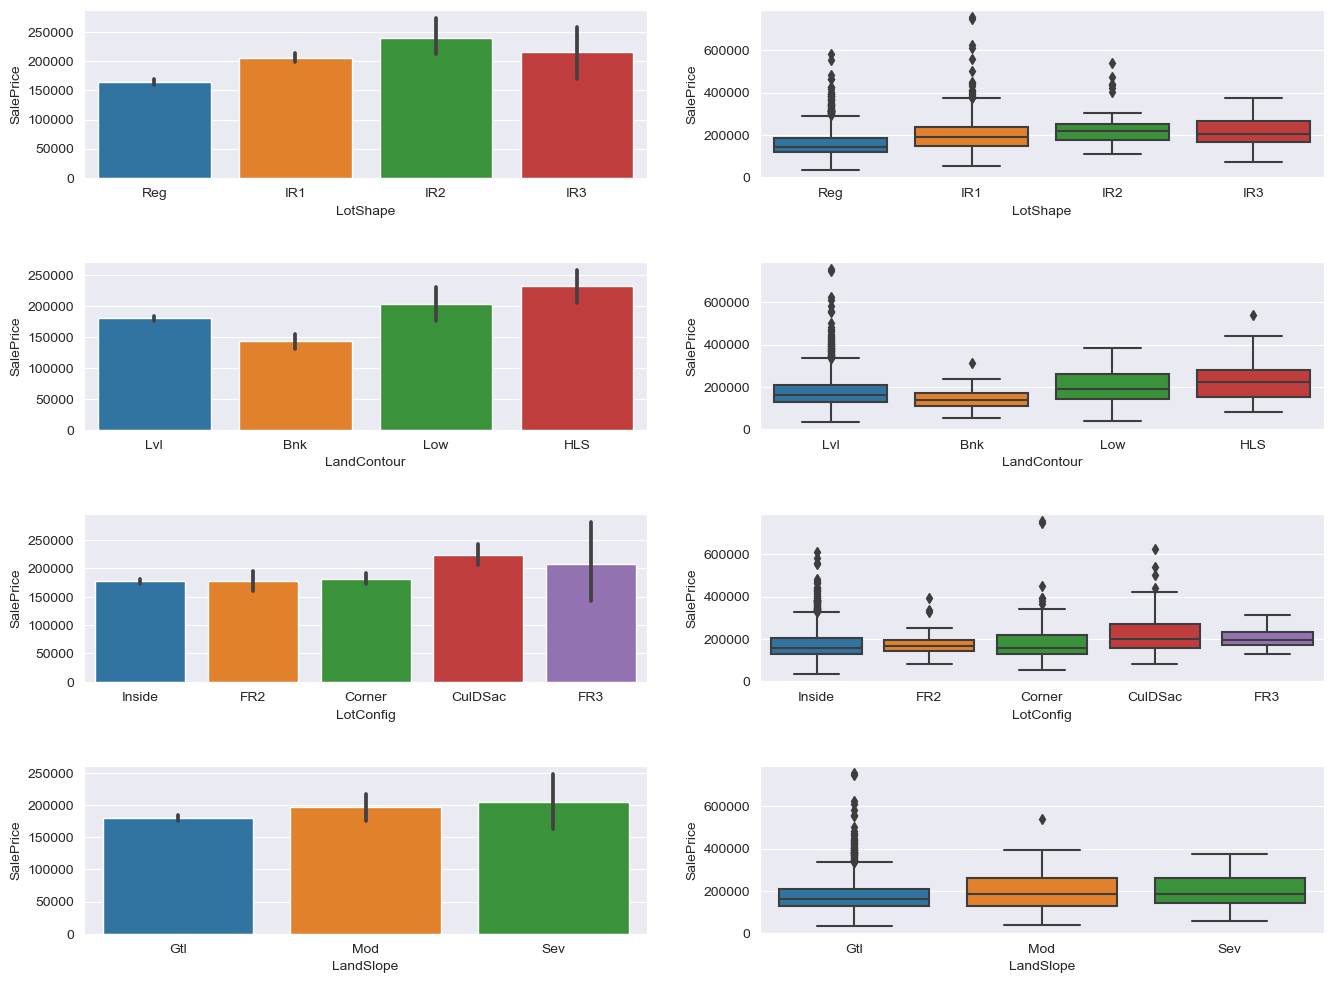

In [62]:
# Lot Type vs. SalePrice
plt.subplots(figsize=(16,12))
i=0
for col in LotType:
    i=i+1
    plt.subplot(4,2,i)
    plt.subplots_adjust(hspace=0.5)
    sns.barplot(Housing_df[col], Housing_df['SalePrice'])
    i=i+1
    plt.subplot(4,2,i)
    plt.subplots_adjust(hspace=0.5)
    sns.boxplot(Housing_df[col], Housing_df['SalePrice'])
    

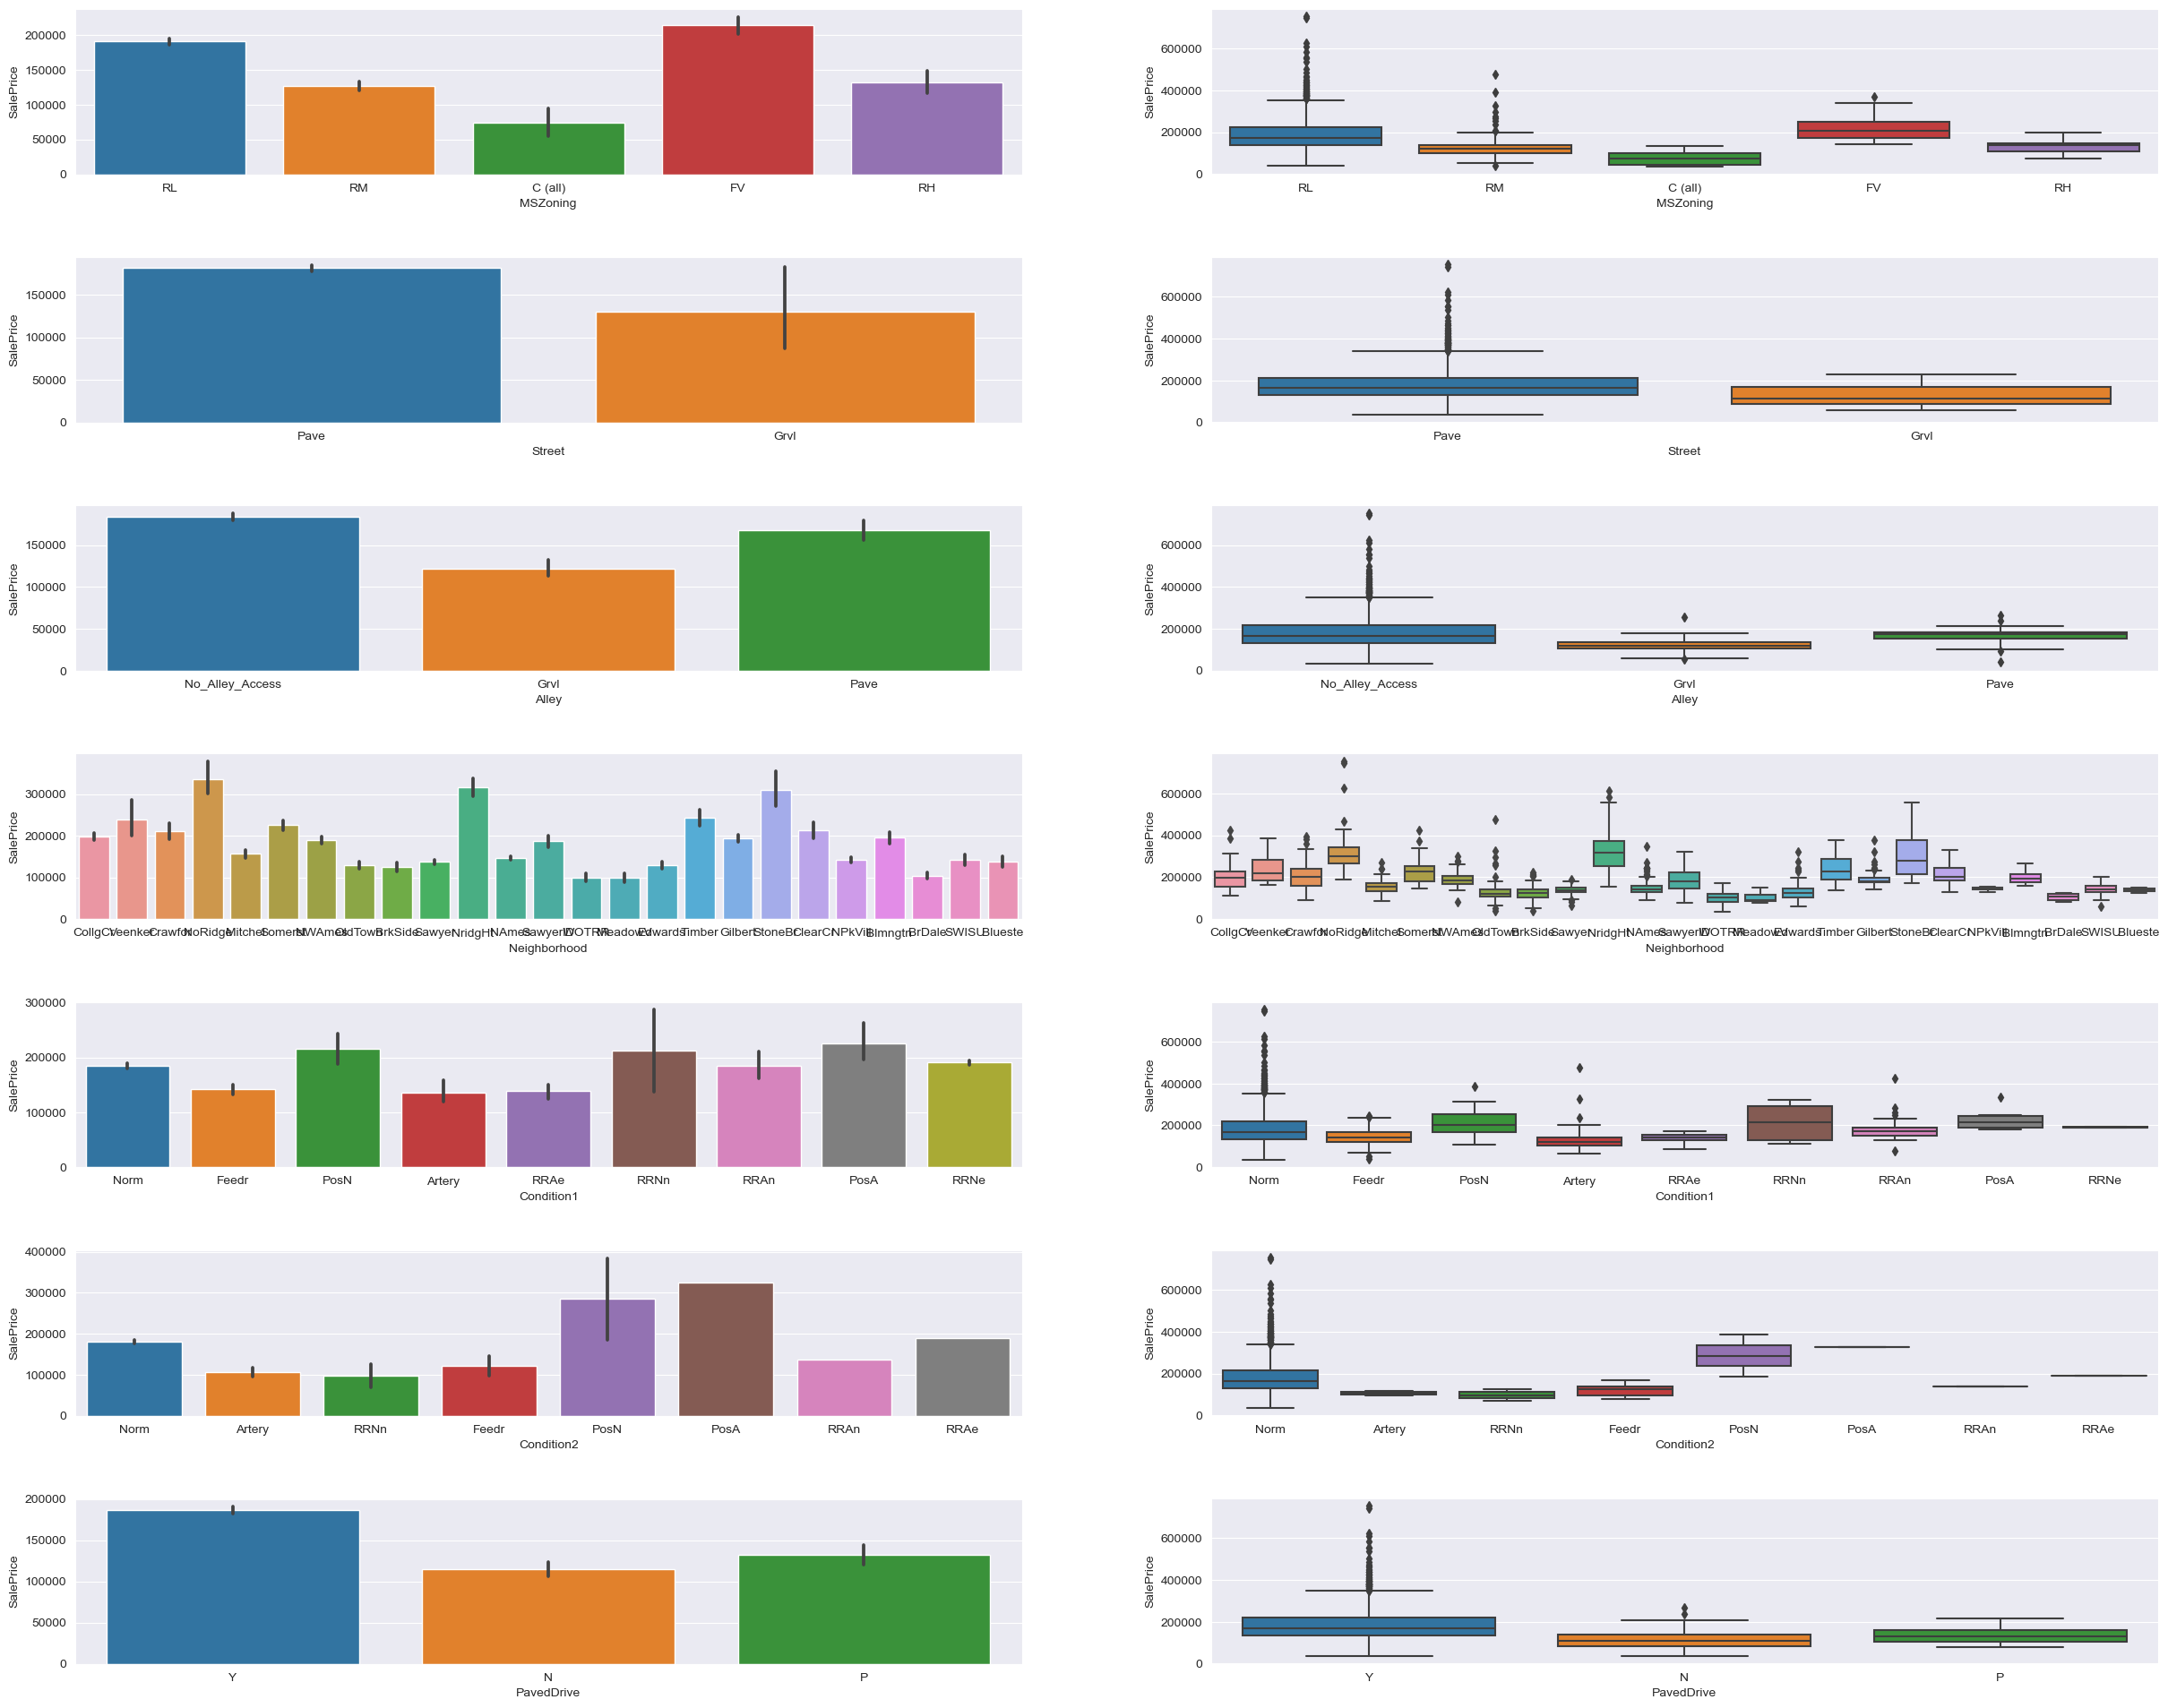

In [63]:
 
# House Location / Neighbourhood vs. SalePrice
plt.subplots(figsize=(30,24))
i=0
for col in Loc_Access :
    i=i+1
    plt.subplot(7,2,i)
    plt.subplots_adjust(hspace=0.5)
    sns.barplot(Housing_df[col], Housing_df['SalePrice'])
    i=i+1
    plt.subplot(7,2,i)
    plt.subplots_adjust(hspace=0.5)
    sns.boxplot(Housing_df[col], Housing_df['SalePrice'])

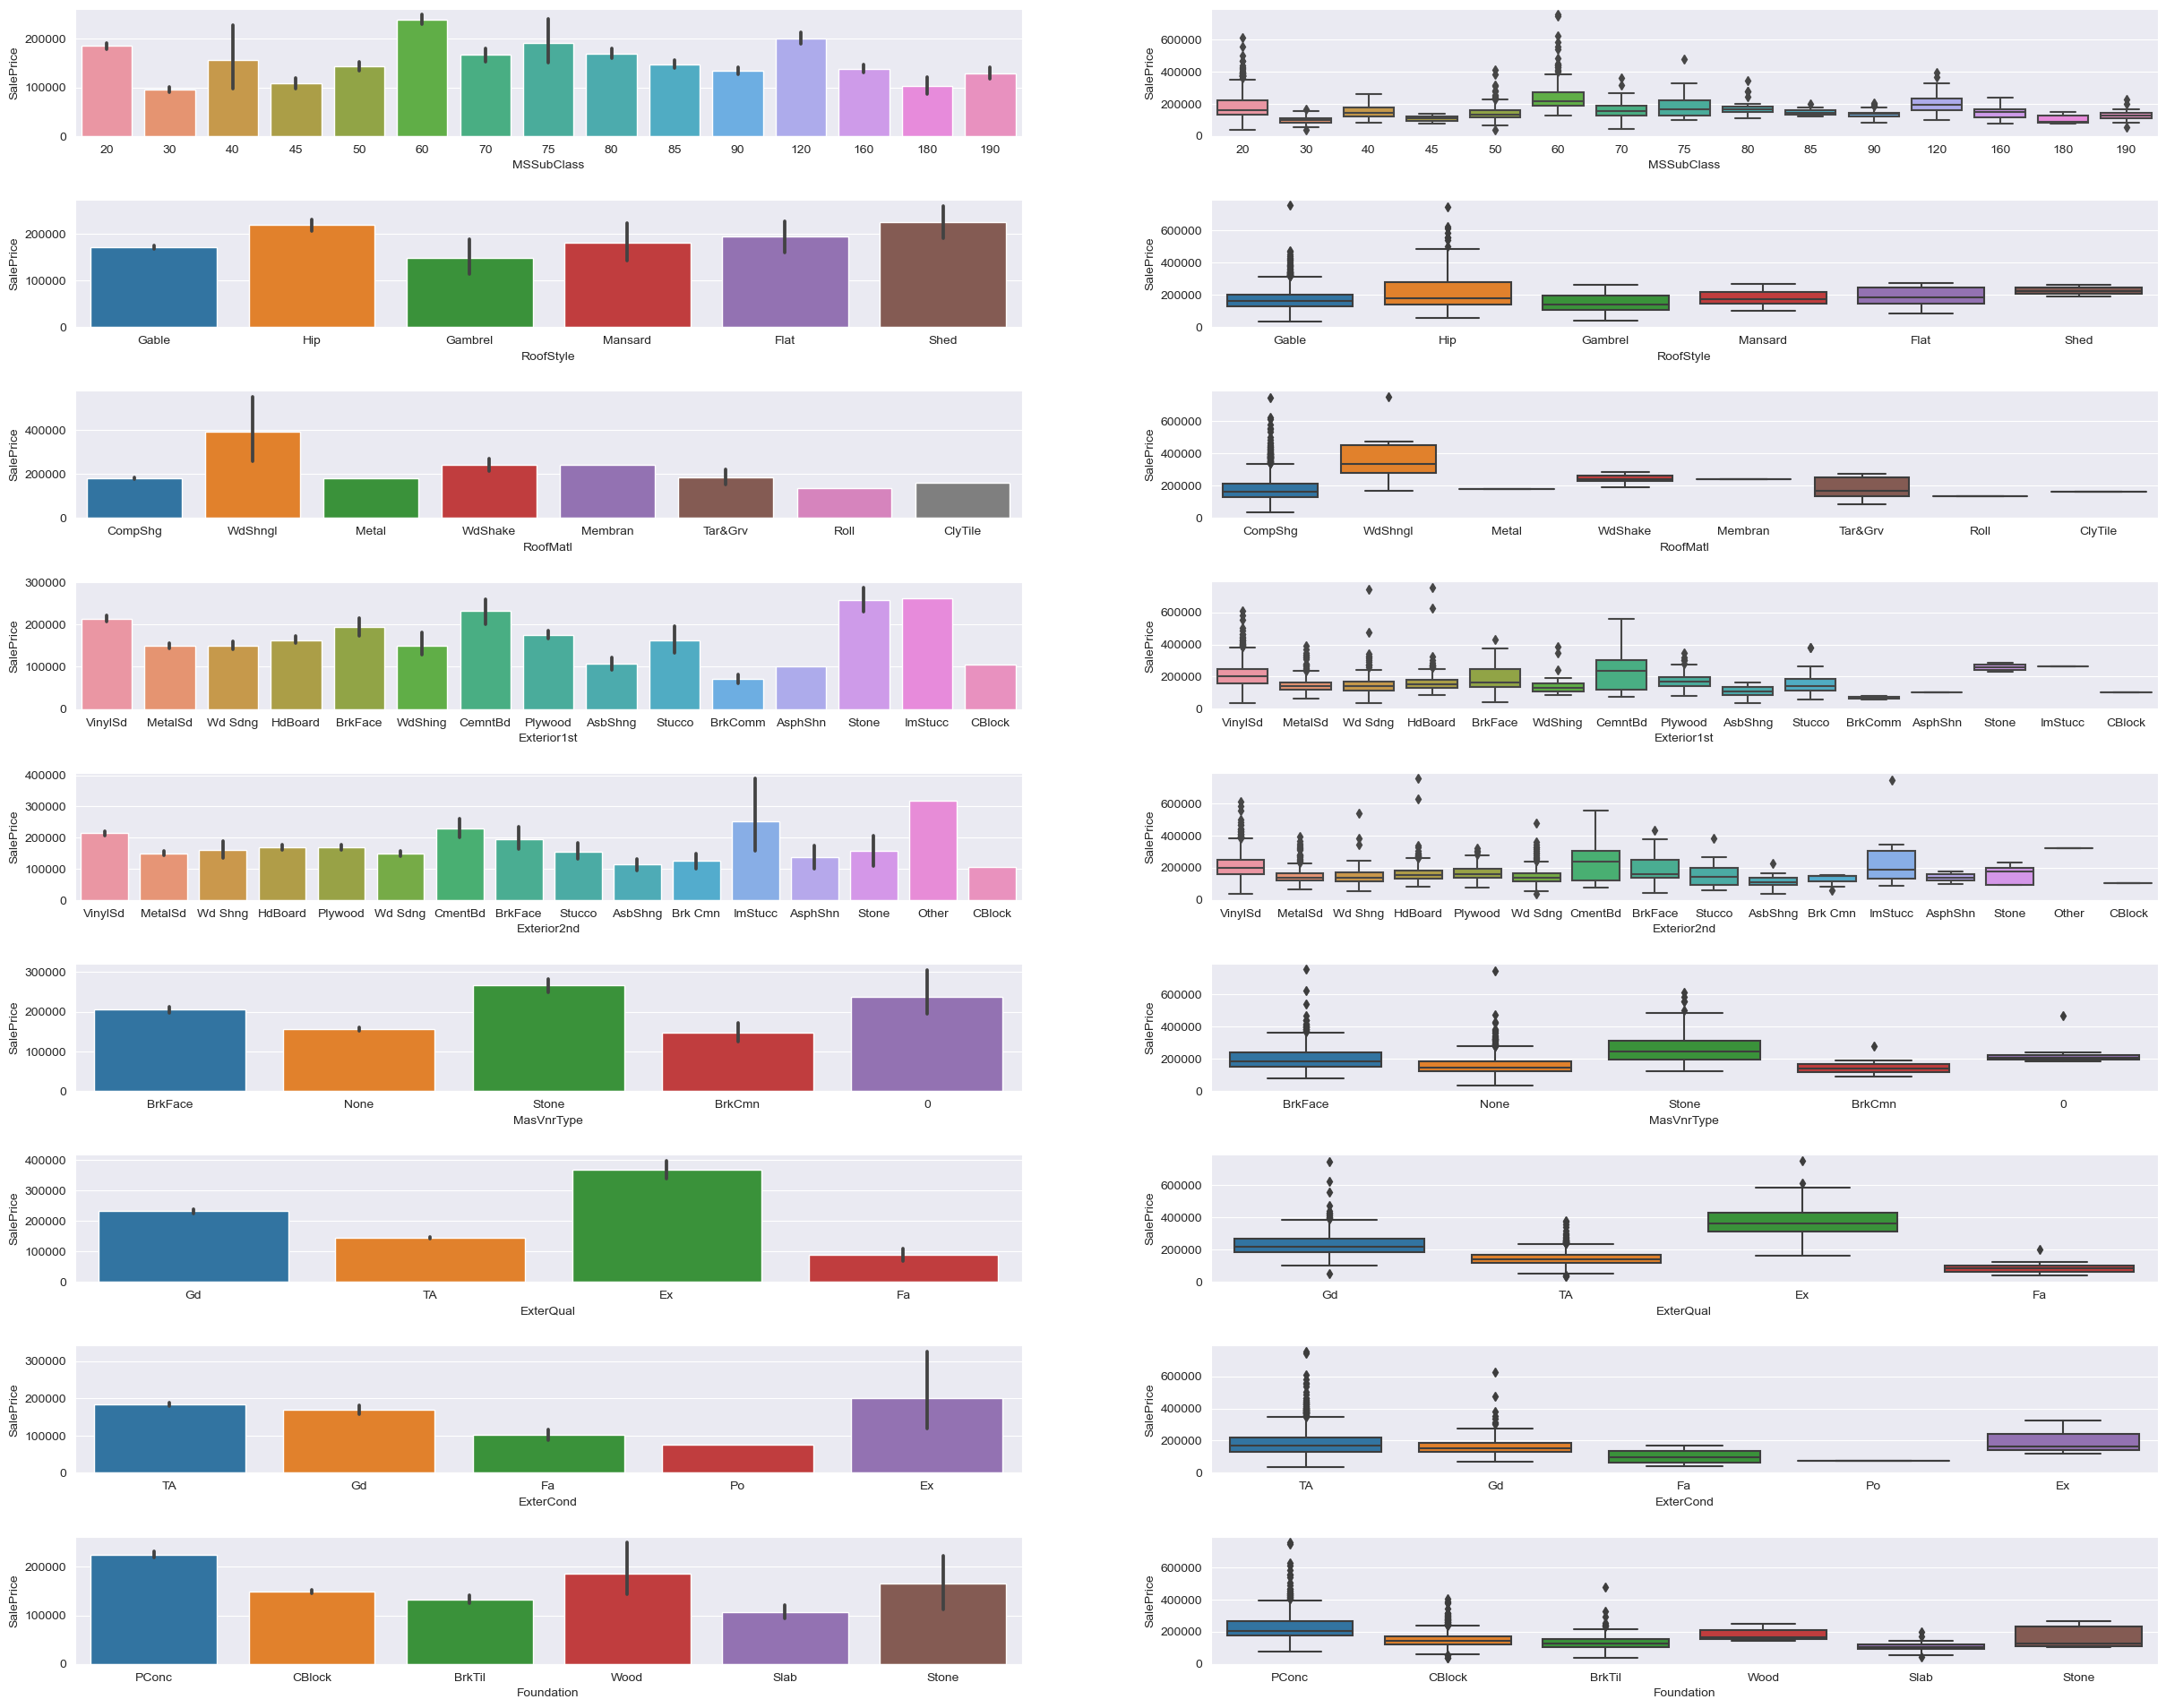

In [64]:
# House Construction Type vs. SalePrice
plt.subplots(figsize=(30,24))
i=0
for col in HouseConst :
    i=i+1
    plt.subplot(9,2,i)
    plt.subplots_adjust(hspace=0.5)
    sns.barplot(Housing_df[col], Housing_df['SalePrice'])
    i=i+1
    plt.subplot(9,2,i)
    plt.subplots_adjust(hspace=0.5)
    sns.boxplot(Housing_df[col], Housing_df['SalePrice'])

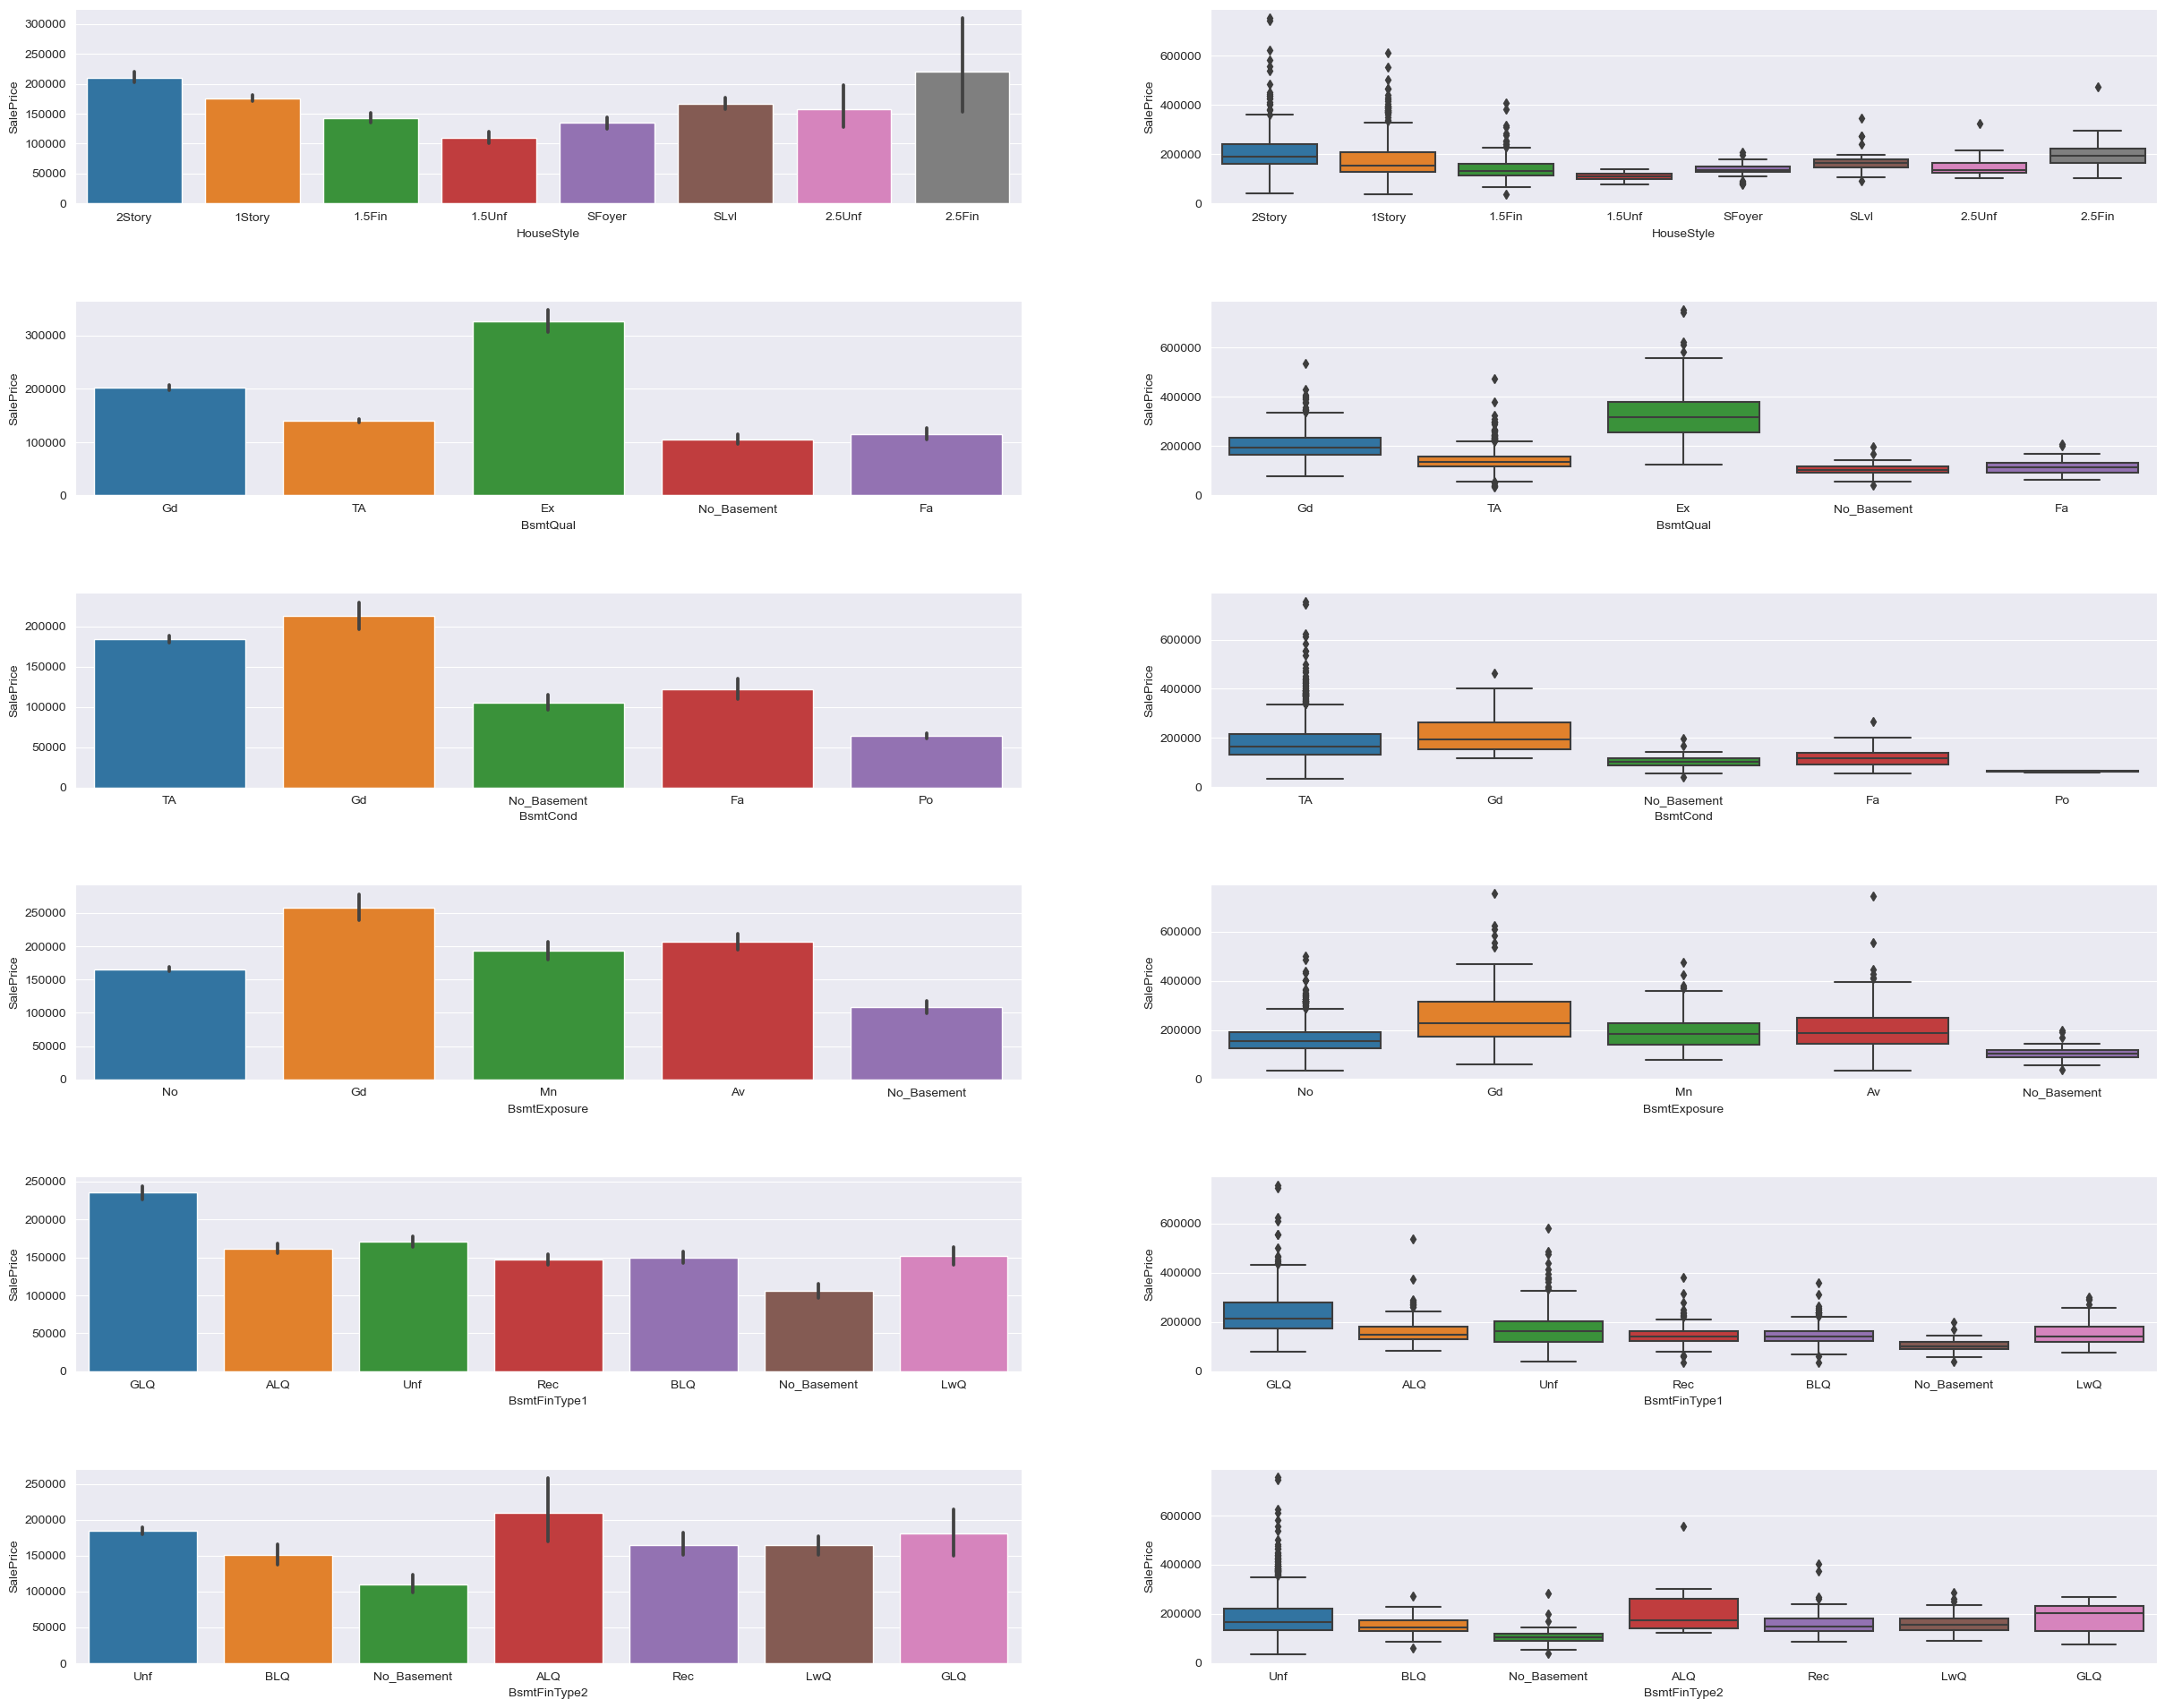

In [65]:
# House Basement Type vs. SalePrice
plt.subplots(figsize=(30,24))
i=0
for col in Basement:
    i=i+1
    plt.subplot(6,2,i)
    plt.subplots_adjust(hspace=0.5)
    sns.barplot(Housing_df[col], Housing_df['SalePrice'])
    i=i+1
    plt.subplot(6,2,i)
    plt.subplots_adjust(hspace=0.5)
    sns.boxplot(Housing_df[col], Housing_df['SalePrice'])

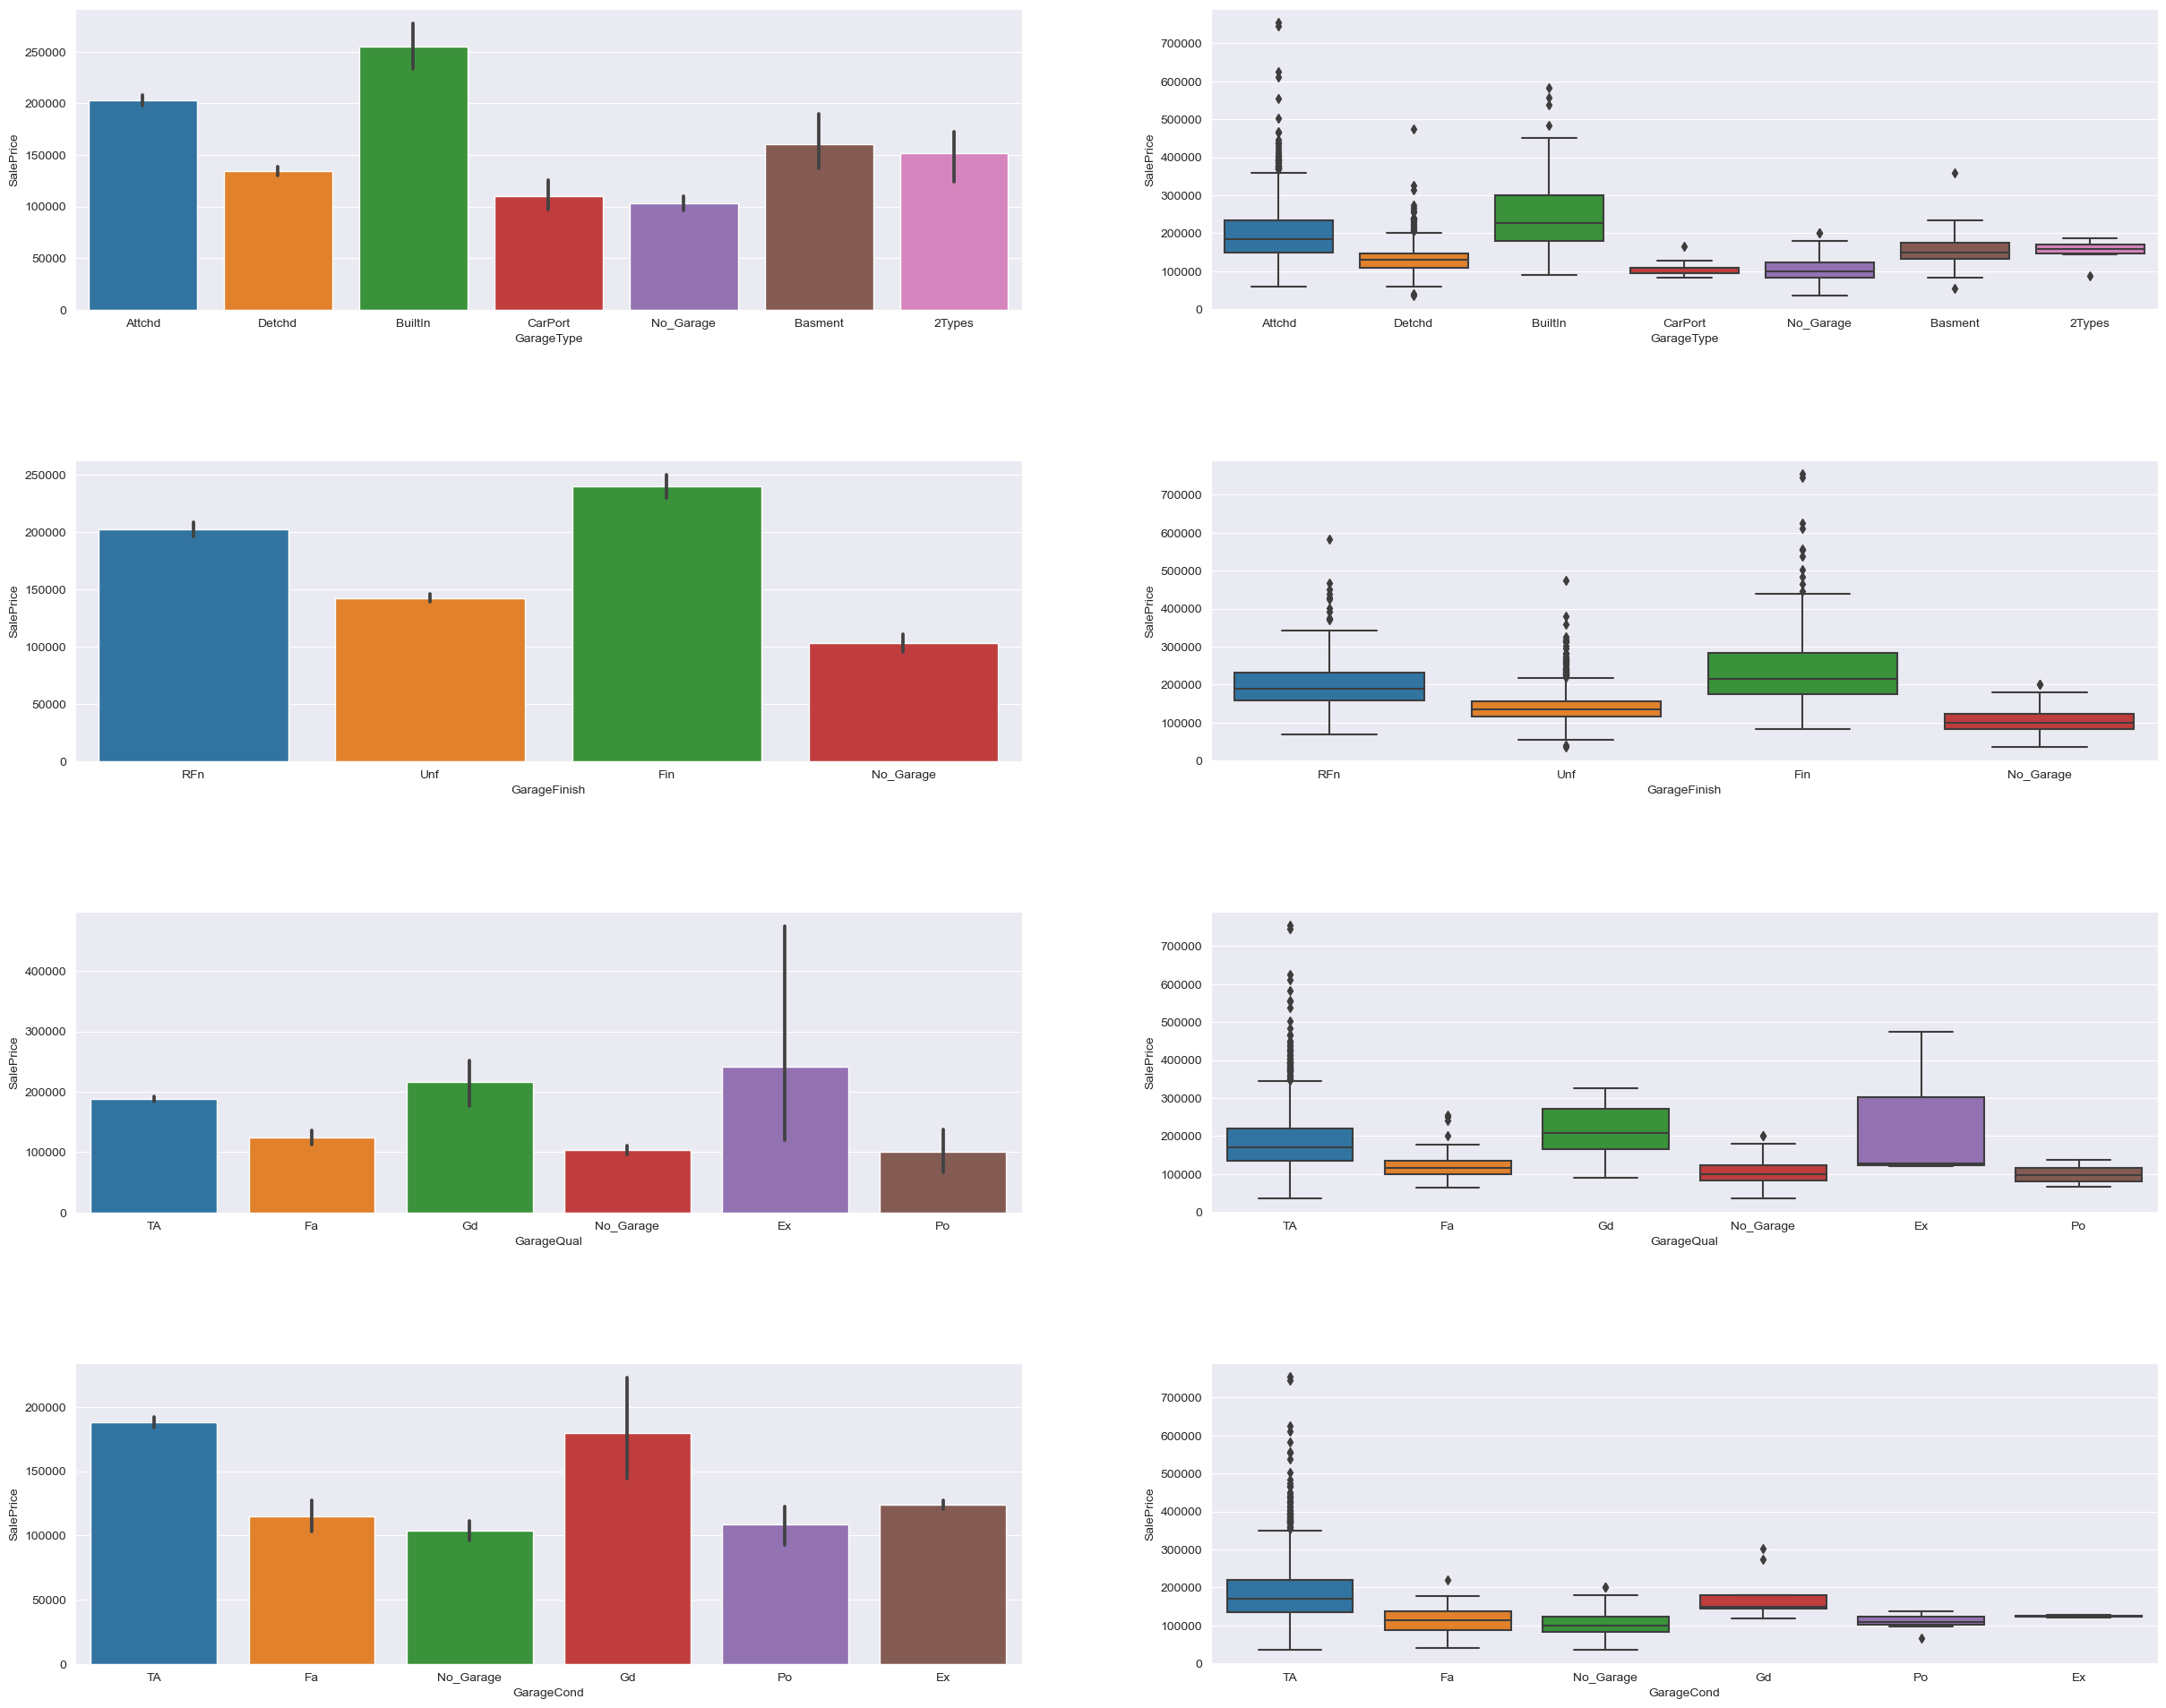

In [66]:
# House Garage  Type vs. SalePrice
plt.subplots(figsize=(30,24))
i=0
for col in Garage :
    i=i+1
    plt.subplot(4,2,i)
    plt.subplots_adjust(hspace=0.5)
    sns.barplot(Housing_df[col], Housing_df['SalePrice'])
    i=i+1
    plt.subplot(4,2,i)
    plt.subplots_adjust(hspace=0.5)
    sns.boxplot(Housing_df[col], Housing_df['SalePrice'])




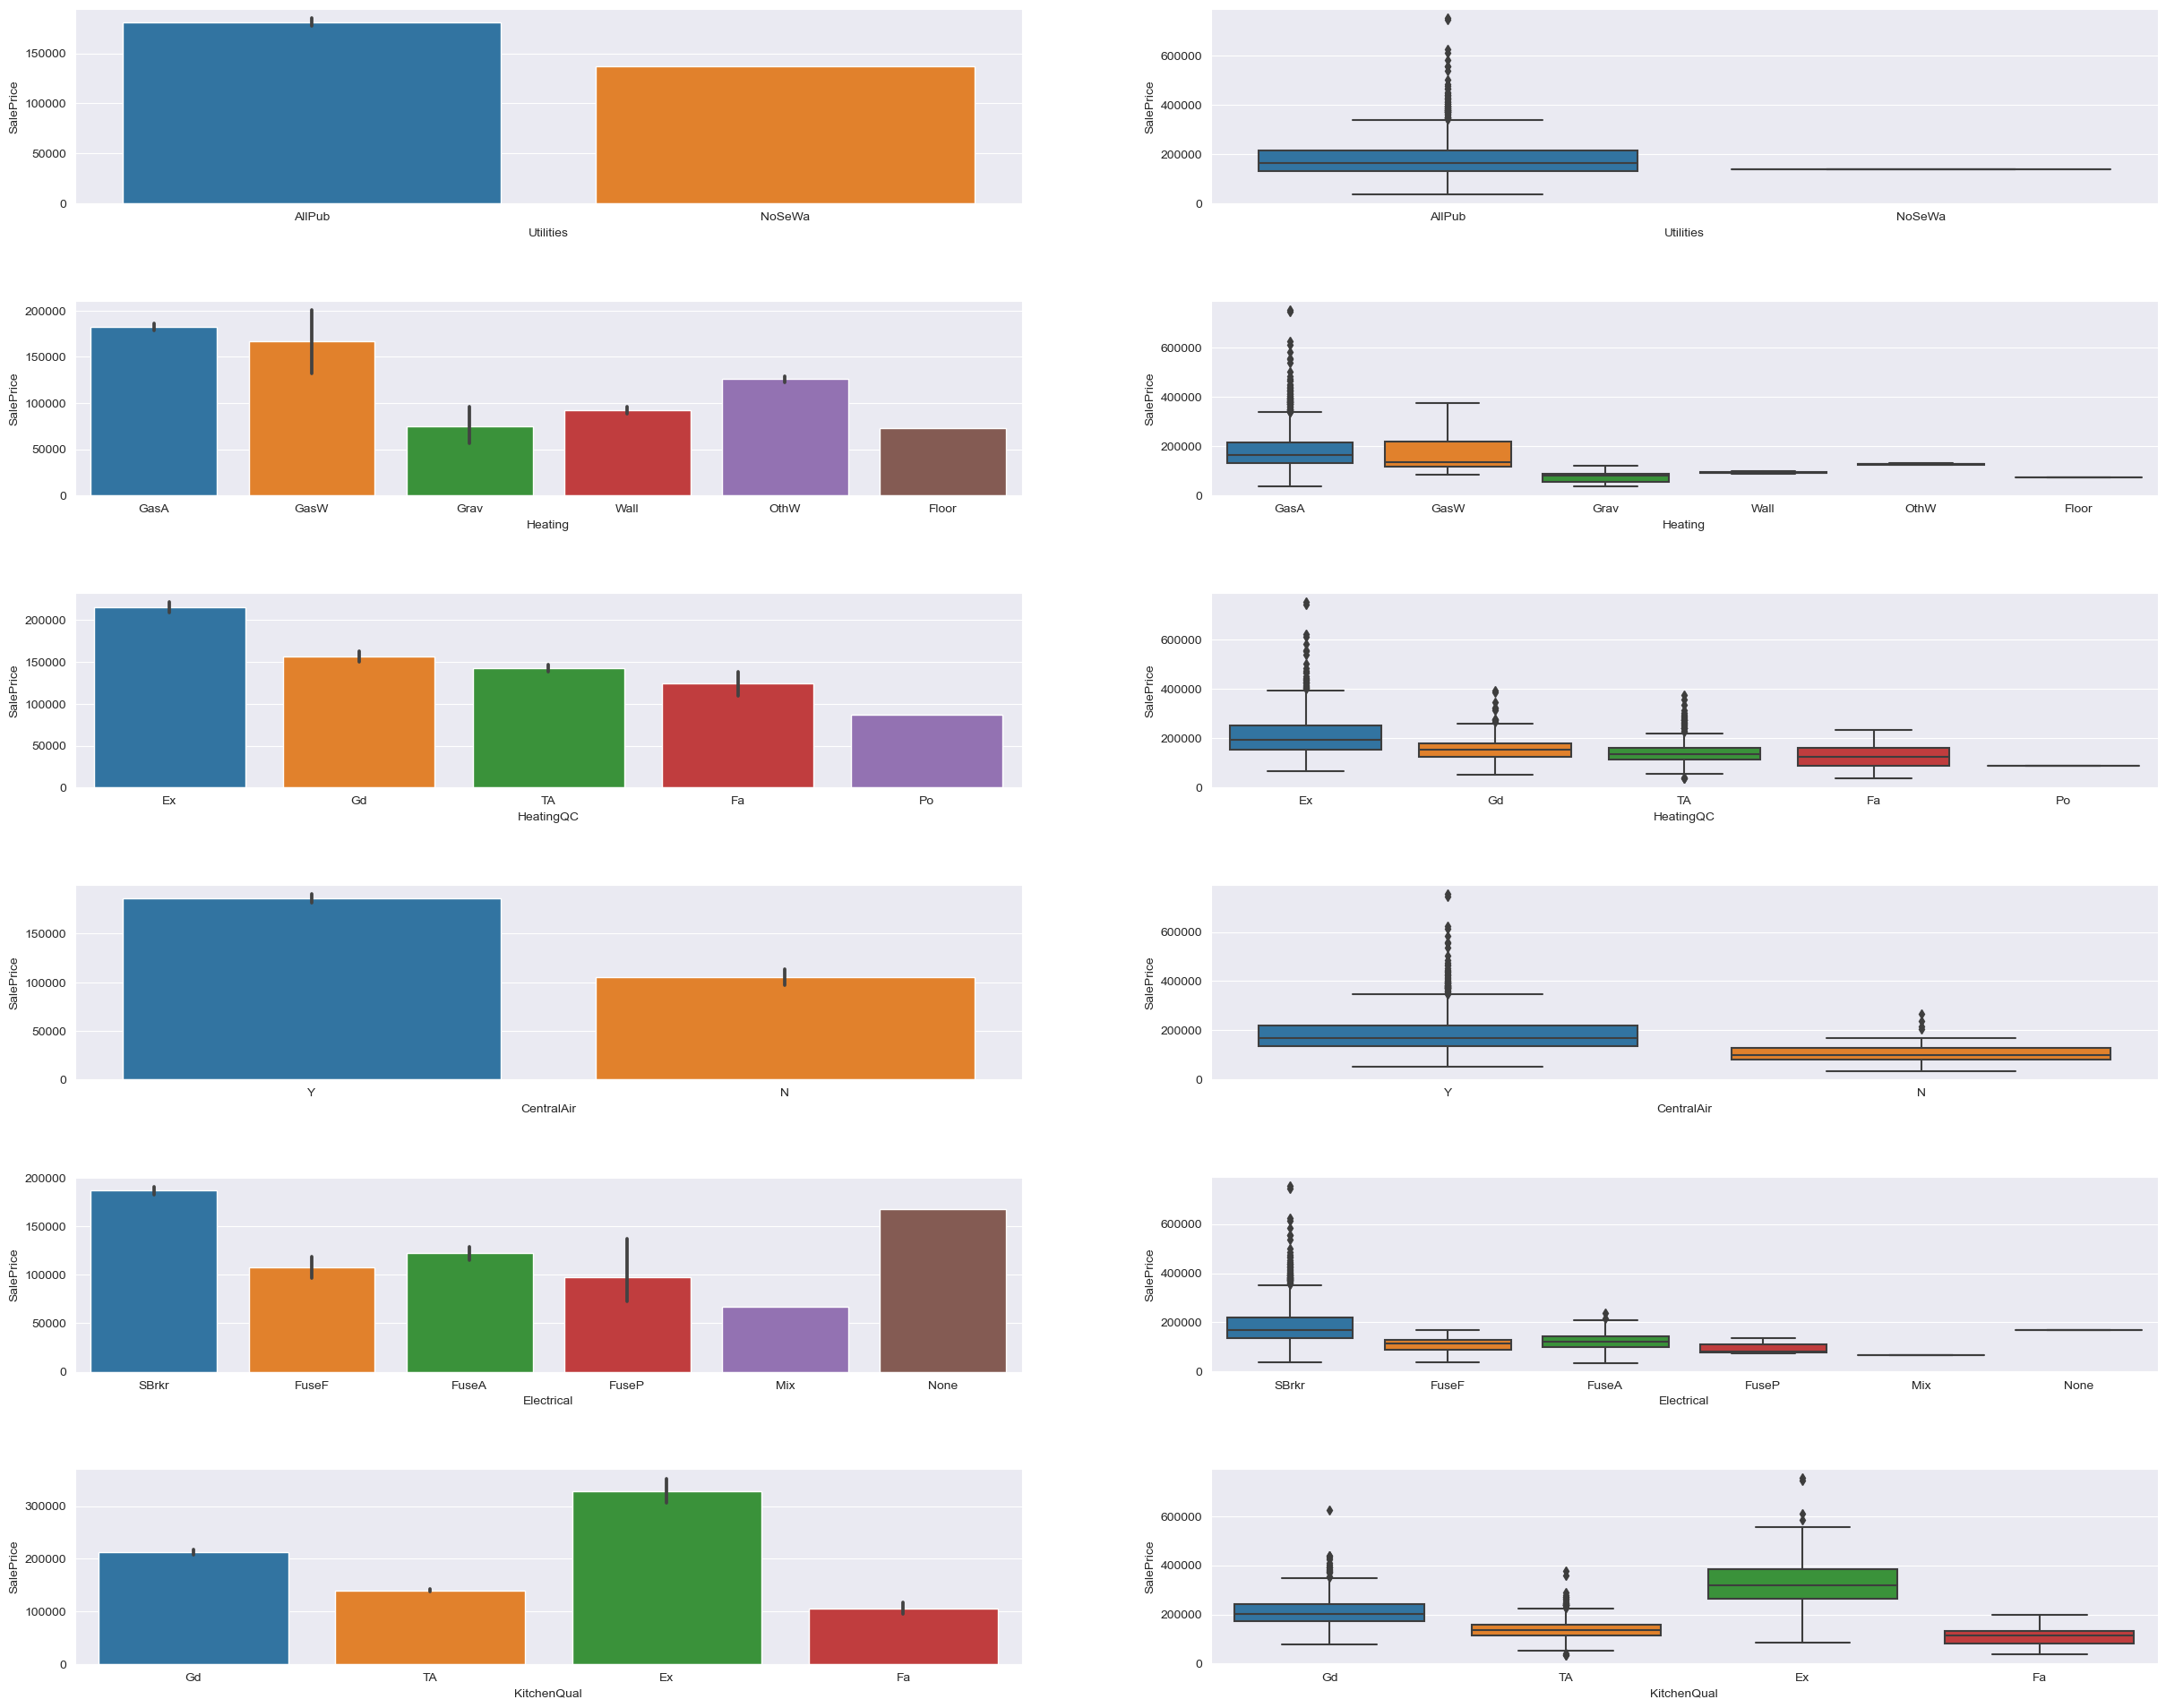

In [67]:
# House Utilities and Interiors vs. SalePrice
plt.subplots(figsize=(30,24))
i=0
for col in Util_Interiors :
    i=i+1
    plt.subplot(6,2,i)
    plt.subplots_adjust(hspace=0.5)
    sns.barplot(Housing_df[col], Housing_df['SalePrice'])
    i=i+1
    plt.subplot(6,2,i)
    plt.subplots_adjust(hspace=0.5)
    sns.boxplot(Housing_df[col], Housing_df['SalePrice'])

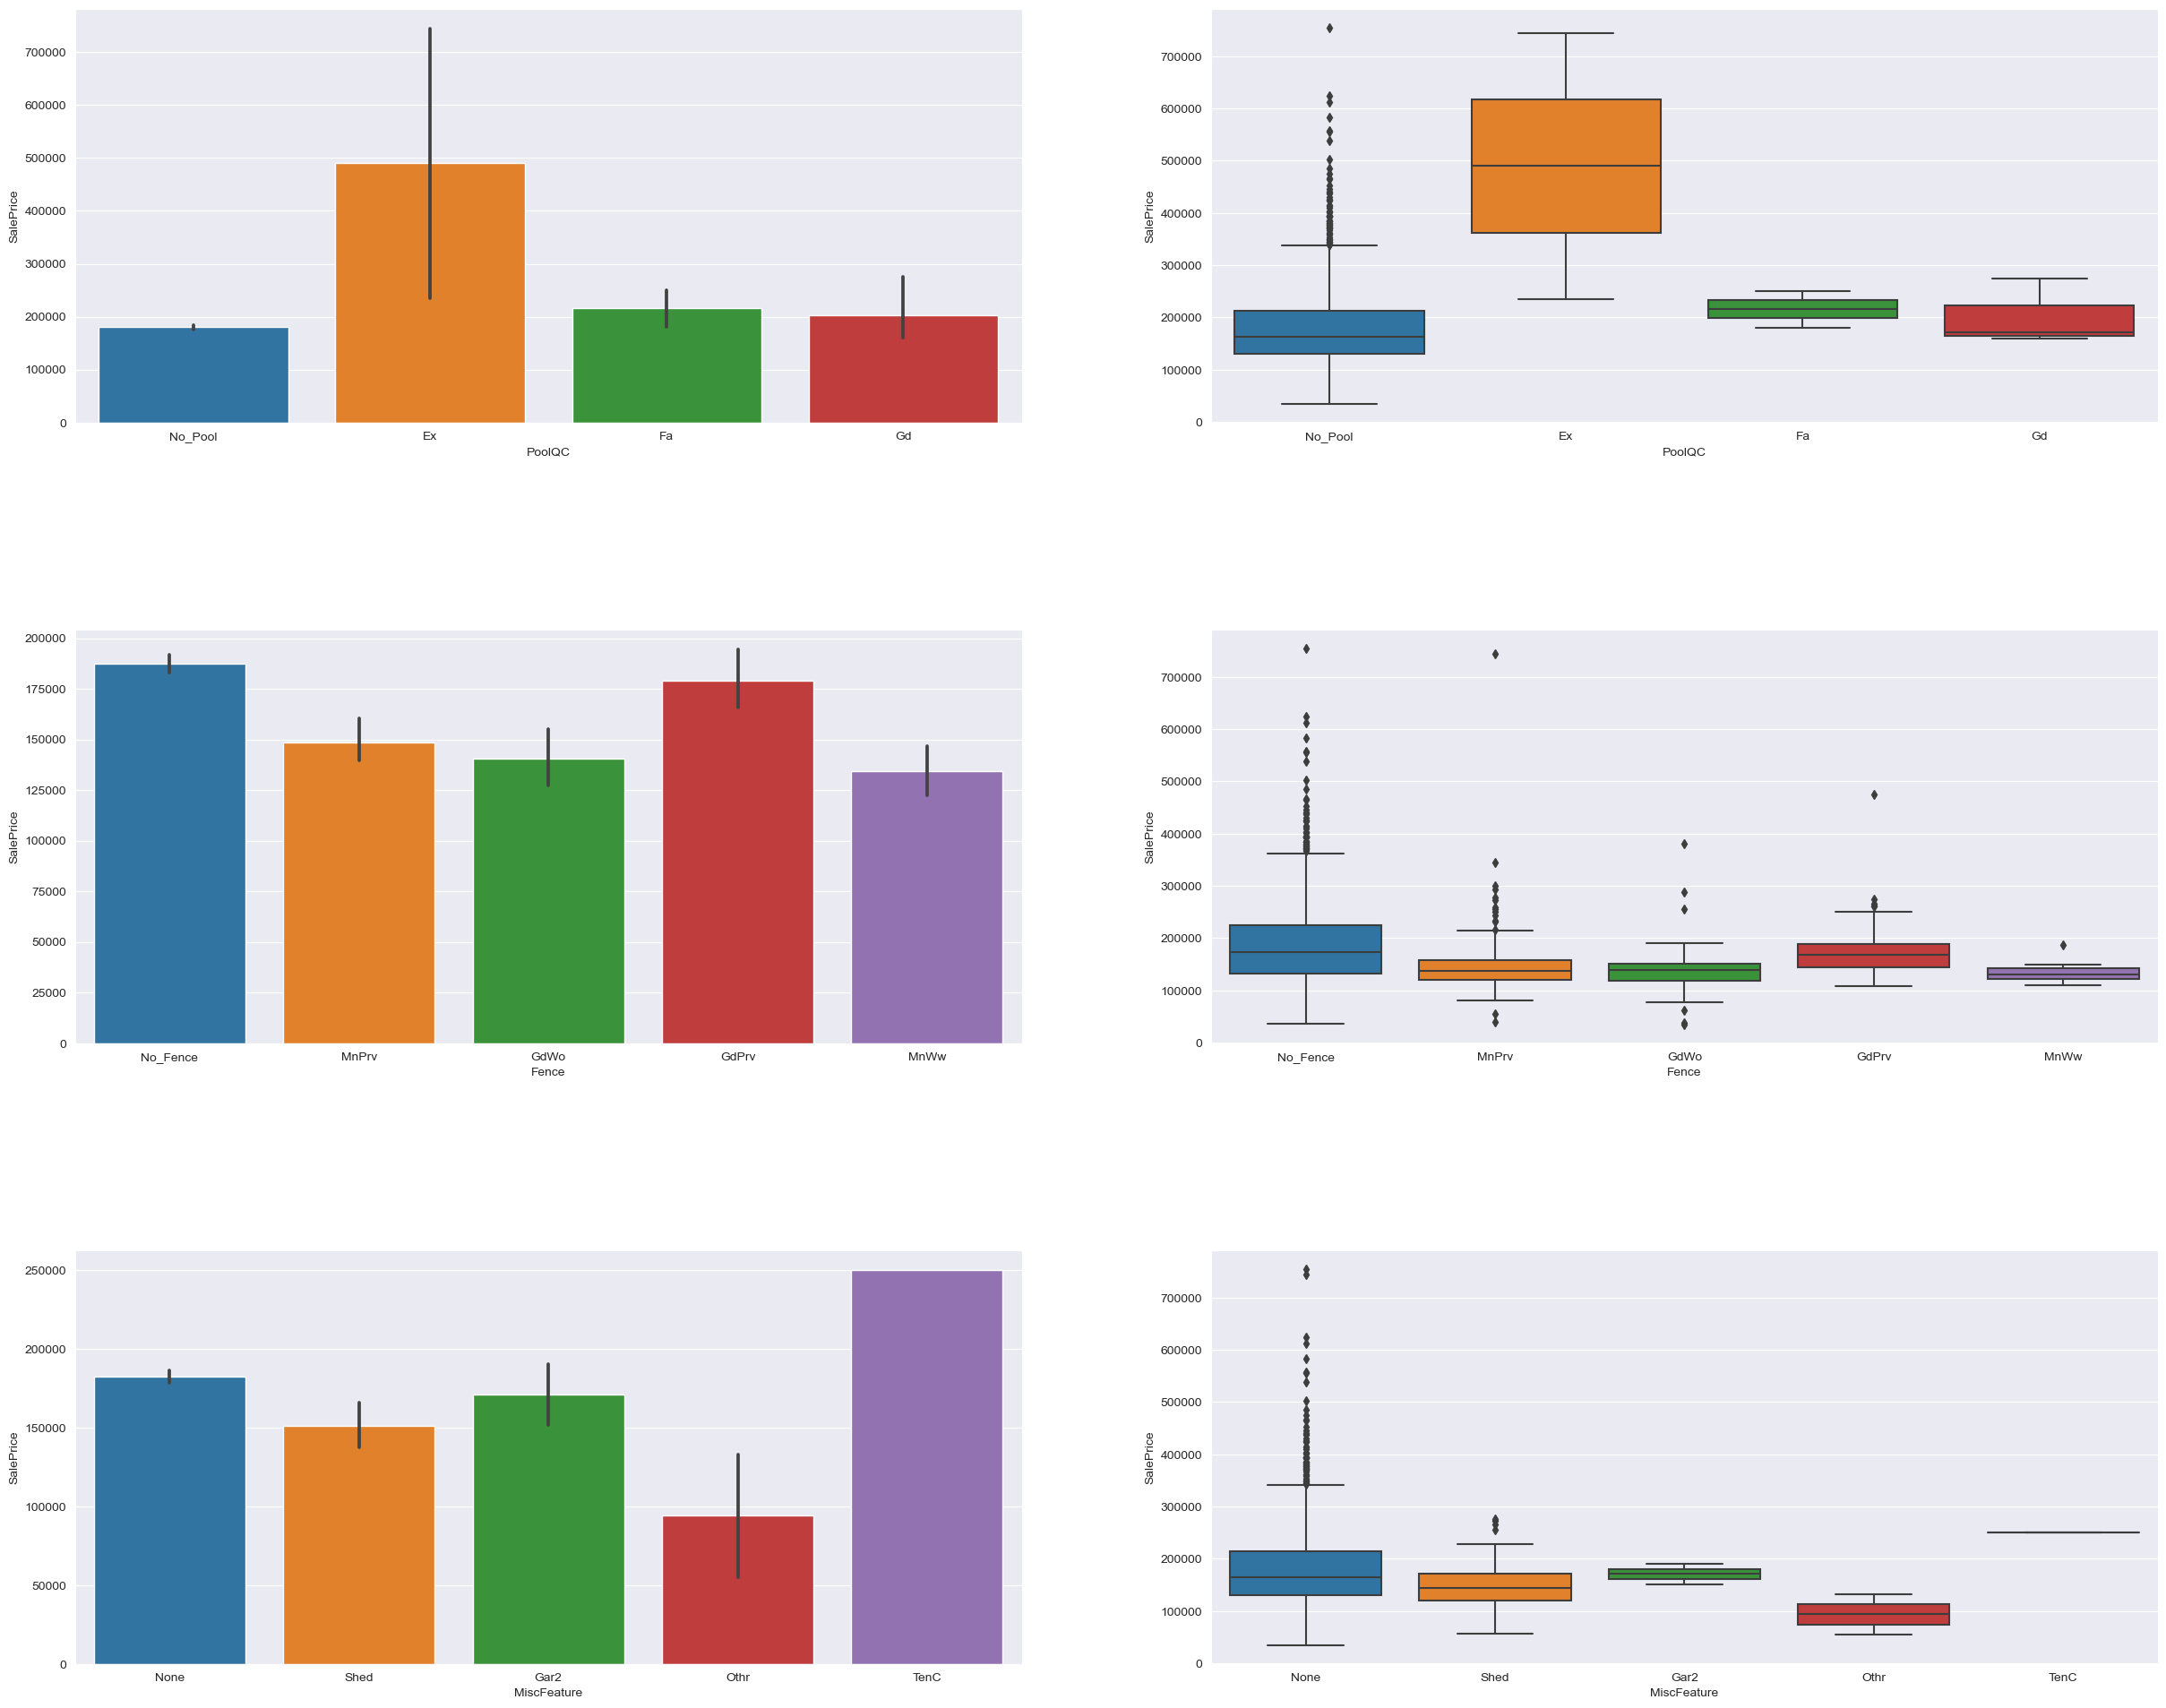

In [68]:
# House Miscelleanous Features vs. SalePrice
plt.subplots(figsize=(30,24))
i=0
for col in Misc_Features :
    i=i+1
    plt.subplot(3,2,i)
    plt.subplots_adjust(hspace=0.5)
    sns.barplot(Housing_df[col], Housing_df['SalePrice'])
    i=i+1
    plt.subplot(3,2,i)
    plt.subplots_adjust(hspace=0.5)
    sns.boxplot(Housing_df[col], Housing_df['SalePrice'])

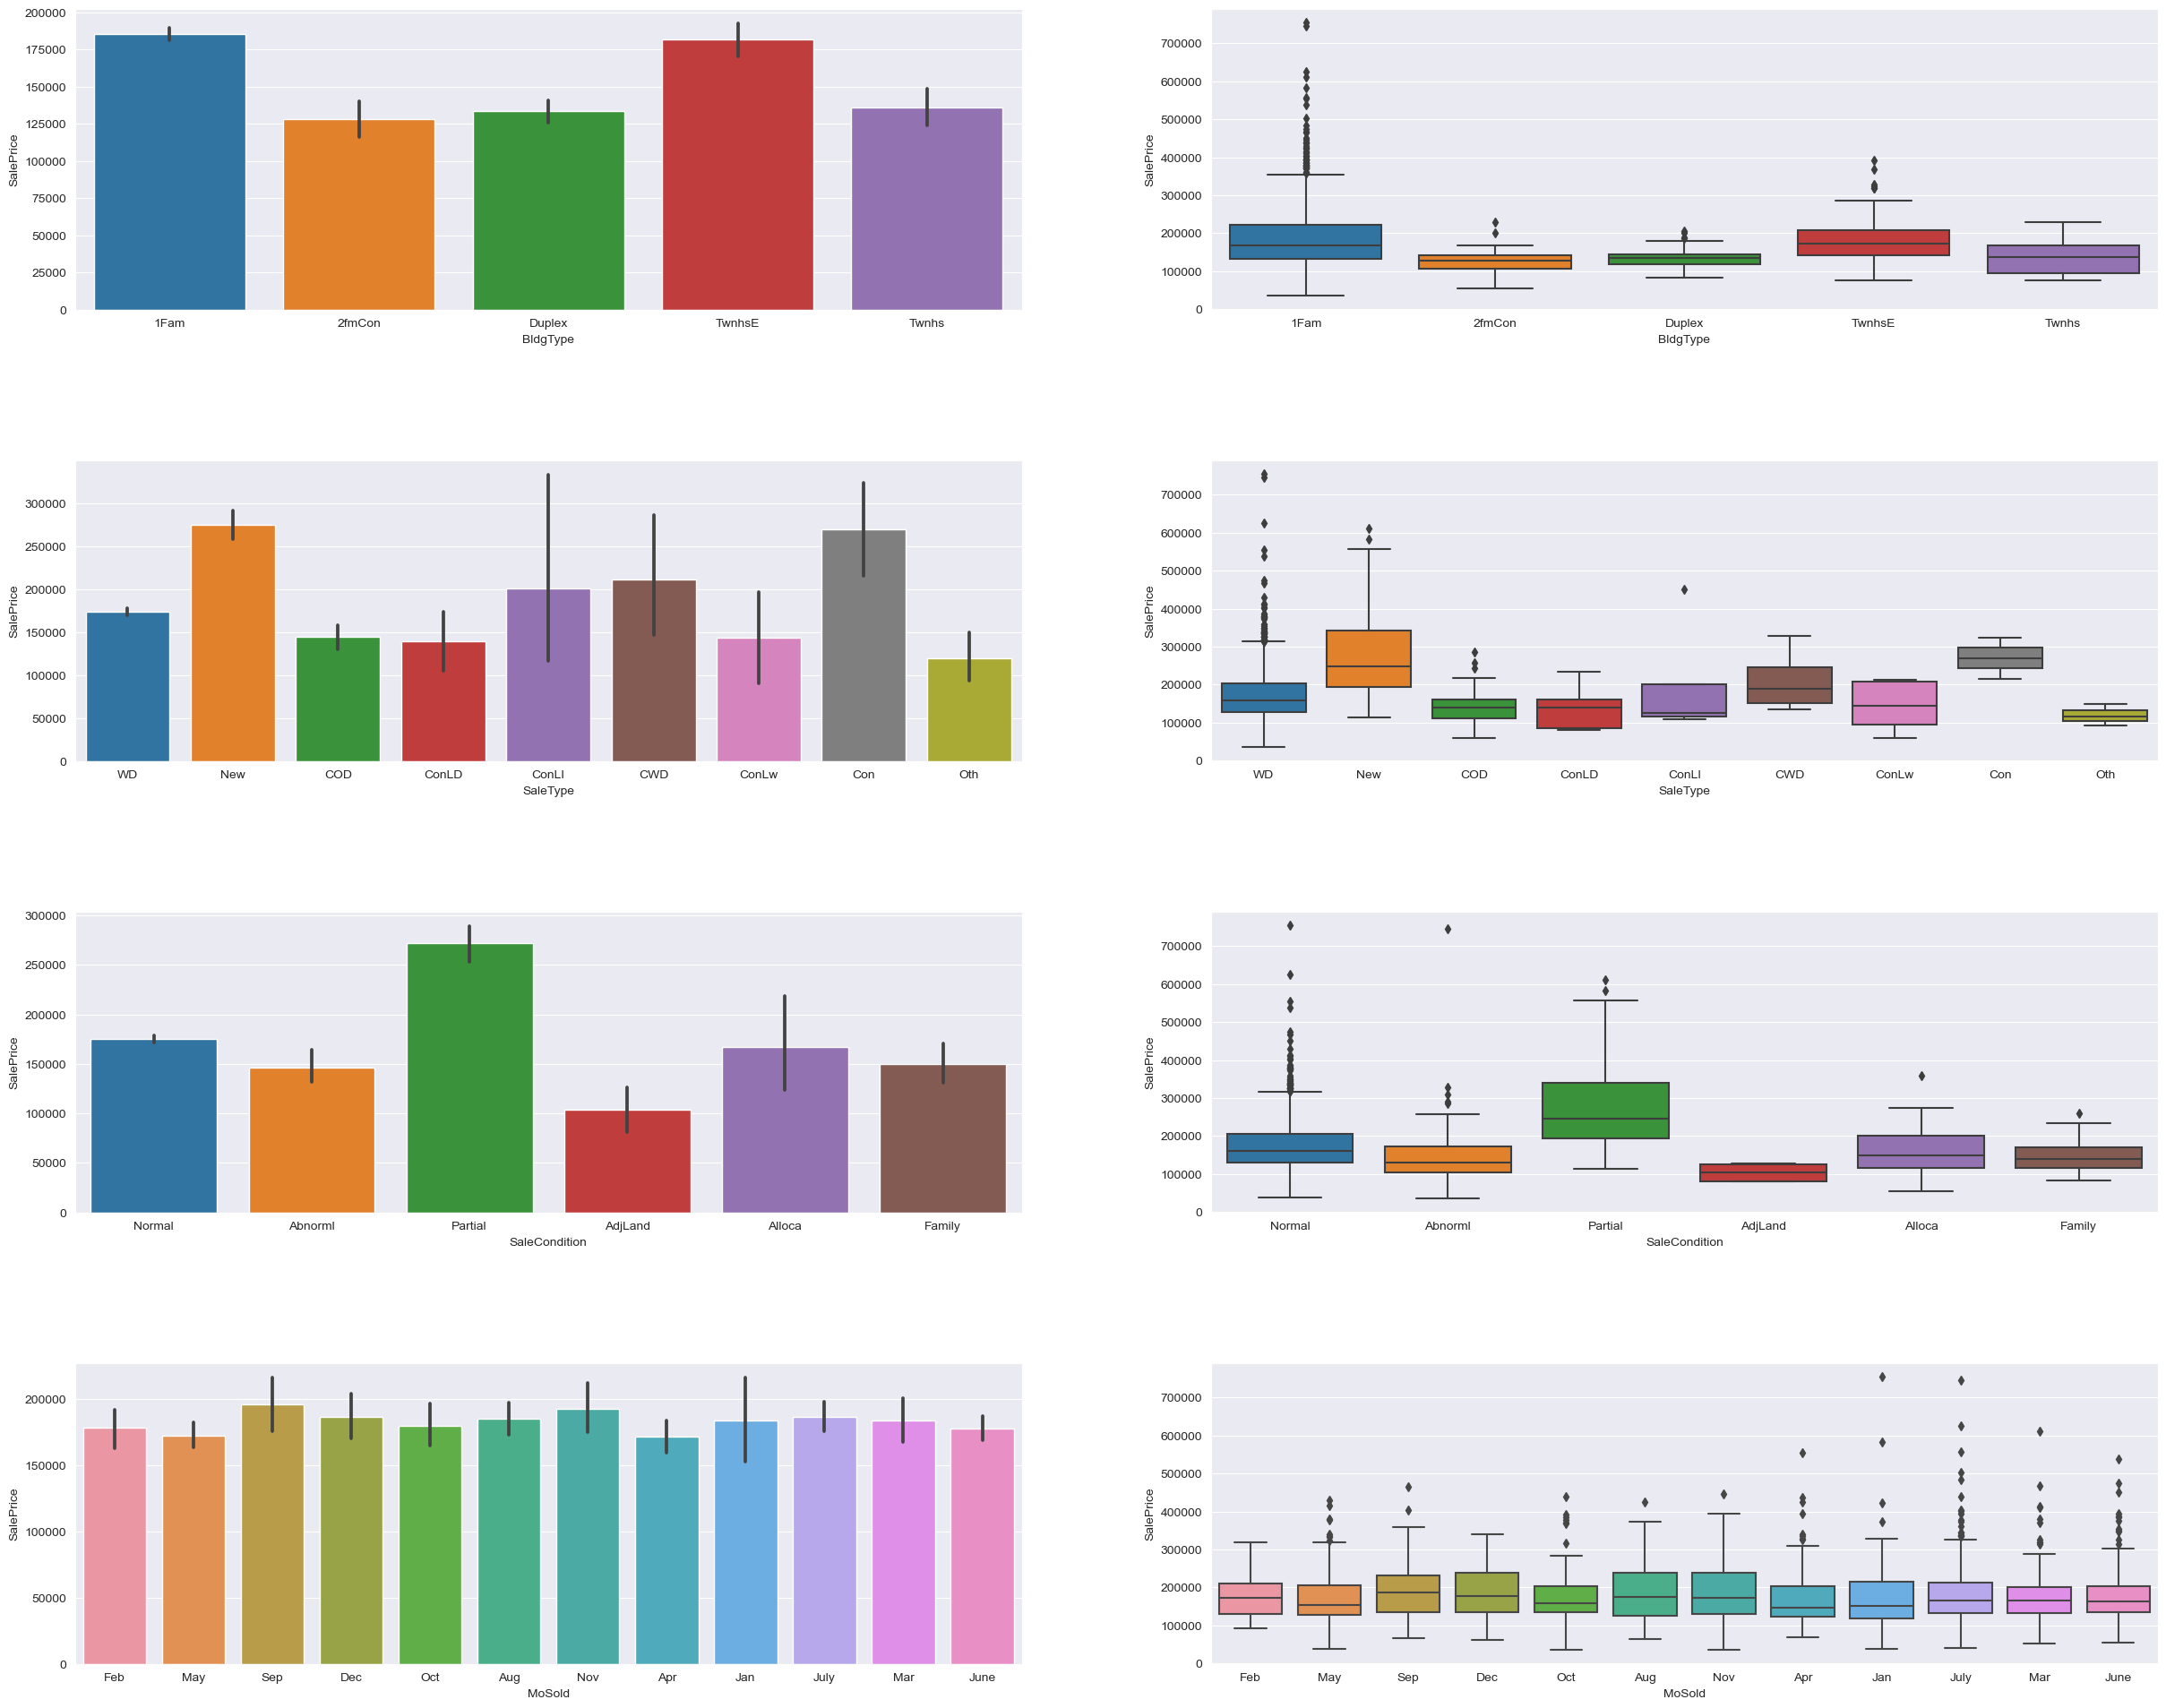

In [69]:
# House Sale Type vs. SalePrice
plt.subplots(figsize=(30,24))
i=0
for col in Sale :
    i=i+1
    plt.subplot(4,2,i)
    plt.subplots_adjust(hspace=0.5)
    sns.barplot(Housing_df[col], Housing_df['SalePrice'])
    i=i+1
    plt.subplot(4,2,i)
    plt.subplots_adjust(hspace=0.5)
    sns.boxplot(Housing_df[col], Housing_df['SalePrice'])

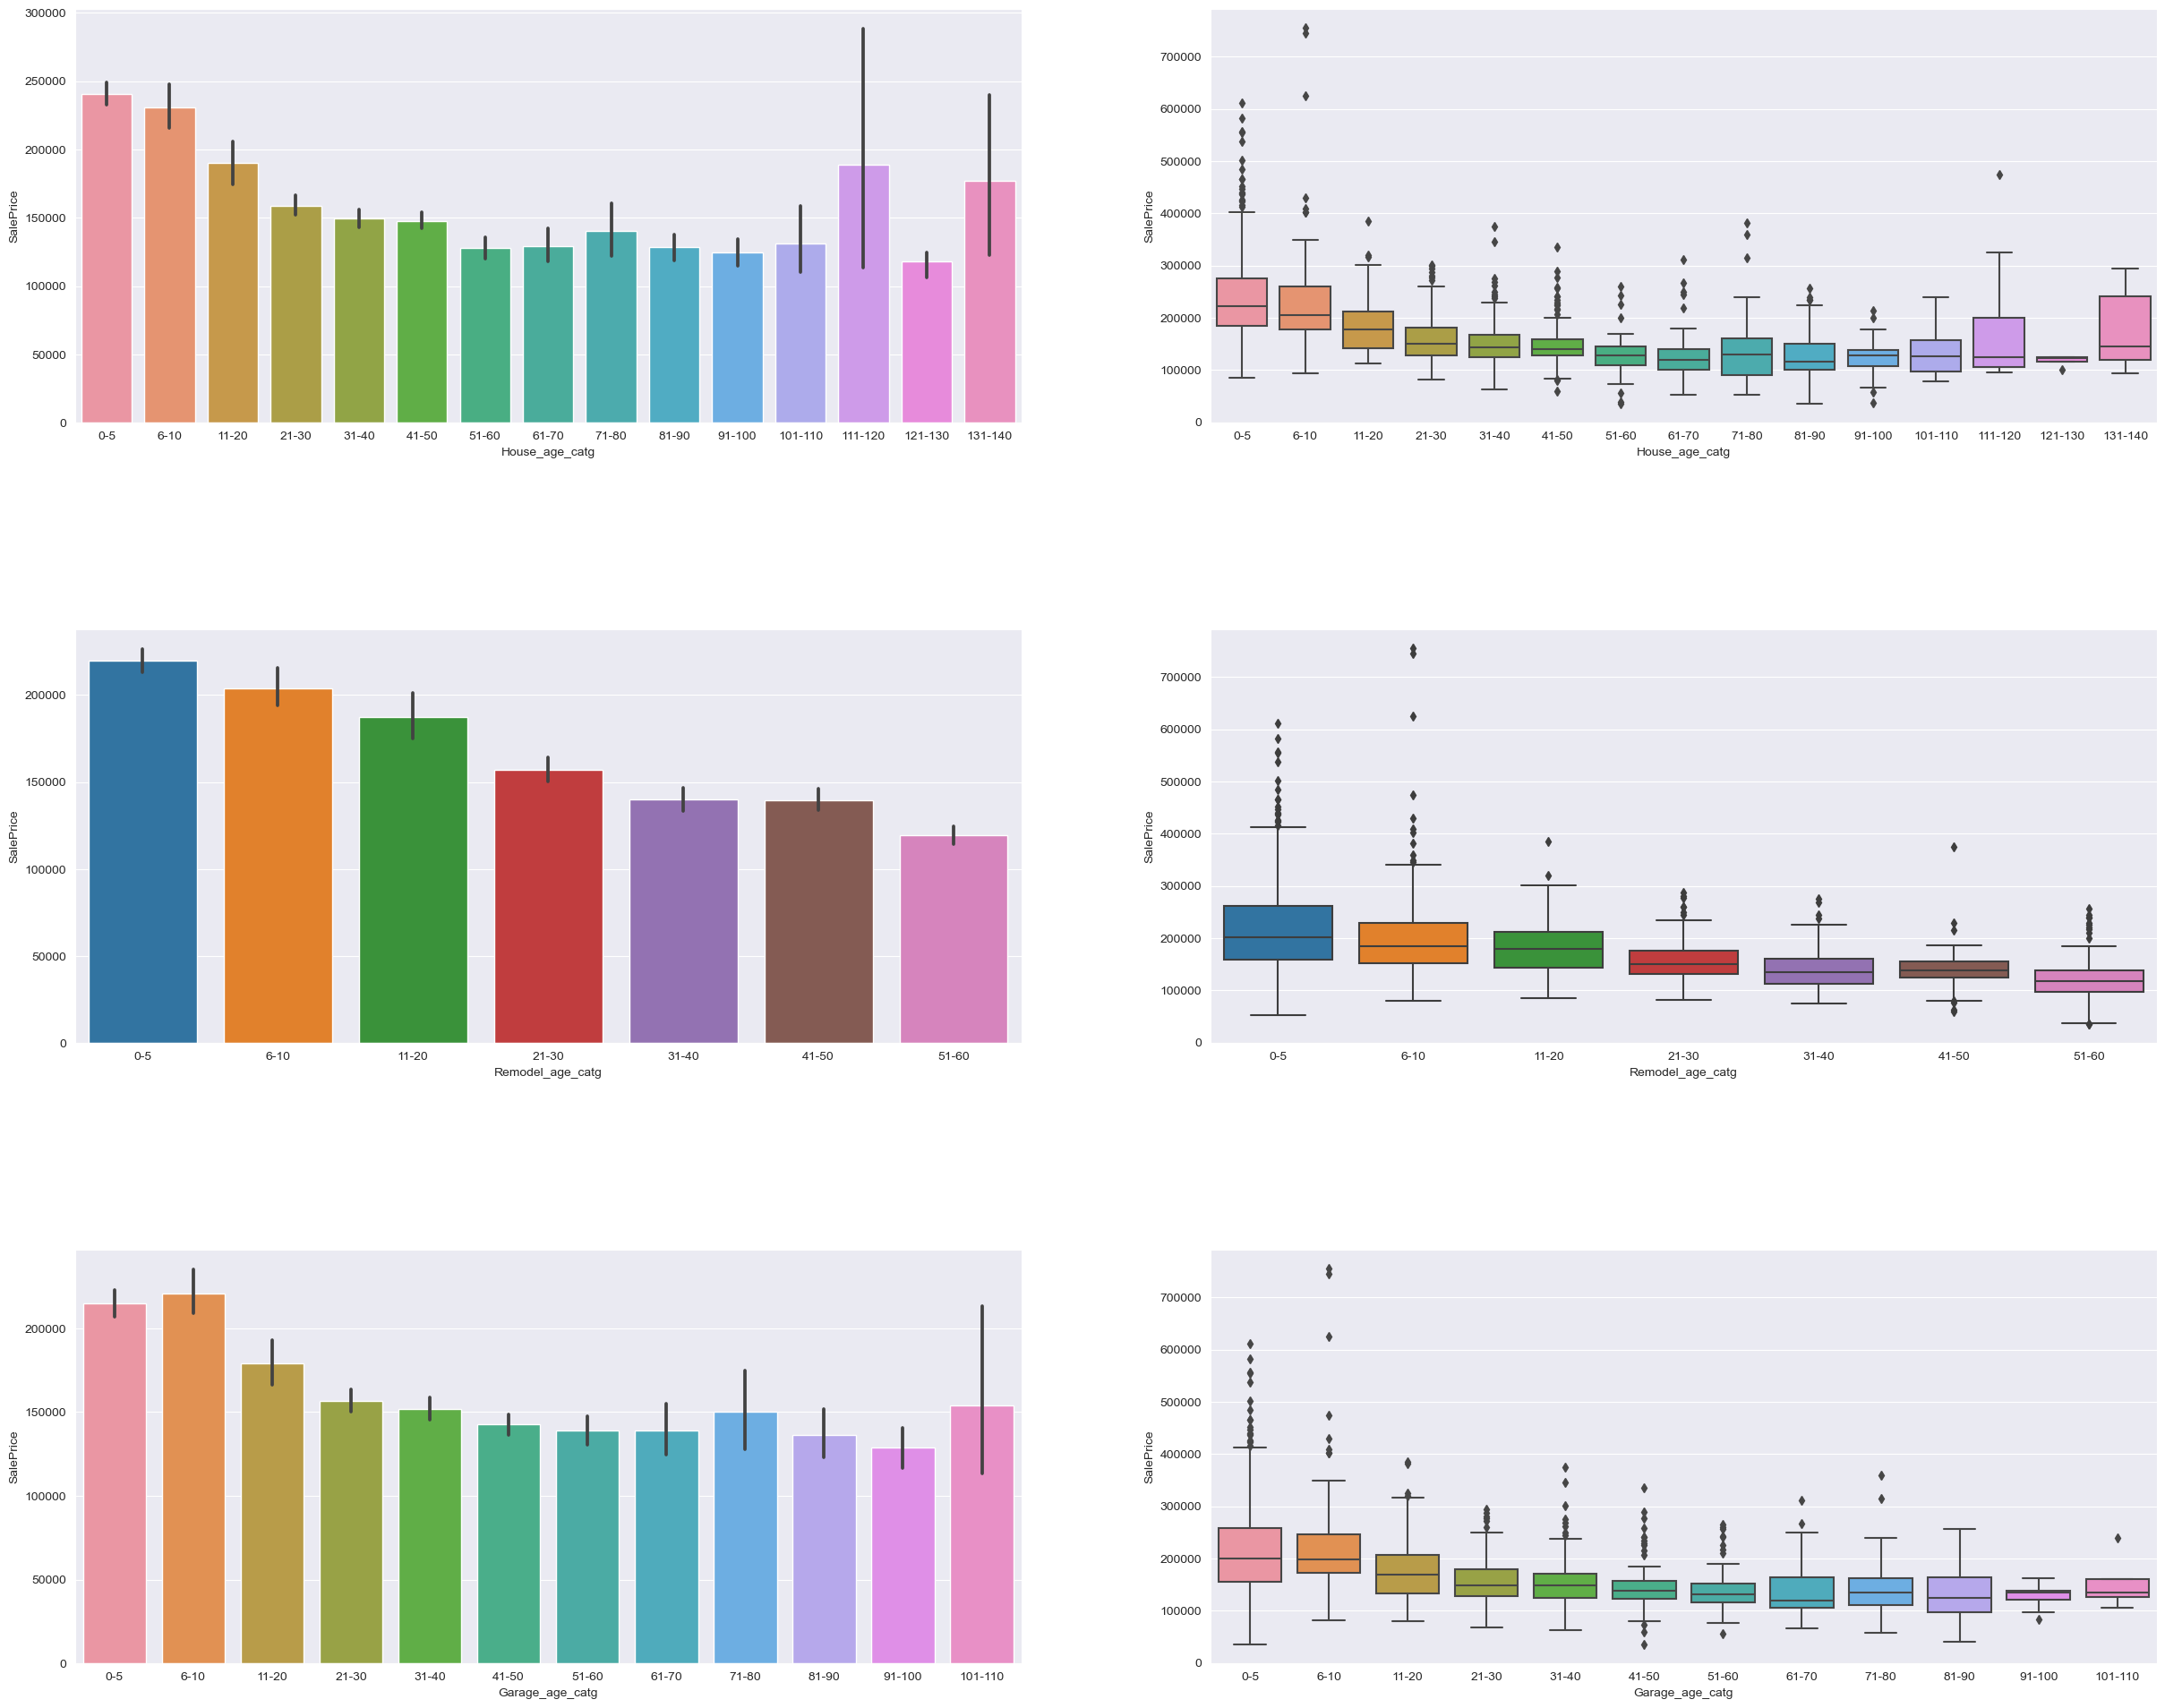

In [70]:
# House Housing Age vs. SalePrice
plt.subplots(figsize=(30,24))
i=0
for col in Age :
    i=i+1
    plt.subplot(3,2,i)
    plt.subplots_adjust(hspace=0.5)
    sns.barplot(Housing_df[col], Housing_df['SalePrice'])
    i=i+1
    plt.subplot(3,2,i)
    plt.subplots_adjust(hspace=0.5)
    sns.boxplot(Housing_df[col], Housing_df['SalePrice'])

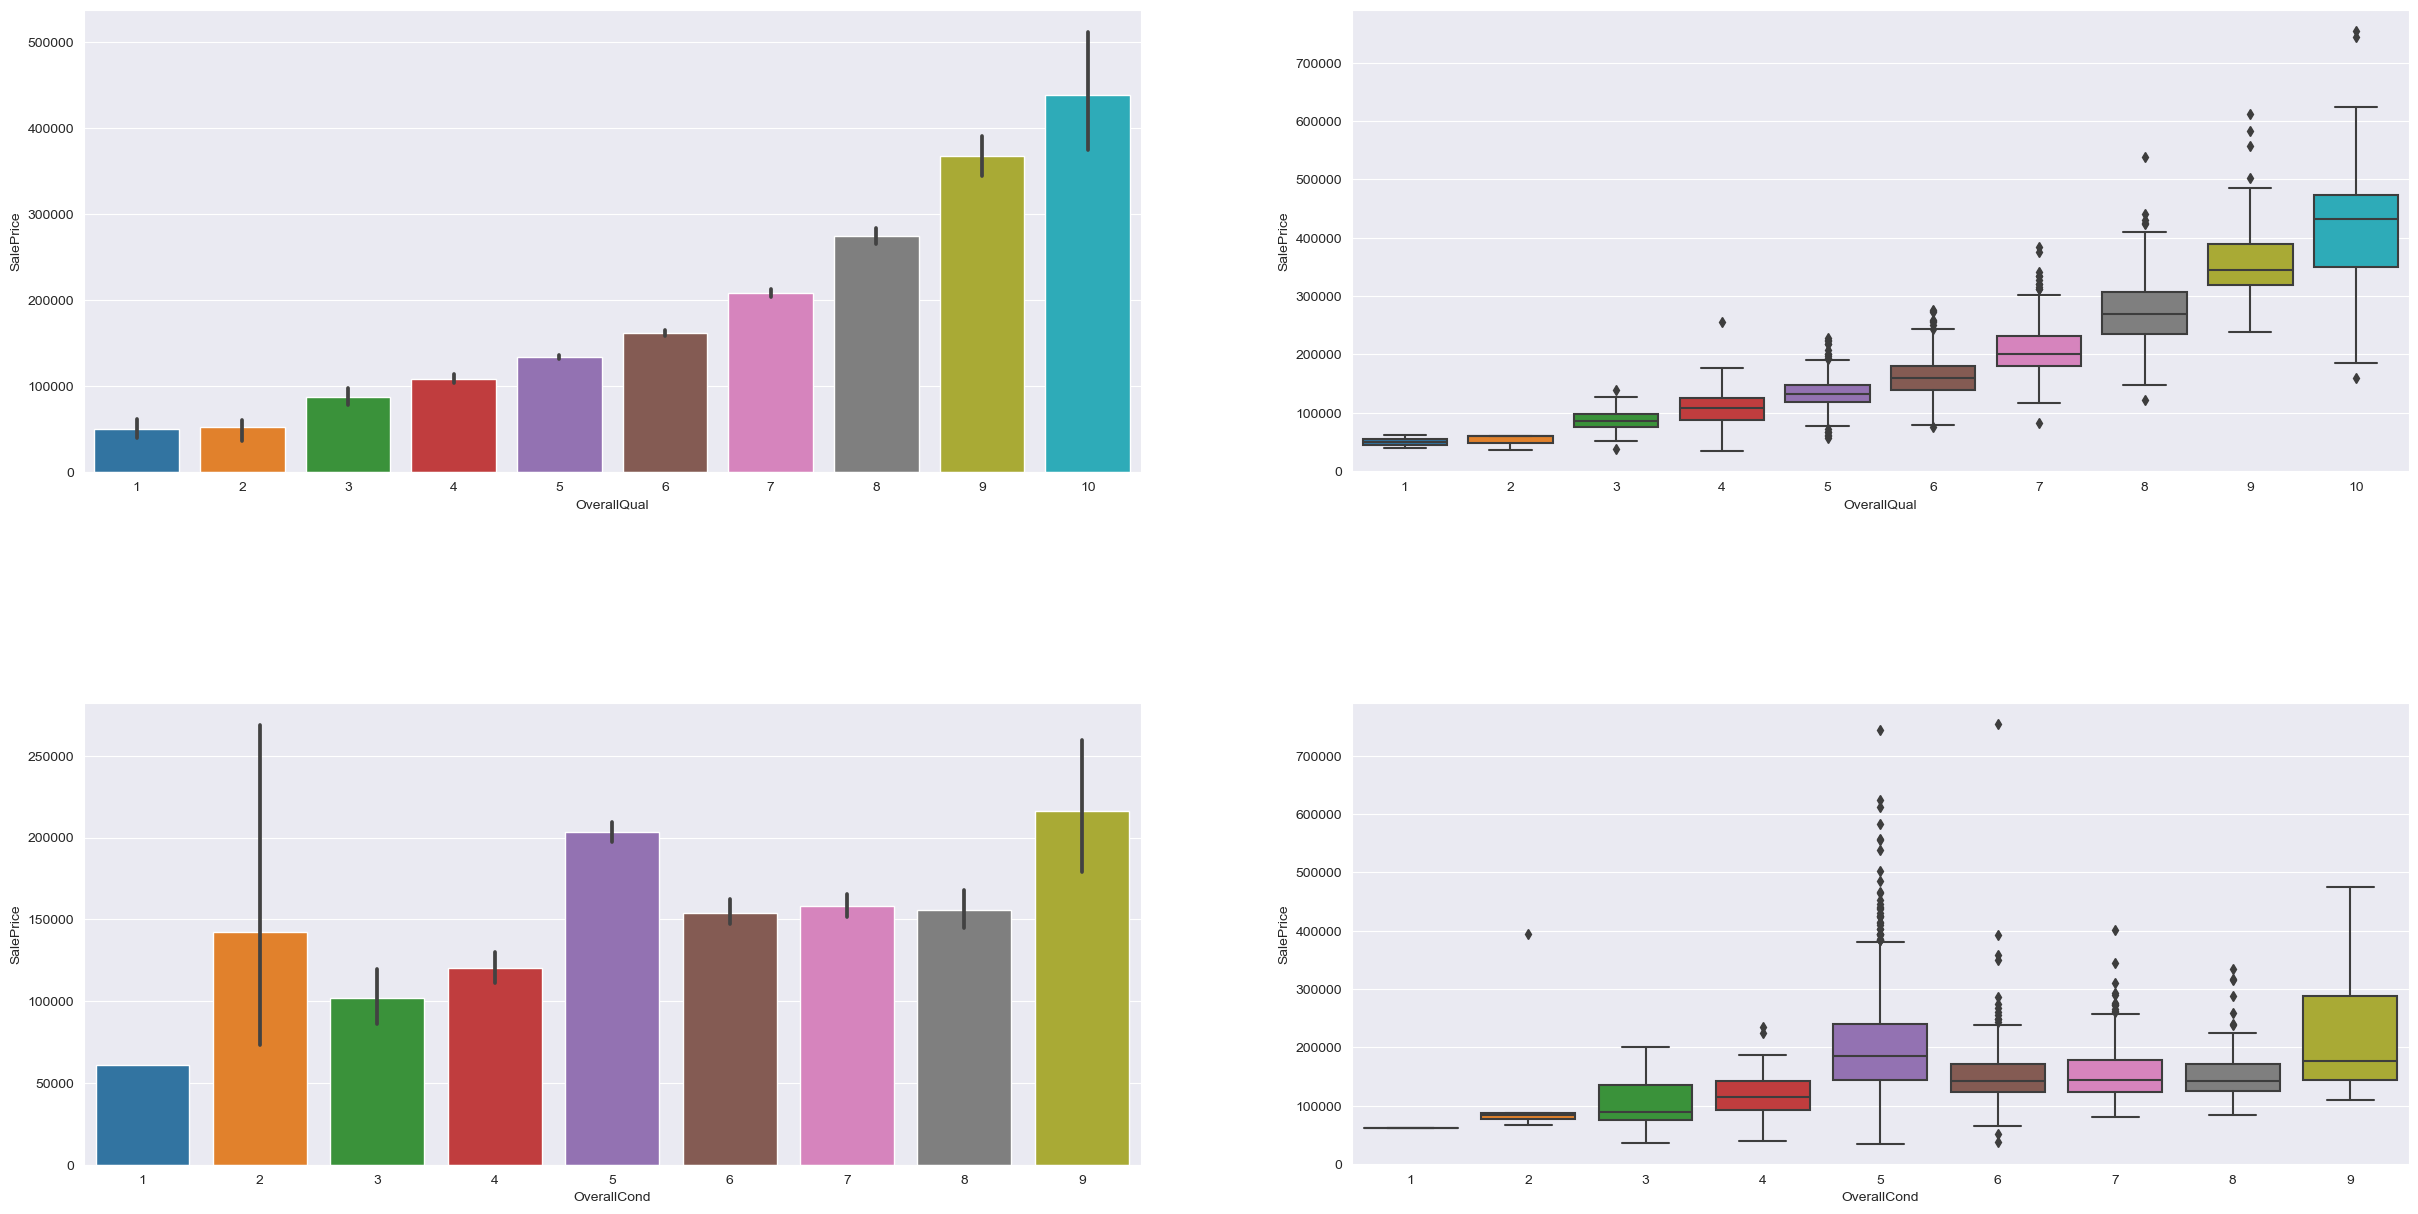

In [71]:
# House Housing Age vs. SalePrice
plt.subplots(figsize=(30,24))
i=0
for col in Condition_rating :
    i=i+1
    plt.subplot(3,2,i)
    plt.subplots_adjust(hspace=0.5)
    sns.barplot(Housing_df[col], Housing_df['SalePrice'])
    i=i+1
    plt.subplot(3,2,i)
    plt.subplots_adjust(hspace=0.5)
    sns.boxplot(Housing_df[col], Housing_df['SalePrice'])

##### Observation:
- While Value Count Plots provided the Count of Sales for each category variables, the Bar / Box plots for Categorical Variables and SalePrice provided the visibility on the which type of category has fetched higher sales price.
- ###### Noticed that though the sales for certain Categorical Variables is high, they are not the ones fetching higher Sales Price. E.g.
    - LotShape: General shape of property
        - Lot Shape - Reg, IR1 : Houses with Regular and Slightly regular shape are higher in sales.
        - Lot Shape - IR2 : Houses with Moderatly Irregular shape have fetched higher Sale Price.
###### This is noticed across several Categorical Variables. Hence, we can deduce that Categorical Variables have diverse relationship with our target variable SalePrice.
    

# Data Preparation for Modelling

#### Lets Proceed with Hot Coding the Categorical Variables, as we can only scale numerical values.

In [72]:
##  Hot encoding the categorical columns
df_catg_encoded = pd.get_dummies(df_catg, drop_first=True)
df_catg_encoded.head()

MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              1              0              0              0              0   
4              0              0              0              0              0   

   MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0            0            1            0            1   
4            0            0            1            0            1   

   Alley_No_Alley_Access  Alley_Pave  LotShape_IR2  LotShape_IR3  \
0                      1           0             0             0   
1                      1           0             0             0   
2                      1           0             0             0   
3                      1           0             0             0   
4                      1           0             0             0   

   LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  \
0             1                0                0                1   
1             1                0                0                1   
2             0                0                0                1   
3             0                0                0                1   
4             0                0                0                1   

   Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0                 0                  0              0              0   
1                 0                  0              1              0   
2                 0                  0              0              0   
3                 0                  0              0              0   
4                 0                  0              1              0   

   LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  \
0                 1              0              0                     0   
1                 0              0              0                     0   
2                 1              0              0                     0   
3                 0              0              0                     0   
4                 0              0              0                     0   

   Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     0                     0   

   Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  \

In [73]:
df_catg_encoded.shape

(1460, 298)

In [74]:
df_catg_encoded.columns

Index(['MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50',
       'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80',
       'MSSubClass_85', 'MSSubClass_90',
       ...
       'Garage_age_catg_11-20', 'Garage_age_catg_21-30',
       'Garage_age_catg_31-40', 'Garage_age_catg_41-50',
       'Garage_age_catg_51-60', 'Garage_age_catg_61-70',
       'Garage_age_catg_71-80', 'Garage_age_catg_81-90',
       'Garage_age_catg_91-100', 'Garage_age_catg_101-110'],
      dtype='object', length=298)

#### Data Preparation for Modelling

In [75]:
# Now We concatenate the Numeric Variables (df_numeric) and Encoded Categorical Variables into a Dataframe.
Housing_Model_df = pd.concat([df_numeric, df_catg_encoded], axis=1)
Housing_Model_df.head()

Id  LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
0   1         65.0   8450.0       196.0       706.0      150.0          856   
1   2         80.0   9600.0         0.0       978.0      284.0         1262   
2   3         68.0  11250.0       162.0       486.0      434.0          920   
3   4         60.0   9550.0         0.0       216.0      540.0          756   
4   5         84.0  14260.0       350.0       655.0      490.0         1145   

   1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  \
0     856.0       854     1710.0           1.0         2         1   
1    1262.0         0     1262.0           0.0         2         0   
2     920.0       866     1786.0           1.0         2         1   
3     961.0       756     1717.0           1.0         1         0   
4    1145.0      1053     2198.0           1.0         2         1   

   BedroomAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  \
0           3.0             8         0.0         2.0       548.0           0   
1           3.0             6         1.0         2.0       460.0         298   
2           3.0             6         1.0         2.0       608.0           0   
3           3.0             7         1.0         3.0       642.0           0   
4           4.0             9         1.0         3.0       836.0         192   

   OpenPorchSF  SalePrice  MSSubClass_30  MSSubClass_40  MSSubClass_45  \
0           61  12.247694              0              0              0   
1            0  12.109011              0              0              0   
2           42  12.317167              0              0              0   
3           35  11.849398              0              0              0   
4           84  12.429216              0              0              0   

   MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  \
0              0              1              0              0              0   
1              0              0              0              0              0   
2              0              1              0              0              0   
3              0              0              1              0              0   
4              0              1              0              0              0   

   MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  \
0              0              0               0               0   
1              0              0               0               0   
2              0              0               0               0   
3              0              0               0               0   
4              0              0               0               0   

   MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
0               0               0            0            0            1   
1               0               0            0            0            1   
2               0               0            0            0            1   
3               0               0            0            0            1   
4               0               0            0            0            1   

   MSZoning_RM  Street_Pave  Alley_No_Alley_Access  Alley_Pave  LotShape_IR2  \
0            0            1                      1           0             0   
1            0            1                      1           0             0   
2            0            1                      1           0             0   
3            0            1                      1           0             0   
4            0            1                      1           0             0   

   LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             1                0                0   
1             0             1                0                0   
2             0             0                0                0   
3             0             0                0                0   
4             0   

In [76]:
Housing_Model_df.shape

(1460, 319)

In [77]:
Housing_Model_df.columns

Index(['Id', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       ...
       'Garage_age_catg_11-20', 'Garage_age_catg_21-30',
       'Garage_age_catg_31-40', 'Garage_age_catg_41-50',
       'Garage_age_catg_51-60', 'Garage_age_catg_61-70',
       'Garage_age_catg_71-80', 'Garage_age_catg_81-90',
       'Garage_age_catg_91-100', 'Garage_age_catg_101-110'],
      dtype='object', length=319)

#### Split Data into Train and Test

In [78]:
# Split the data into Train and Test
np.random.seed(0)
df_train, df_test = train_test_split(Housing_Model_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [79]:
print(df_train.shape)
print(df_test.shape)

(1021, 319)
(438, 319)


In [80]:
# Setting up X and y Train and Test Data Sets
y_train = np.log(df_train.SalePrice)
X_train = df_train.drop(["Id","SalePrice"],axis=1)

y_test= np.log(df_test.SalePrice)
X_test = df_test.drop(["Id","SalePrice"],axis=1)

In [81]:
# Vire the Train and Test Data Set Rows and Columns
print("X Train : ", X_train.shape)
print("y Train : ", y_train.shape)
print("X Test : ", X_test.shape)
print("y Test : ", y_test.shape)

X Train :  (1021, 317)
y Train :  (1021,)
X Test :  (438, 317)
y Test :  (438,)


- y Train and y Test has single column, which is out target variable.

#### Scaling the the Features

In [82]:
# Get Numerical Features from X.
num_values=X_train.select_dtypes(include=['int64','float64']).columns
num_values

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF'],
      dtype='object')

In [83]:
# Instantiate an object
##   Scaling the data
scaler = StandardScaler()
X_train[num_values] = scaler.fit_transform(X_train[num_values])
X_test[num_values] = scaler.transform(X_test[num_values])

# Model Building and Evaluation

#### Linear Regression

In [84]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

###### Lets perform this for all variables.

In [85]:
#Build a linear model
X_train_lm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_lm).fit()
# show coefficients.
lr.params

const                      1.820110
LotFrontage               -0.000220
LotArea                    0.002609
MasVnrArea                 0.000514
BsmtFinSF1                 0.001695
                             ...   
Garage_age_catg_61-70      0.003064
Garage_age_catg_71-80     -0.000276
Garage_age_catg_81-90      0.001487
Garage_age_catg_91-100     0.003115
Garage_age_catg_101-110    0.003372
Length: 318, dtype: float64

In [86]:
# Show Summary of the model
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     61.37
Date:                Sun, 23 Apr 2023   Prob (F-statistic):               0.00
Time:                        19:38:03   Log-Likelihood:                 3705.6
No. Observations:                1021   AIC:                            -6813.
Df Residuals:                     722   BIC:                            -5340.
Df Model:                         298                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

#### Observation :
- Model has an R Squared and Adjusted R-squared values seem to be pretty good.

###### Lets predict the Target Variable for Train and Test Data sets and compare the R2 Square, RSS and MSE values. 

In [87]:
# Run Prediction for Train and Test
y_pred_train_lr = lm.predict(X_train)
y_pred_test_lr = lm.predict(X_test)


In [88]:
# Check and Compare the R2 Squared, RSS and MSE values for Train and Test
metric = []
r2_train_lr = r2_score(y_train, y_pred_train_lr)
print("Train - R2 Score : ", r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test_lr)
print("Test - R2 Score : ", r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train_lr))
print("Train - Residual Sum of Squares : ", rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test_lr))
print("Test - Residual Sum of Squares : ", rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train_lr)
print("Train - Mean Squared Error : ", mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test_lr)
print("Test - Mean Squared Error : ", mse_test_lr)
metric.append(mse_test_lr**0.5)

Train - R2 Score :  0.9620191866475738
Test - R2 Score :  -1.3614597816310038e+17
Train - Residual Sum of Squares :  0.04208581062063571
Test - Residual Sum of Squares :  6.804596770980363e+16
Train - Mean Squared Error :  4.122018669993703e-05
Test - Mean Squared Error :  155356090661652.12


#### Linear Model - Visualization

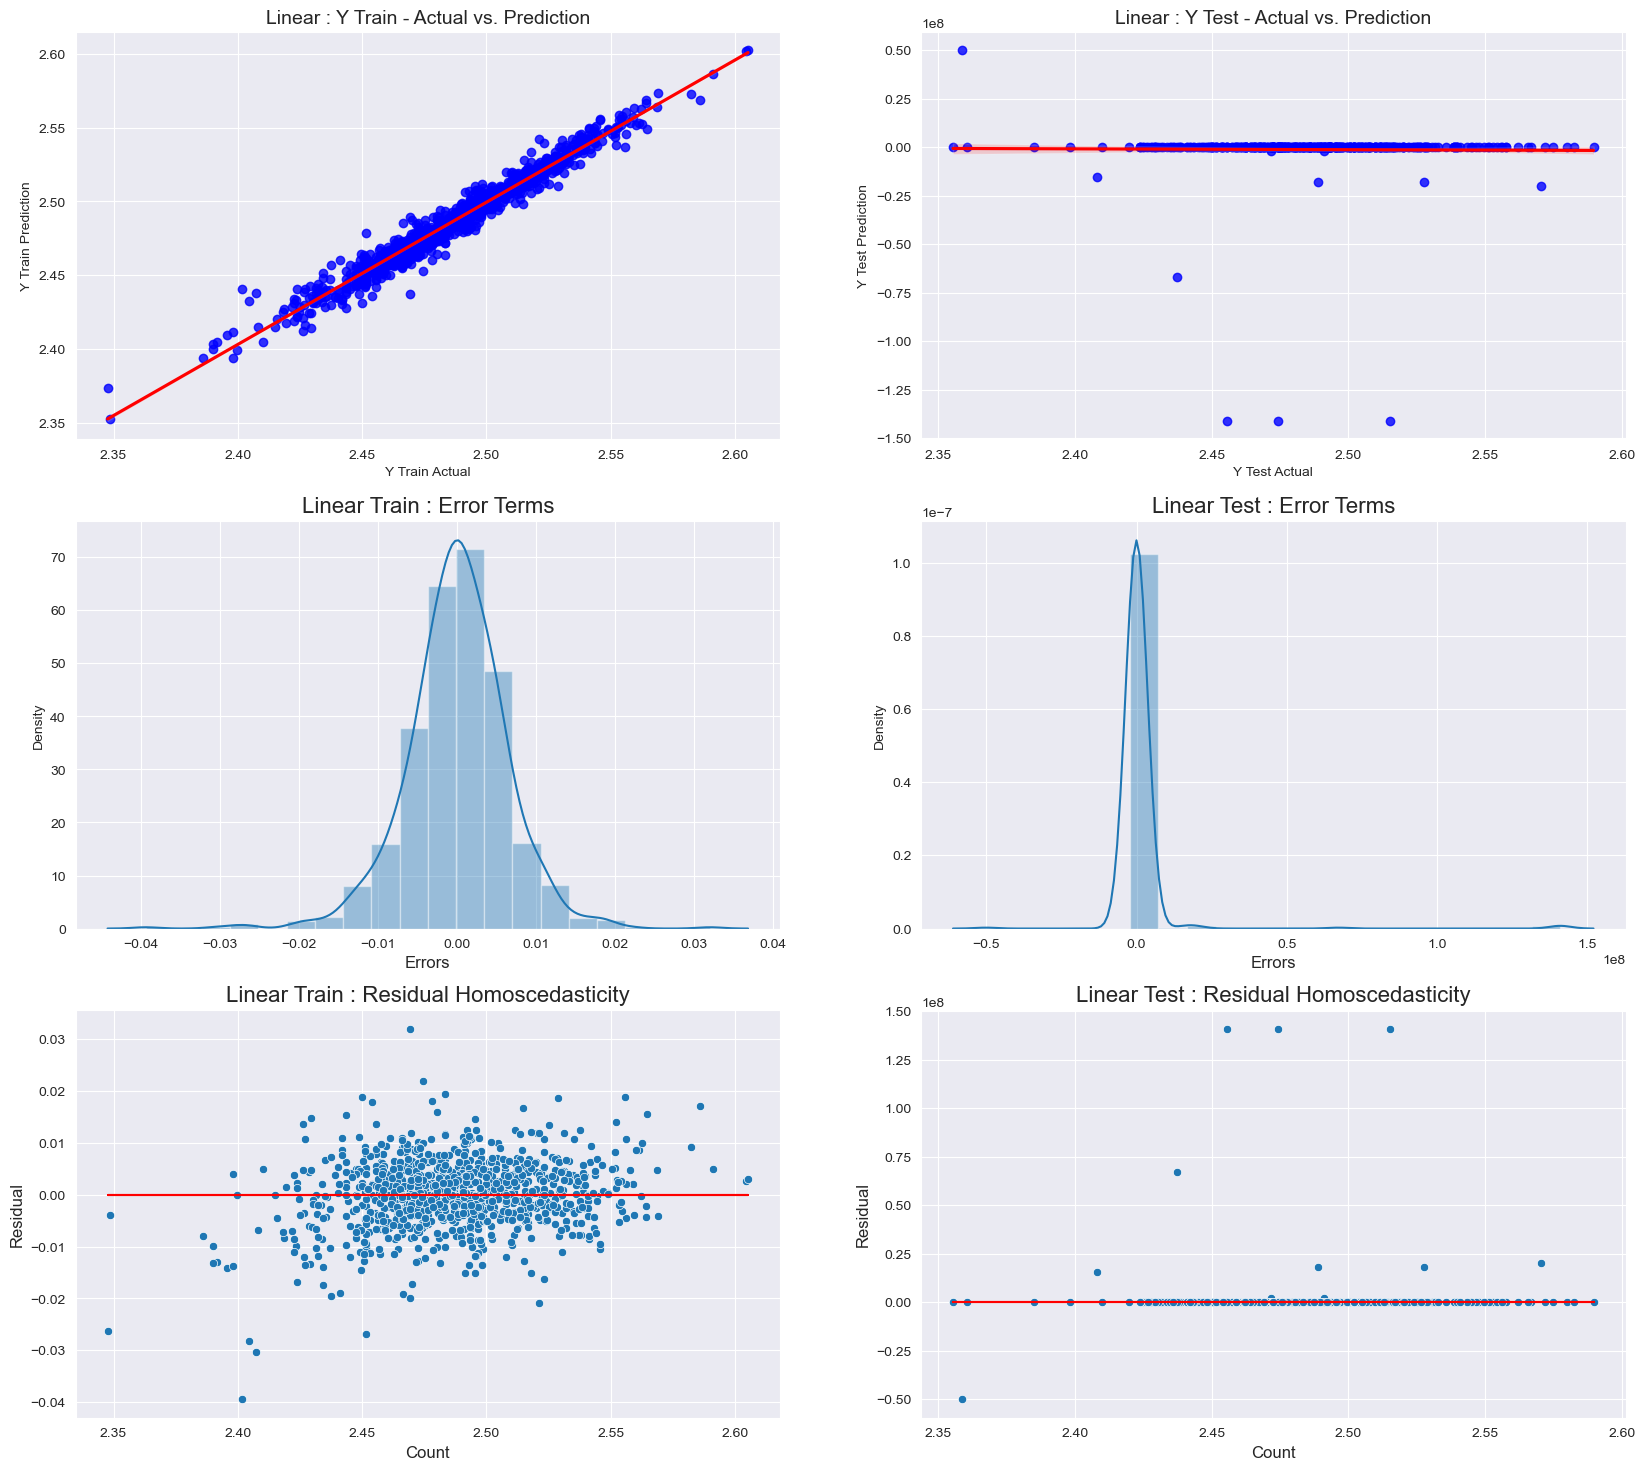

In [89]:
# Linear - y-Predicted vs. y-Actual Values plot
#plt.subplots(figsize=(19,4))
plt.subplots(figsize=(20,18))
plt.subplot(3,2,1)
sns.regplot(x=y_train, y=y_pred_train_lr, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('Linear : Y Train - Actual vs. Prediction', fontsize=14)
plt.xlabel('Y Train Actual', fontsize=10)
plt.ylabel('Y Train Prediction', fontsize=10)

plt.subplot(3,2,2)
sns.regplot(x=y_test, y=y_pred_test_lr, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('Linear : Y Test - Actual vs. Prediction', fontsize=14)
plt.xlabel('Y Test Actual', fontsize=10)
plt.ylabel('Y Test Prediction', fontsize=10)

plt.subplot(3,2,3)
sns.distplot((y_train - y_pred_train_lr), bins = 20)
plt.title('Linear Train : Error Terms', fontsize = 16)                  # Plot heading
plt.axis('tight')
plt.xlabel('Errors', fontsize = 12)                         # X-label

plt.subplot(3,2,4)
sns.distplot((y_test - y_pred_test_lr), bins = 20)
plt.title('Linear Test : Error Terms', fontsize = 16)                  # Plot heading 
plt.axis('tight')
plt.xlabel('Errors', fontsize = 12)                         # X-label

plt.subplot(3,2,5)
residual = y_train - y_pred_train_lr
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.title('Linear Train : Residual Homoscedasticity', fontsize = 16)                  # Plot heading 
plt.xlabel('Count', fontsize = 12)
plt.ylabel('Residual', fontsize = 12)

plt.subplot(3,2,6)
residual = y_test - y_pred_test_lr
sns.scatterplot(y_test,residual)
plt.plot(y_test,(y_test - y_test), '-r')
plt.title('Linear Test : Residual Homoscedasticity', fontsize = 16)                  # Plot heading 
plt.xlabel('Count', fontsize = 12)
plt.ylabel('Residual', fontsize = 12)

plt.show()

#### Observation :
- Thought the R2 Squared Value for Train was approx. 96%, the R2 Squared Value for Test (UnSeen Data) is negative.
- The Mean Squared Error are high.
- Error and Residual Plots for Train show a normal distributon for Train model, but we observe variations (not Normal) for the Test Model

#### Ridge Regression

In [90]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [91]:
## View the results of cross validation search
model_cv.cv_results_

{'mean_fit_time': array([0.008459  , 0.01118326, 0.01593475, 0.01249614, 0.01250076,
        0.01249418, 0.01562018, 0.01249771, 0.01248808, 0.01438503,
        0.01562176, 0.01332321, 0.00624838, 0.01569986, 0.01249704,
        0.00937319, 0.00937333, 0.0124959 , 0.0124958 , 0.01249671,
        0.01249704, 0.015623  , 0.00936675, 0.01249681, 0.0125752 ,
        0.01249423, 0.01562142, 0.01249881]),
 'std_fit_time': array([3.14171558e-03, 6.14516587e-03, 3.51897604e-03, 6.24807076e-03,
        6.25040515e-03, 6.24709320e-03, 1.11216581e-06, 6.24885567e-03,
        6.24405743e-03, 8.51104283e-03, 7.62939453e-07, 6.80742851e-03,
        7.65266989e-03, 1.58549538e-04, 6.24852212e-03, 7.65317597e-03,
        7.65329305e-03, 6.24795037e-03, 6.24790238e-03, 6.24835608e-03,
        6.24852195e-03, 2.57933203e-06, 7.64794258e-03, 6.24840262e-03,
        6.29124971e-03, 6.24717399e-03, 1.29713731e-06, 6.24940439e-03]),
 'mean_score_time': array([0.00313673, 0.00312428, 0.00292234, 0.00312505, 

In [92]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 10.0}


- Optimum Values for Ridge Regression is 10, lets apply this and buidl the model.

In [93]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised

ridge = Ridge(alpha=10)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-1.68218142e-04  2.23066170e-03  9.28121195e-05  1.20374348e-03
 -1.14913910e-03  5.28308005e-03  3.06661906e-03  3.88753126e-03
  5.82181541e-03  7.57402577e-04  1.64951623e-03  9.04150778e-04
  9.57642112e-05  1.55599289e-04  6.41372641e-04  1.96140020e-03
  9.95067624e-04  8.14848269e-04  6.43358775e-04 -6.01556409e-03
 -9.85254195e-04 -8.35040935e-05  2.31500936e-04 -7.56276180e-04
  3.87173588e-03  8.18045770e-04 -5.46986510e-04  3.41560413e-04
 -2.05520989e-03  6.23143884e-04 -2.22935790e-03 -2.16008953e-03
 -1.88899123e-03  5.20809769e-03  4.08864886e-03  5.05840875e-03
  1.80334600e-03  2.27123814e-04 -9.32855014e-05  2.06996501e-03
  1.16477374e-03 -2.09369482e-03  8.23690580e-04  3.33443411e-03
  1.21340455e-03  2.48659273e-03 -4.94547301e-04  2.60346168e-03
 -2.31903392e-03 -5.16512415e-05 -4.44666832e-05  8.85822750e-04
  6.82873465e-04  1.75695718e-04 -9.75652733e-04  2.13707744e-03
  3.16534236e-03 -1.55303789e-04  5.77045162e-03 -5.93292933e-03
  2.27623202e-05 -5.12489

#### Lets Predict for target varible using Train and Test Data, also Compare their R2 score, RSS and RMSE

In [94]:
# Train and Test Prediction
y_pred_train_rge = ridge.predict(X_train)
y_pred_test_rge = ridge.predict(X_test)

In [95]:
# Calculate and Compare the  R2 score, RSS and RMSE
# Metrics Calculation
metric2 = []
r2_train_rge = r2_score(y_train, y_pred_train_rge)
print("Train - R2 Score : ", r2_train_rge)
metric2.append(r2_train_rge)

r2_test_rge = r2_score(y_test, y_pred_test_rge)
print("Test - R2 Score : ", r2_test_rge)
metric2.append(r2_test_rge)

rss1_rge = np.sum(np.square(y_train - y_pred_train_rge))
print("Train - Residual Sum of Squares : ", rss1_rge)
metric2.append(rss1_rge)

rss2_rge = np.sum(np.square(y_test - y_pred_test_rge))
print("Test - Residual Sum of Sqaures : ", rss2_rge)
metric2.append(rss2_rge)

mse_train_rge = mean_squared_error(y_train, y_pred_train_rge)
print("Train - Mean Squared Error : ", mse_train_rge)
metric2.append(mse_train_rge**0.5)

mse_test_rge = mean_squared_error(y_test, y_pred_test_rge)
print("Test - Mean Squared Error : ", mse_test_rge)
metric2.append(mse_test_rge**0.5)

Train - R2 Score :  0.9364541113288851
Test - R2 Score :  0.8810909362434415
Train - Residual Sum of Squares :  0.07041398011982536
Test - Residual Sum of Sqaures :  0.0594309315776376
Train - Mean Squared Error :  6.896570041119036e-05
Test - Mean Squared Error :  0.00013568705839643288


#### Ridge Model - Visualization

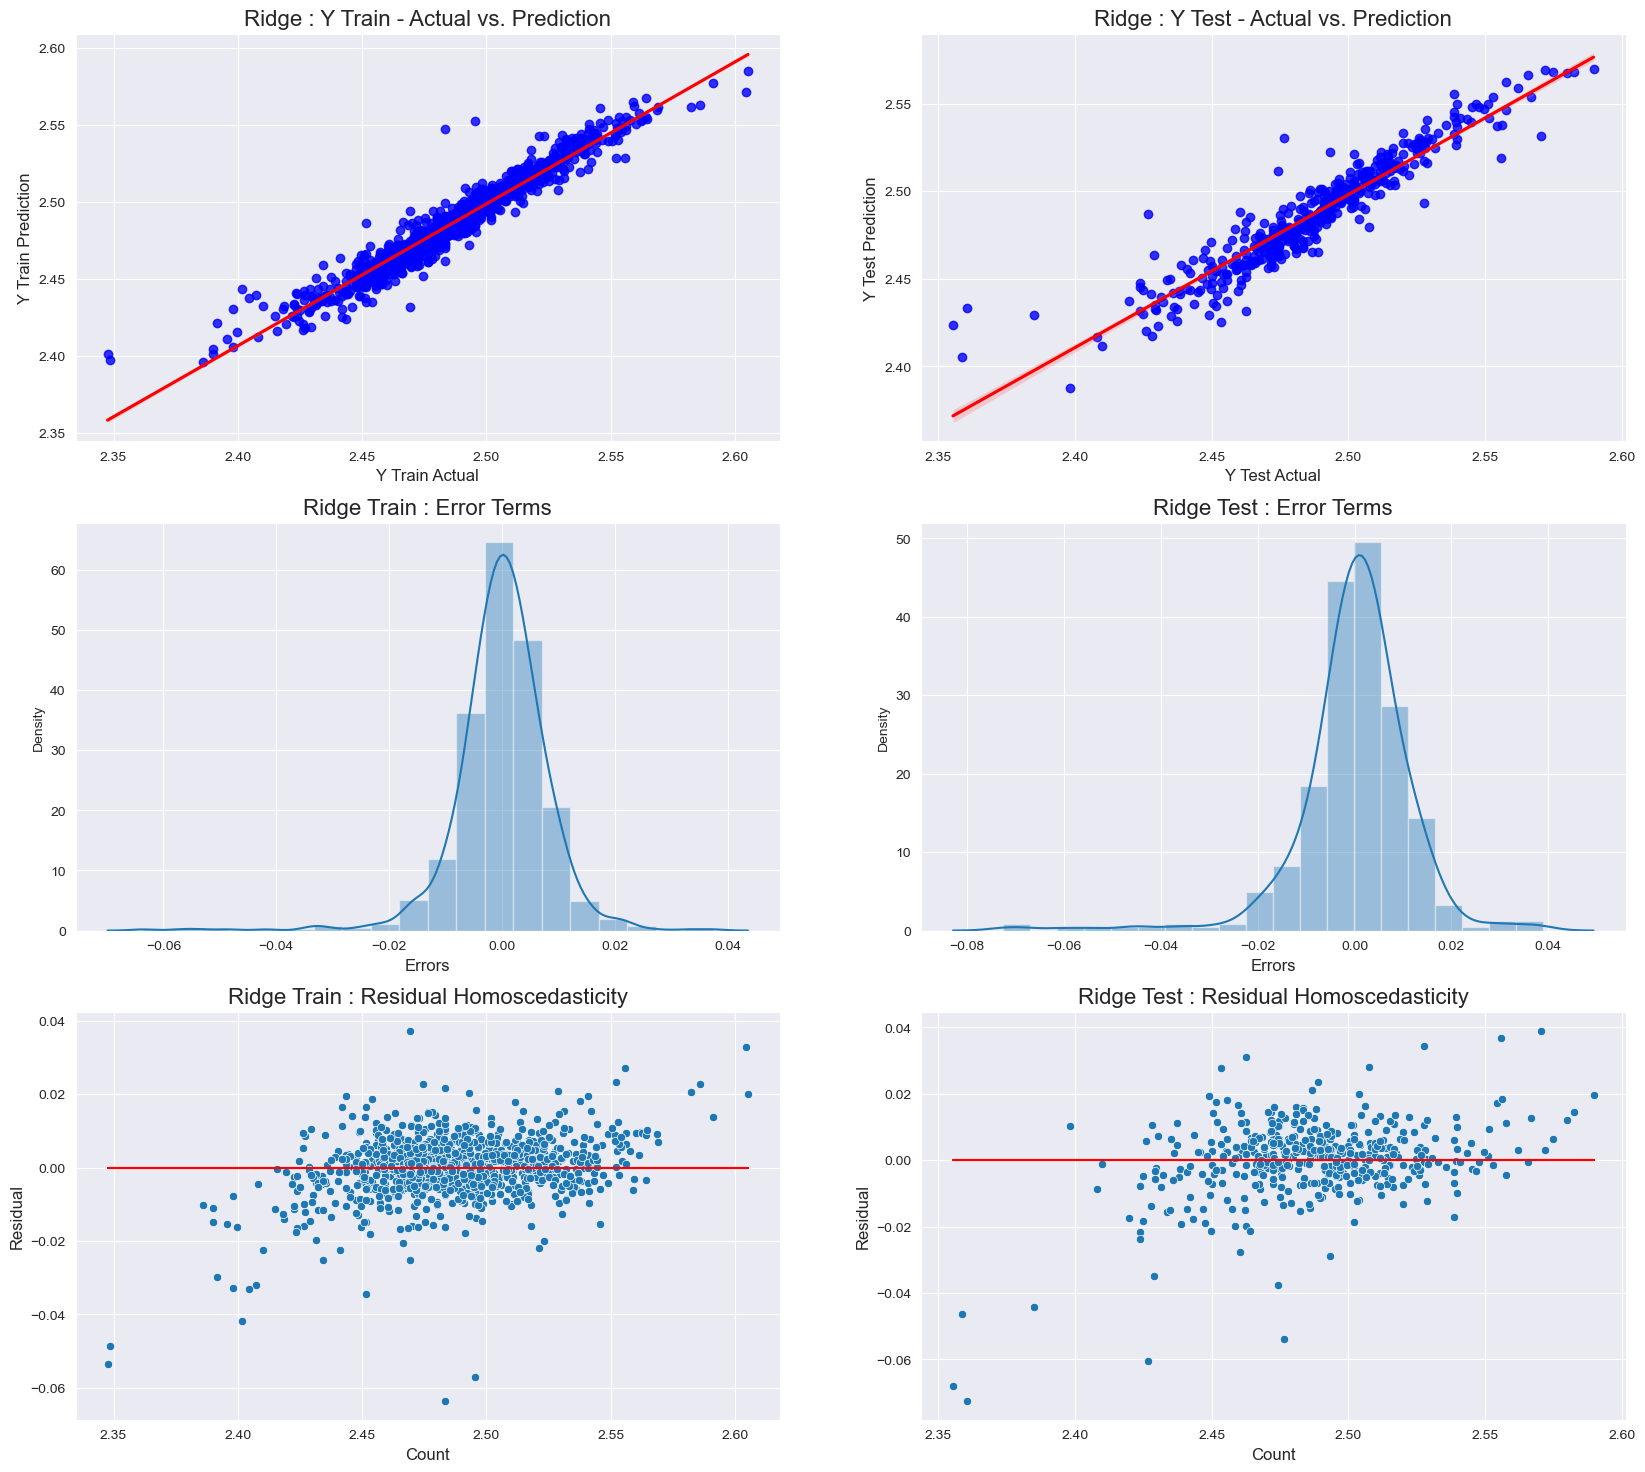

In [96]:
# Ridge - y-Predicted vs. y-Actual Values plot
plt.subplots(figsize=(20,18))

plt.subplot(3,2,1)
sns.regplot(x=y_train, y=y_pred_train_rge, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('Ridge : Y Train - Actual vs. Prediction', fontsize=16)
plt.axis('tight')
plt.xlabel('Y Train Actual', fontsize=12)
plt.ylabel('Y Train Prediction', fontsize=12)

plt.subplot(3,2,2)
sns.regplot(x=y_test, y=y_pred_test_rge, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('Ridge : Y Test - Actual vs. Prediction', fontsize=16)
plt.axis('tight')
plt.xlabel('Y Test Actual', fontsize=12)
plt.ylabel('Y Test Prediction', fontsize=12)

plt.subplot(3,2,3)
sns.distplot((y_train - y_pred_train_rge), bins = 20)
plt.title('Ridge Train : Error Terms', fontsize = 16)                  # Plot heading
plt.axis('tight')
plt.xlabel('Errors', fontsize = 12)                         # X-label

plt.subplot(3,2,4)
sns.distplot((y_test - y_pred_test_rge), bins = 20)
plt.title('Ridge Test : Error Terms', fontsize = 16)                  # Plot heading 
plt.axis('tight')
plt.xlabel('Errors', fontsize = 12)                         # X-label

plt.subplot(3,2,5)
residual = y_train - y_pred_train_rge
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.title('Ridge Train : Residual Homoscedasticity', fontsize = 16)                  # Plot heading 
plt.xlabel('Count', fontsize = 12)
plt.ylabel('Residual', fontsize = 12)

plt.subplot(3,2,6)
residual = y_test - y_pred_test_rge
sns.scatterplot(y_test,residual)
plt.plot(y_test,(y_test - y_test), '-r')
plt.title('Ridge Test : Residual Homoscedasticity', fontsize = 16)                  # Plot heading 
plt.xlabel('Count', fontsize = 12)
plt.ylabel('Residual', fontsize = 12)


plt.show()

#### Observation :
- R2 Squared Value for Train is 93%, the R2 Squared Value for Test (UnSeen Data) is 88%. 
- The gap between the R2 Squares for Train and Test is reduced when compared to that for Linear Regression.
- Error plotted demonstrate a normal curve.
- Residual Homoscedasticity plot shows that the error is constant along the values of the dependent variable.


In [97]:
## Create a dataframe of ridge cross validation results
ridgeCV_results= pd.DataFrame(model_cv.cv_results_)
ridgeCV_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.008459  3.141716e-03         0.003137        0.002131      0.0001   
1        0.011183  6.145166e-03         0.003124        0.006249       0.001   
2        0.015935  3.518976e-03         0.002922        0.002498        0.01   
3        0.012496  6.248071e-03         0.003125        0.006250        0.05   
4        0.012501  6.250405e-03         0.003124        0.006248         0.1   
5        0.012494  6.247093e-03         0.006249        0.007653         0.2   
6        0.015620  1.112166e-06         0.003125        0.006249         0.3   
7        0.012498  6.248856e-03         0.003122        0.006245         0.4   
8        0.012488  6.244057e-03         0.006257        0.007663         0.5   
9        0.014385  8.511043e-03         0.005119        0.005740         0.6   
10       0.015622  7.629395e-07         0.003124        0.006249         0.7   
11       0.013323  6.807429e-03         0.007280        0.006940         0.8   
12       0.006248  7.652670e-03         0.006248        0.007653         0.9   
13       0.015700  1.585495e-04         0.006249        0.007653         1.0   
14       0.012497  6.248522e-03         0.003124        0.006248         2.0   
15       0.009373  7.653176e-03         0.006248        0.007653         3.0   
16       0.009373  7.653293e-03         0.006249        0.007653         4.0   
17       0.012496  6.247950e-03         0.003124        0.006248         5.0   
18       0.012496  6.247902e-03         0.003124        0.006249         6.0   
19       0.012497  6.248356e-03         0.003125        0.006250         7.0   
20       0.012497  6.248522e-03         0.000000        0.000000         8.0   
21       0.015623  2.579332e-06         0.000000        0.000000         9.0   
22       0.009367  7.647943e-03         0.006248        0.007652        10.0   
23       0.012497  6.248403e-03         0.003124        0.006249          20   
24       0.012575  6.291250e-03         0.006250        0.007655          50   
25       0.012494  6.247174e-03         0.006239        0.007641         100   
26       0.015621  1.297137e-06         0.006249        0.007653         500   
27       0.012499  6.249404e-03         0.003124        0.006248        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}          -0.008369          -0.007924   
1    {'alpha': 0.001}          -0.008360          -0.007908   
2     {'alpha': 0.01}          -0.008290          -0.007805   
3     {'alpha': 0.05}          -0.008152          -0.007698   
4      {'alpha': 0.1}          -0.008062          -0.007657   
5      {'alpha': 0.2}          -0.007960          -0.007655   
6      {'alpha': 0.3}          -0.007912          -0.007644   
7      {'alpha': 0.4}          -0.007875          -0.007633   
8      {'alpha': 0.5}          -0.007834          -0.007624   
9      {'alpha': 0.6}          -0.007791          -0.007616   
10     {'alpha': 0.7}          -0.007752          -0.007609   
11     {'alpha': 0.8}          -0.007718          -0.007601   
12     {'alpha': 0.9}          -0.007684          -0.007594   
13     {'alpha': 1.0}          -0.007652          -0.007585   
14     {'alpha': 2.0}          -0.007458          -0.007510   
15     {'alpha': 3.0}          -0.007409          -0.007505   
16     {'alpha': 4.0}          -0.007356          -0.007502   
17     {'alpha': 5.0}          -0.007314          -0.007498   
18     {'alpha': 6.0}          -0.007275          -0.007496   
19     {'alpha': 7.0}          -0.007240          -0.007497   
20     {'alpha': 8.0}          -0.007212          -0.007499   
21     {'alpha': 9.0}          -0.007185          -0.007501   
22    {'alpha': 10.0}          -0.007163          -0.007503   
23      {'alpha': 20}          -0.007065          -0.007571   
24      {'alpha': 50}          -0.007072          -0.007852   
25     {'alpha': 100}          -0.007200     

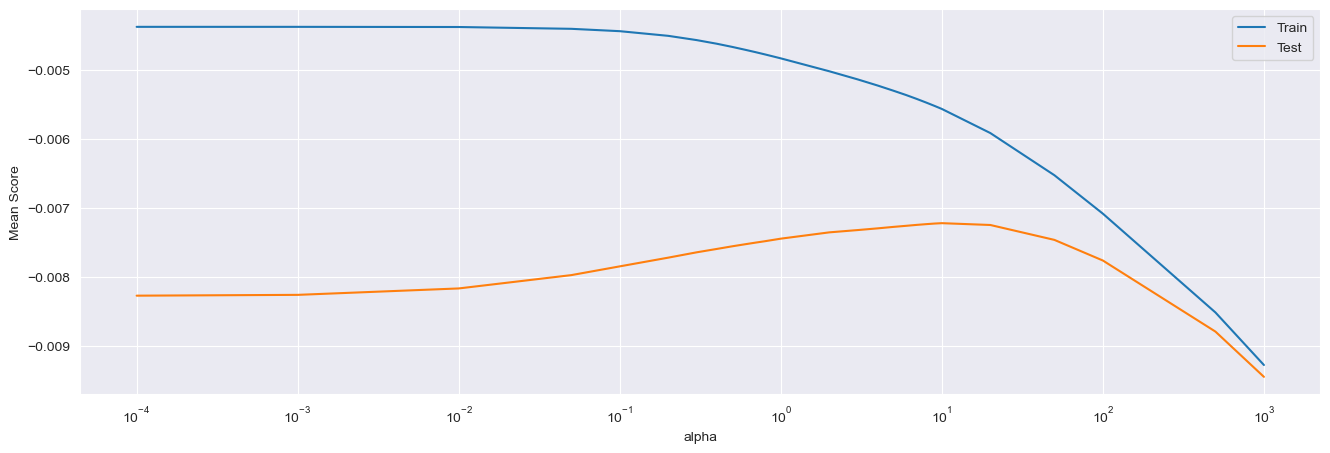

In [98]:
## Plotting R2 score vs alpha values
plt.figure(figsize=(16,5))
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_train_score'], label='Train')
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('Mean Score')
plt.xscale('log')
plt.legend()
plt.show()

- As the value of alpha increases, we see a decrease in train error and an initial increase followed by decrease in test error.
- Optimal Value of alpha is 10.

#### Lasso Regression

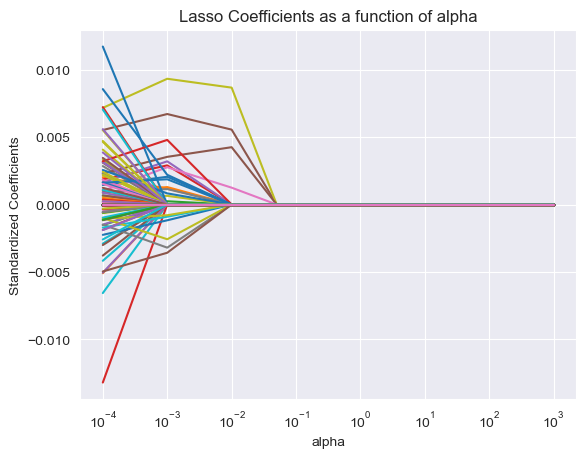

In [99]:
## Creating a Lasso model
## Run a cross validation on a list of alphas to find the optimum value of alpha
lasso = Lasso()
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}
coefs = []

for key, value in params.items():
    for a in value:
        lasso.set_params(alpha=a)
        lasso.fit(X_train, y_train)
        coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(value, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso Coefficients as a function of alpha');

#### Observation :
- As we move from left to right in the above plot, notice that at first the lasso models contains many predictors with high magnitudes of coefficient estimates. With increasing alpha, the coefficient estimates approximate towards zero.

###### Next we Cross Validate to the best value for alpha.

In [100]:
# cross validation
lasso = Lasso()
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [101]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [102]:
## View the results of cross validation search
model_cv.cv_results_

{'mean_fit_time': array([0.05231452, 0.02252522, 0.02187128, 0.02499456, 0.01562085,
        0.01631637, 0.02246475, 0.01874495, 0.01249838, 0.0124897 ,
        0.01629701, 0.01874509, 0.012498  , 0.01249838, 0.00937333,
        0.01249776, 0.0093801 , 0.01249642, 0.00937271, 0.01249065,
        0.00937276, 0.01249676, 0.01249762, 0.00937238, 0.01249709,
        0.01249604, 0.01562076, 0.00937095]),
 'std_fit_time': array([1.68332123e-02, 7.21803466e-03, 7.65107369e-03, 7.65284508e-03,
        4.67203091e-07, 8.77698232e-04, 7.73860768e-03, 6.24895287e-03,
        6.24919006e-03, 6.24486947e-03, 1.09780308e-02, 6.24840263e-03,
        6.24899877e-03, 6.24918947e-03, 7.65329475e-03, 6.24887970e-03,
        7.65883184e-03, 6.24821285e-03, 7.65278664e-03, 6.24533439e-03,
        7.65282558e-03, 6.24837909e-03, 6.24880792e-03, 7.65251437e-03,
        6.24854576e-03, 6.24802193e-03, 8.97163759e-07, 7.65134615e-03]),
 'mean_score_time': array([0.00770154, 0.00312438, 0.00312419, 0.00624824, 

In [103]:
#Fitting Lasso model for alpha = 0.0001 and printing coefficients which have been penalised

lasso = Lasso(alpha=0.0001)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [104]:
## View the coefficients of lasso fitted model
lasso.coef_

array([ 0.00000000e+00,  2.02743618e-03,  1.94828659e-04,  1.86464511e-03,
       -5.82540709e-04,  5.51873332e-03,  2.35732629e-03,  2.85003826e-03,
        7.16231110e-03,  6.76888154e-04,  1.44797423e-03,  8.60532365e-04,
       -7.23813091e-05, -0.00000000e+00,  1.64300679e-03,  2.28888005e-03,
        1.00923599e-03,  9.23694141e-04,  5.70068300e-04, -6.56196120e-03,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        8.72706545e-04,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -6.38387873e-04,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -5.96965182e-04,  1.06872381e-03,  0.00000000e+00,  3.09965021e-03,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  2.30726628e-03,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [105]:
## Create a dataframe of Lasso cross validation results
lassoCV_results= pd.DataFrame(model_cv.cv_results_)
lassoCV_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.052315  1.683321e-02         0.007702        0.005184      0.0001   
1        0.022525  7.218035e-03         0.003124        0.006249       0.001   
2        0.021871  7.651074e-03         0.003124        0.006248        0.01   
3        0.024995  7.652845e-03         0.006248        0.007652        0.05   
4        0.015621  4.672031e-07         0.006248        0.007652         0.1   
5        0.016316  8.776982e-04         0.008499        0.008441         0.2   
6        0.022465  7.738608e-03         0.004321        0.006106         0.3   
7        0.018745  6.248953e-03         0.003124        0.006248         0.4   
8        0.012498  6.249190e-03         0.009373        0.007653         0.5   
9        0.012490  6.244869e-03         0.012502        0.006251         0.6   
10       0.016297  1.097803e-02         0.004720        0.006265         0.7   
11       0.018745  6.248403e-03         0.006249        0.007653         0.8   
12       0.012498  6.248999e-03         0.006248        0.007652         0.9   
13       0.012498  6.249189e-03         0.006248        0.007652         1.0   
14       0.009373  7.653295e-03         0.006248        0.007652         2.0   
15       0.012498  6.248880e-03         0.006249        0.007653         3.0   
16       0.009380  7.658832e-03         0.006249        0.007653         4.0   
17       0.012496  6.248213e-03         0.003124        0.006247         5.0   
18       0.009373  7.652787e-03         0.006241        0.007643         6.0   
19       0.012491  6.245334e-03         0.003126        0.006251         7.0   
20       0.009373  7.652826e-03         0.003124        0.006249         8.0   
21       0.012497  6.248379e-03         0.006249        0.007654         9.0   
22       0.012498  6.248808e-03         0.003124        0.006248        10.0   
23       0.009372  7.652514e-03         0.006247        0.007651          20   
24       0.012497  6.248546e-03         0.000000        0.000000          50   
25       0.012496  6.248022e-03         0.006249        0.007654         100   
26       0.015621  8.971638e-07         0.003125        0.006250         500   
27       0.009371  7.651346e-03         0.003125        0.006251        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}          -0.007104          -0.007664   
1    {'alpha': 0.001}          -0.008763          -0.009784   
2     {'alpha': 0.01}          -0.015447          -0.016392   
3     {'alpha': 0.05}          -0.026012          -0.025978   
4      {'alpha': 0.1}          -0.026012          -0.025978   
5      {'alpha': 0.2}          -0.026012          -0.025978   
6      {'alpha': 0.3}          -0.026012          -0.025978   
7      {'alpha': 0.4}          -0.026012          -0.025978   
8      {'alpha': 0.5}          -0.026012          -0.025978   
9      {'alpha': 0.6}          -0.026012          -0.025978   
10     {'alpha': 0.7}          -0.026012          -0.025978   
11     {'alpha': 0.8}          -0.026012          -0.025978   
12     {'alpha': 0.9}          -0.026012          -0.025978   
13     {'alpha': 1.0}          -0.026012          -0.025978   
14     {'alpha': 2.0}          -0.026012          -0.025978   
15     {'alpha': 3.0}          -0.026012          -0.025978   
16     {'alpha': 4.0}          -0.026012          -0.025978   
17     {'alpha': 5.0}          -0.026012          -0.025978   
18     {'alpha': 6.0}          -0.026012          -0.025978   
19     {'alpha': 7.0}          -0.026012          -0.025978   
20     {'alpha': 8.0}          -0.026012          -0.025978   
21     {'alpha': 9.0}          -0.026012          -0.025978   
22    {'alpha': 10.0}          -0.026012          -0.025978   
23      {'alpha': 20}          -0.026012          -0.025978   
24      {'alpha': 50}          -0.026012          -0.025978   
25     {'alpha': 100}          -0.026012     

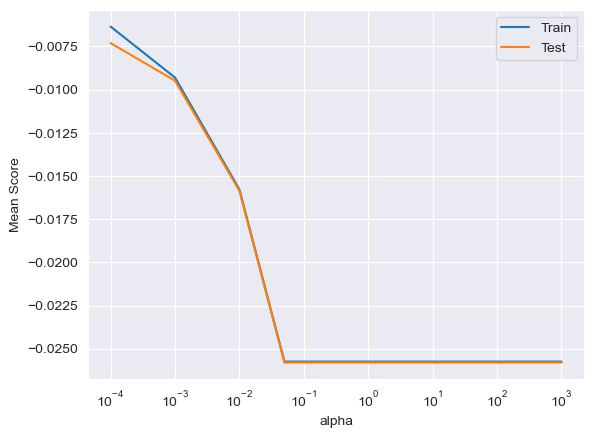

In [106]:
## Plotting Mean Score vs alpha values
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_train_score'], label='Train')
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('Mean Score')
plt.xscale('log')
plt.legend()
plt.show()

- As the value of alpha increases, we see a decrease in both train and test error.
- Error Value Flattens out after 0.0259, to the alpha value of 0.0001.

###### Lets Predict and calculate some metrics such as R2 score, RSS and RMSE

In [107]:
# Prediction
y_pred_train_las = lasso.predict(X_train)
y_pred_test_las = lasso.predict(X_test)

In [108]:
# Metrics Calculation
metric3 = []
r2_train_las = r2_score(y_train, y_pred_train_las)
print("Train - R2 Score : ", r2_train_las)
metric3.append(r2_train_las)

r2_test_las = r2_score(y_test, y_pred_test_las)
print("Test - R2 Score : ", r2_test_las)
metric3.append(r2_test_las)

rss1_las = np.sum(np.square(y_train - y_pred_train_las))
print("Train - Residual Sum of Squares : ", rss1_las)
metric3.append(rss1_las)

rss2_las = np.sum(np.square(y_test - y_pred_test_las))
print("Test - Residual Sum of Sqaures : ", rss2_las)
metric3.append(rss2_las)

mse_train_las = mean_squared_error(y_train, y_pred_train_las)
print("Train - Mean Squared Error : ", mse_train_las)
metric3.append(mse_train_las**0.5)

mse_test_las = mean_squared_error(y_test, y_pred_test_las)
print("Test - Mean Squared Error : ", mse_test_las)
metric3.append(mse_test_las**0.5)

Train - R2 Score :  0.9145782368571967
Test - R2 Score :  0.8766711915153151
Train - Residual Sum of Squares :  0.09465421693711992
Test - Residual Sum of Sqaures :  0.061639926739399706
Train - Mean Squared Error :  9.270736232822715e-05
Test - Mean Squared Error :  0.00014073042634566143


#### Lasso - Model Visualization

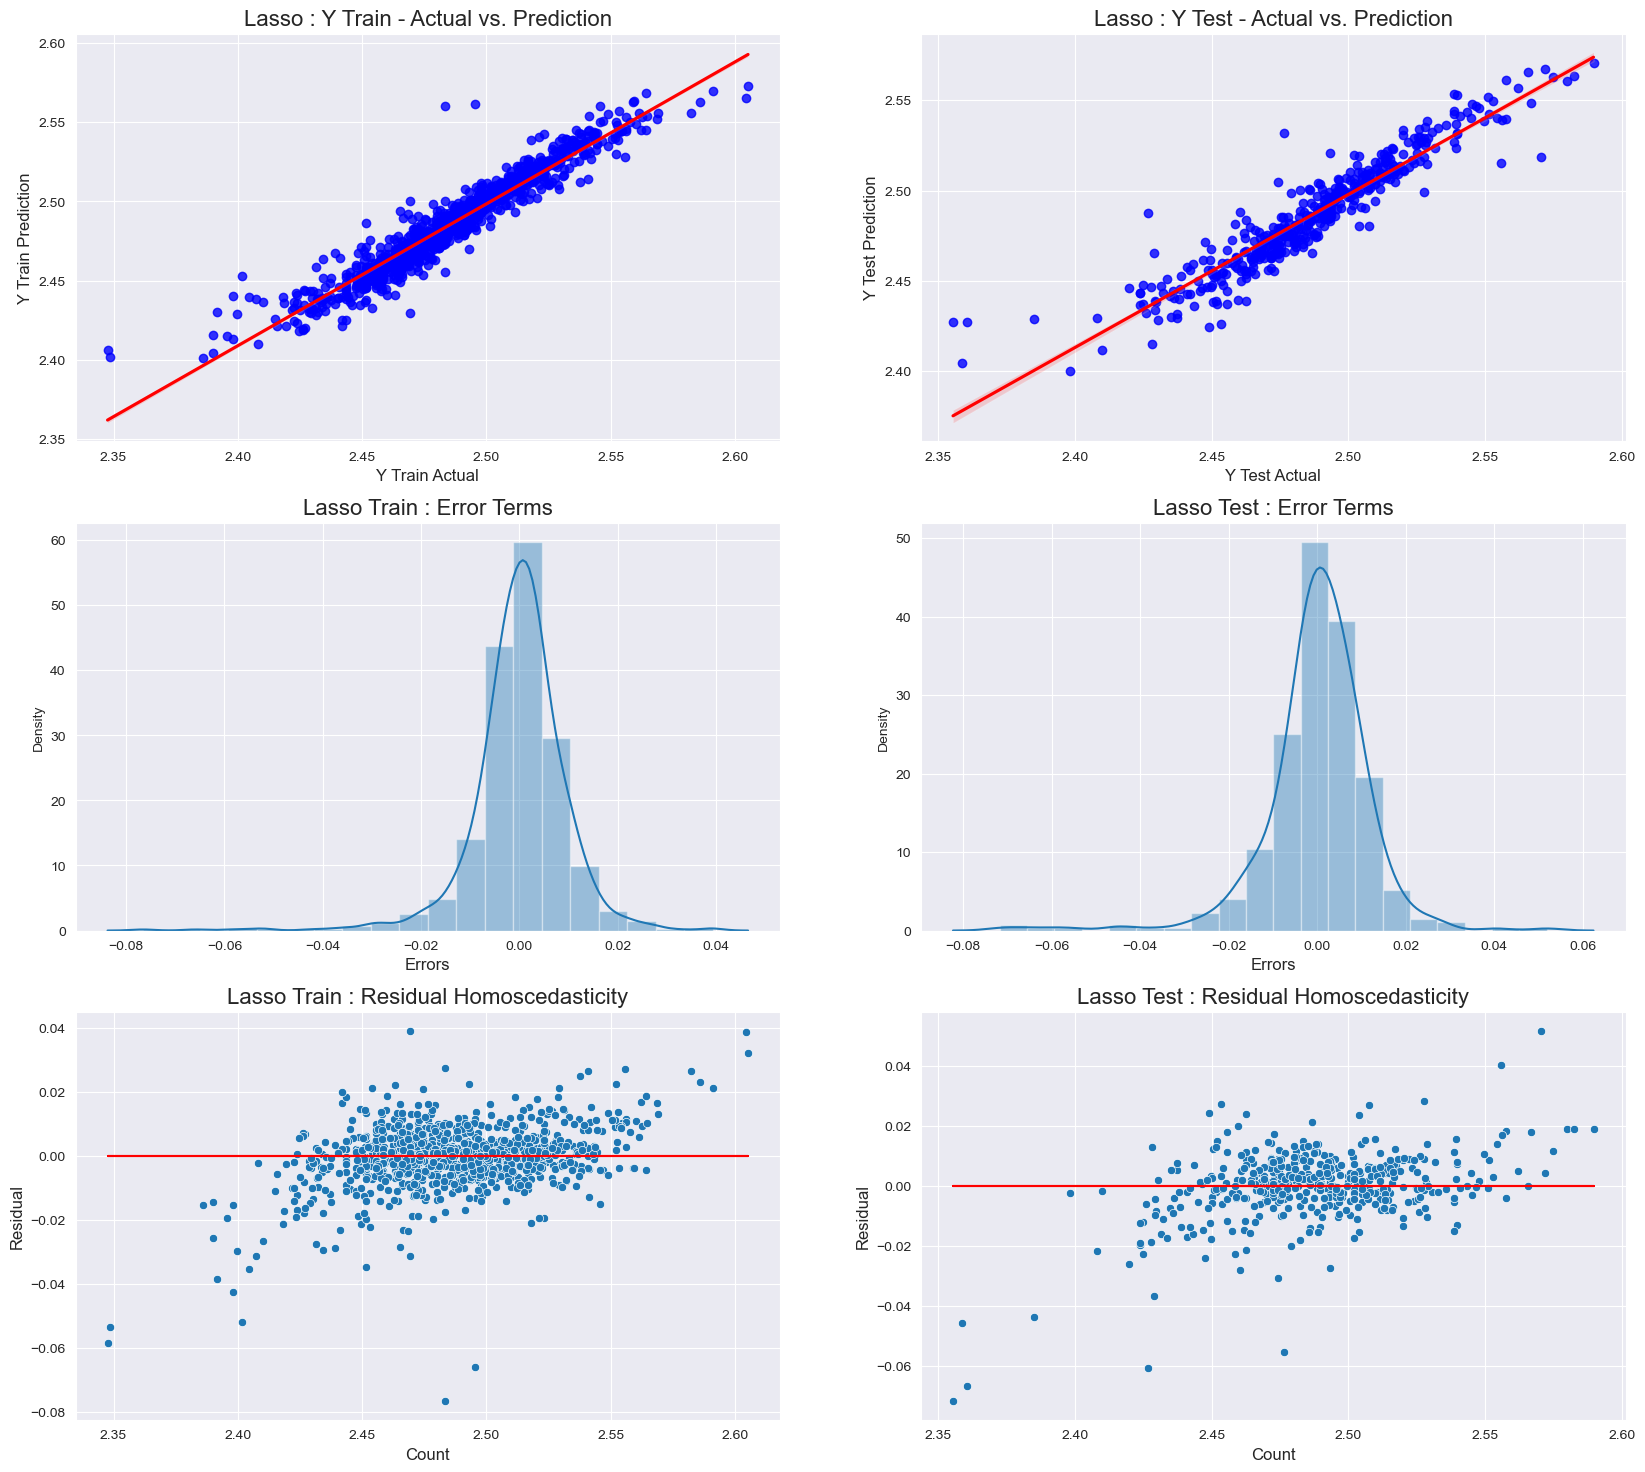

In [109]:
plt.subplots(figsize=(20,18))

plt.subplot(3,2,1)
sns.regplot(x=y_train, y=y_pred_train_las, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('Lasso : Y Train - Actual vs. Prediction', fontsize=16)
plt.axis('tight')
plt.xlabel('Y Train Actual', fontsize=12)
plt.ylabel('Y Train Prediction', fontsize=12)

plt.subplot(3,2,2)
sns.regplot(x=y_test, y=y_pred_test_las, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('Lasso : Y Test - Actual vs. Prediction', fontsize=16)
plt.axis('tight')
plt.xlabel('Y Test Actual', fontsize=12)
plt.ylabel('Y Test Prediction', fontsize=12)

plt.subplot(3,2,3)
sns.distplot((y_train - y_pred_train_las), bins = 20)
plt.title('Lasso Train : Error Terms', fontsize = 16)                  # Plot heading
plt.axis('tight')
plt.xlabel('Errors', fontsize = 12)                         # X-label

plt.subplot(3,2,4)
sns.distplot((y_test - y_pred_test_las), bins = 20)
plt.title('Lasso Test : Error Terms', fontsize = 16)                  # Plot heading 
plt.axis('tight')
plt.xlabel('Errors', fontsize = 12)                         # X-label

plt.subplot(3,2,5)
residual = y_train - y_pred_train_las
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.title('Lasso Train : Residual Homoscedasticity', fontsize = 16)                  # Plot heading 
plt.xlabel('Count', fontsize = 12)
plt.ylabel('Residual', fontsize = 12)

plt.subplot(3,2,6)
residual = y_test - y_pred_test_las
sns.scatterplot(y_test,residual)
plt.plot(y_test,(y_test - y_test), '-r')
plt.title('Lasso Test : Residual Homoscedasticity', fontsize = 16)                  # Plot heading 
plt.xlabel('Count', fontsize = 12)
plt.ylabel('Residual', fontsize = 12)


plt.show()

#### Observation :
- R2 Squared Value for Train is 91%, the R2 Squared Value for Test (UnSeen Data) is 87%. 
- The gap between the R2 Squares for Train and Test is reduced when compared to that for Linear Regression.
- Error plotted demonstrate a normal curve.
- Residual Homoscedasticity plot shows that the error is constant along the values of the dependent variable.

In [110]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       9.620192e-01          0.936454          0.914578
1   R2 Score (Test)      -1.361460e+17          0.881091          0.876671
2       RSS (Train)       4.208581e-02          0.070414          0.094654
3        RSS (Test)       6.804597e+16          0.059431          0.061640
4       MSE (Train)       6.420295e-03          0.008305          0.009628
5        MSE (Test)       1.246419e+07          0.011648          0.011863

#### Model - Inference of Coefficients

In [111]:
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns

In [112]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [113]:
pd.set_option('display.max_rows', None)
betas.head(318)

Linear     Ridge     Lasso
LotFrontage              -2.204022e-04 -0.000168  0.000000
LotArea                   2.608747e-03  0.002231  0.002027
MasVnrArea                5.144659e-04  0.000093  0.000195
BsmtFinSF1                1.694932e-03  0.001204  0.001865
BsmtUnfSF                -9.627899e-05 -0.001149 -0.000583
TotalBsmtSF               3.575630e-03  0.005283  0.005519
1stFlrSF                  4.758867e-03  0.003067  0.002357
2ndFlrSF                  4.630621e-03  0.003888  0.002850
GrLivArea                 4.075063e-03  0.005822  0.007162
BsmtFullBath              1.079269e-03  0.000757  0.000677
FullBath                  9.805253e-04  0.001650  0.001448
HalfBath                  2.863713e-04  0.000904  0.000861
BedroomAbvGr              3.867799e-05  0.000096 -0.000072
TotRmsAbvGrd              1.081449e-04  0.000156 -0.000000
Fireplaces                5.838521e-04  0.000641  0.001643
GarageCars                5.108724e-04  0.001961  0.002289
GarageArea                2.241473e-03  0.000995  0.001009
WoodDeckSF                6.228980e-04  0.000815  0.000924
OpenPorchSF               7.858399e-04  0.000643  0.000570
MSSubClass_30            -8.203201e-03 -0.006016 -0.006562
MSSubClass_40            -1.356073e-02 -0.000985 -0.000000
MSSubClass_45            -1.891975e-02 -0.000084  0.000000
MSSubClass_50            -3.522916e-03  0.000232  0.000000
MSSubClass_60            -2.728944e-03 -0.000756  0.000000
MSSubClass_70             6.380977e-04  0.003872  0.000873
MSSubClass_75            -1.416206e-02  0.000818  0.000000
MSSubClass_80            -4.701595e-03 -0.000547  0.000000
MSSubClass_85             3.181025e-03  0.000342  0.000000
MSSubClass_90            -5.846317e+07 -0.002055 -0.000638
MSSubClass_120            1.874356e-03  0.000623  0.000000
MSSubClass_160           -6.715808e-03 -0.002229 -0.000000
MSSubClass_180           -2.236049e-03 -0.002160 -0.000000
MSSubClass_190            6.705552e+07 -0.001889 -0.000597
MSZoning_FV               4.579714e-02  0.005208  0.001069
MSZoning_RH               4.381991e-02  0.004089  0.000000
MSZoning_RL               4.332267e-02  0.005058  0.003100
MSZoning_RM               3.943870e-02  0.001803 -0.000000
Street_Pave              -1.156395e-03  0.000227  0.000000
Alley_No_Alley_Access     5.912564e-04 -0.000093  0.000000
Alley_Pave                3.036117e-03  0.002070  0.000000
LotShape_IR2              3.761086e-04  0.001165  0.000000
LotShape_IR3              4.658972e-03 -0.002094 -0.000000
LotShape_Reg              7.026838e-04  0.000824  0.000000
LandContour_HLS          -2.193519e-05  0.003334  0.000000
LandContour_Low          -1.321239e-03  0.001213  0.000000
LandContour_Lvl           1.125949e-03  0.002487  0.000000
Utilities_NoSeWa         -1.008848e-02 -0.000495 -0.000000
LotConfig_CulDSac         1.501204e-03  0.002603  0.002307
LotConfig_FR2            -3.053060e-03 -0.002319 -0.000000
LotConfig_FR3            -9.404991e-04 -0.000052  0.000000
LotConfig_Inside         -2.978697e-04 -0.000044 -0.000000
LandSlope_Mod             2.634617e-03  0.000886  0.000000
LandSlope_Sev             2.434186e-03  0.000683  0.000000
Neighborhood_Blueste      9.774006e-03  0.000176  0.000000
Neighborhood_BrDale      -1.741805e-04 -0.000976 -0.000000
Neighborhood_BrkSide      8.256806e-03  0.002137  0.000675
Neighborhood_ClearCr      5.898350e-03  0.003165  0.000164
Neighborhood_CollgCr      5.385731e-04 -0.000155 -0.000000
Neighborhood_Crawfor      1.120043e-02  0.005770  0.005513
Neighborhood_Edwards     -1.859363e-03 -0.005933 -0.004169
Neighborhood_Gilbert      1.398526e-03  0.000023  0.000000
Neighborhood_IDOTRR       4.609232e-03 -0.005125 -0.005093
Neighborhood_MeadowV     -1.069727e-02 -0.005042 -0.001529
Neighborhood_Mitchel     -2.646844e-03 -0.003047 -0.000000
Neighborhood_NAmes        6.298660e-04 -0.001273 -0.000000
Neighborhood_NPkVill     -6.538199e-04  0.000514  0.000000
Neighborhood_NWAmes      -1.380475e-03 -0.001349 -0.000000
Neighborhood_NoRidge

In [114]:
## View the number of features selected by lasso
betas[betas['Lasso']!=0].shape

(91, 3)

In [115]:
## View the features selected by lasso
betas.loc[betas['Lasso']!=0, 'Lasso']

LotArea                     0.002027
MasVnrArea                  0.000195
BsmtFinSF1                  0.001865
BsmtUnfSF                  -0.000583
TotalBsmtSF                 0.005519
1stFlrSF                    0.002357
2ndFlrSF                    0.002850
GrLivArea                   0.007162
BsmtFullBath                0.000677
FullBath                    0.001448
HalfBath                    0.000861
BedroomAbvGr               -0.000072
Fireplaces                  0.001643
GarageCars                  0.002289
GarageArea                  0.001009
WoodDeckSF                  0.000924
OpenPorchSF                 0.000570
MSSubClass_30              -0.006562
MSSubClass_70               0.000873
MSSubClass_90              -0.000638
MSSubClass_190             -0.000597
MSZoning_FV                 0.001069
MSZoning_RL                 0.003100
LotConfig_CulDSac           0.002307
Neighborhood_BrkSide        0.000675
Neighborhood_ClearCr        0.000164
Neighborhood_Crawfor        0.005513
N

In [116]:
## View the number of features removed by lasso
betas[betas['Lasso']==0].shape

(226, 3)

#### Observation :
- Notice that Lasso has removed / eliminated 226 features

In [117]:
## View the features removed by Lasso
betas.loc[betas['Lasso']==0, 'Lasso']

LotFrontage                 0.0
TotRmsAbvGrd               -0.0
MSSubClass_40              -0.0
MSSubClass_45               0.0
MSSubClass_50               0.0
MSSubClass_60               0.0
MSSubClass_75               0.0
MSSubClass_80               0.0
MSSubClass_85               0.0
MSSubClass_120              0.0
MSSubClass_160             -0.0
MSSubClass_180             -0.0
MSZoning_RH                 0.0
MSZoning_RM                -0.0
Street_Pave                 0.0
Alley_No_Alley_Access       0.0
Alley_Pave                  0.0
LotShape_IR2                0.0
LotShape_IR3               -0.0
LotShape_Reg                0.0
LandContour_HLS             0.0
LandContour_Low             0.0
LandContour_Lvl             0.0
Utilities_NoSeWa           -0.0
LotConfig_FR2              -0.0
LotConfig_FR3               0.0
LotConfig_Inside           -0.0
LandSlope_Mod               0.0
LandSlope_Sev               0.0
Neighborhood_Blueste        0.0
Neighborhood_BrDale        -0.0
Neighbor

In [118]:
## View the top 10 coefficients of Ridge regression in descending order
betas['Ridge'].sort_values(ascending=False)[:10]

OverallQual_9           0.008171
CentralAir_Y            0.006673
Neighborhood_Somerst    0.006120
GrLivArea               0.005822
Neighborhood_Crawfor    0.005770
OverallQual_8           0.005393
Functional_Typ          0.005368
TotalBsmtSF             0.005283
MSZoning_FV             0.005208
OverallCond_9           0.005179
Name: Ridge, dtype: float64

In [119]:
## View the top 10 coefficients of Lasso in descending order
betas['Lasso'].sort_values(ascending=False)[:10]

OverallQual_9           0.011708
CentralAir_Y            0.008554
Neighborhood_Somerst    0.007219
GrLivArea               0.007162
OverallQual_8           0.007039
Functional_Typ          0.005585
TotalBsmtSF             0.005519
Neighborhood_Crawfor    0.005513
Condition1_Norm         0.004710
SaleType_New            0.004644
Name: Lasso, dtype: float64

In [120]:
## Inorder to interpret the  coefficients in terms of target, we need to take inverse log (i.e. exponential) of betas
ridge_coeffs = np.exp(betas['Ridge'])
print("Top 10 Ridge Coefficients : ", '\n')
ridge_coeffs.sort_values(ascending=False)[:10]

Top 10 Ridge Coefficients :  



OverallQual_9           1.008205
CentralAir_Y            1.006696
Neighborhood_Somerst    1.006139
GrLivArea               1.005839
Neighborhood_Crawfor    1.005787
OverallQual_8           1.005408
Functional_Typ          1.005383
TotalBsmtSF             1.005297
MSZoning_FV             1.005222
OverallCond_9           1.005193
Name: Ridge, dtype: float64

In [121]:
## Inorder to interpret the  coefficients in terms of target, we need to take inverse log (i.e. exponential) of betas
lasso_coeffs = np.exp(betas['Lasso'])
print("Top 10 Lass Coefficients : ", '\n')
lasso_coeffs.sort_values(ascending=False)[:10]

Top 10 Lass Coefficients :  



OverallQual_9           1.011777
CentralAir_Y            1.008591
Neighborhood_Somerst    1.007245
GrLivArea               1.007188
OverallQual_8           1.007064
Functional_Typ          1.005601
TotalBsmtSF             1.005534
Neighborhood_Crawfor    1.005529
Condition1_Norm         1.004721
SaleType_New            1.004655
Name: Lasso, dtype: float64

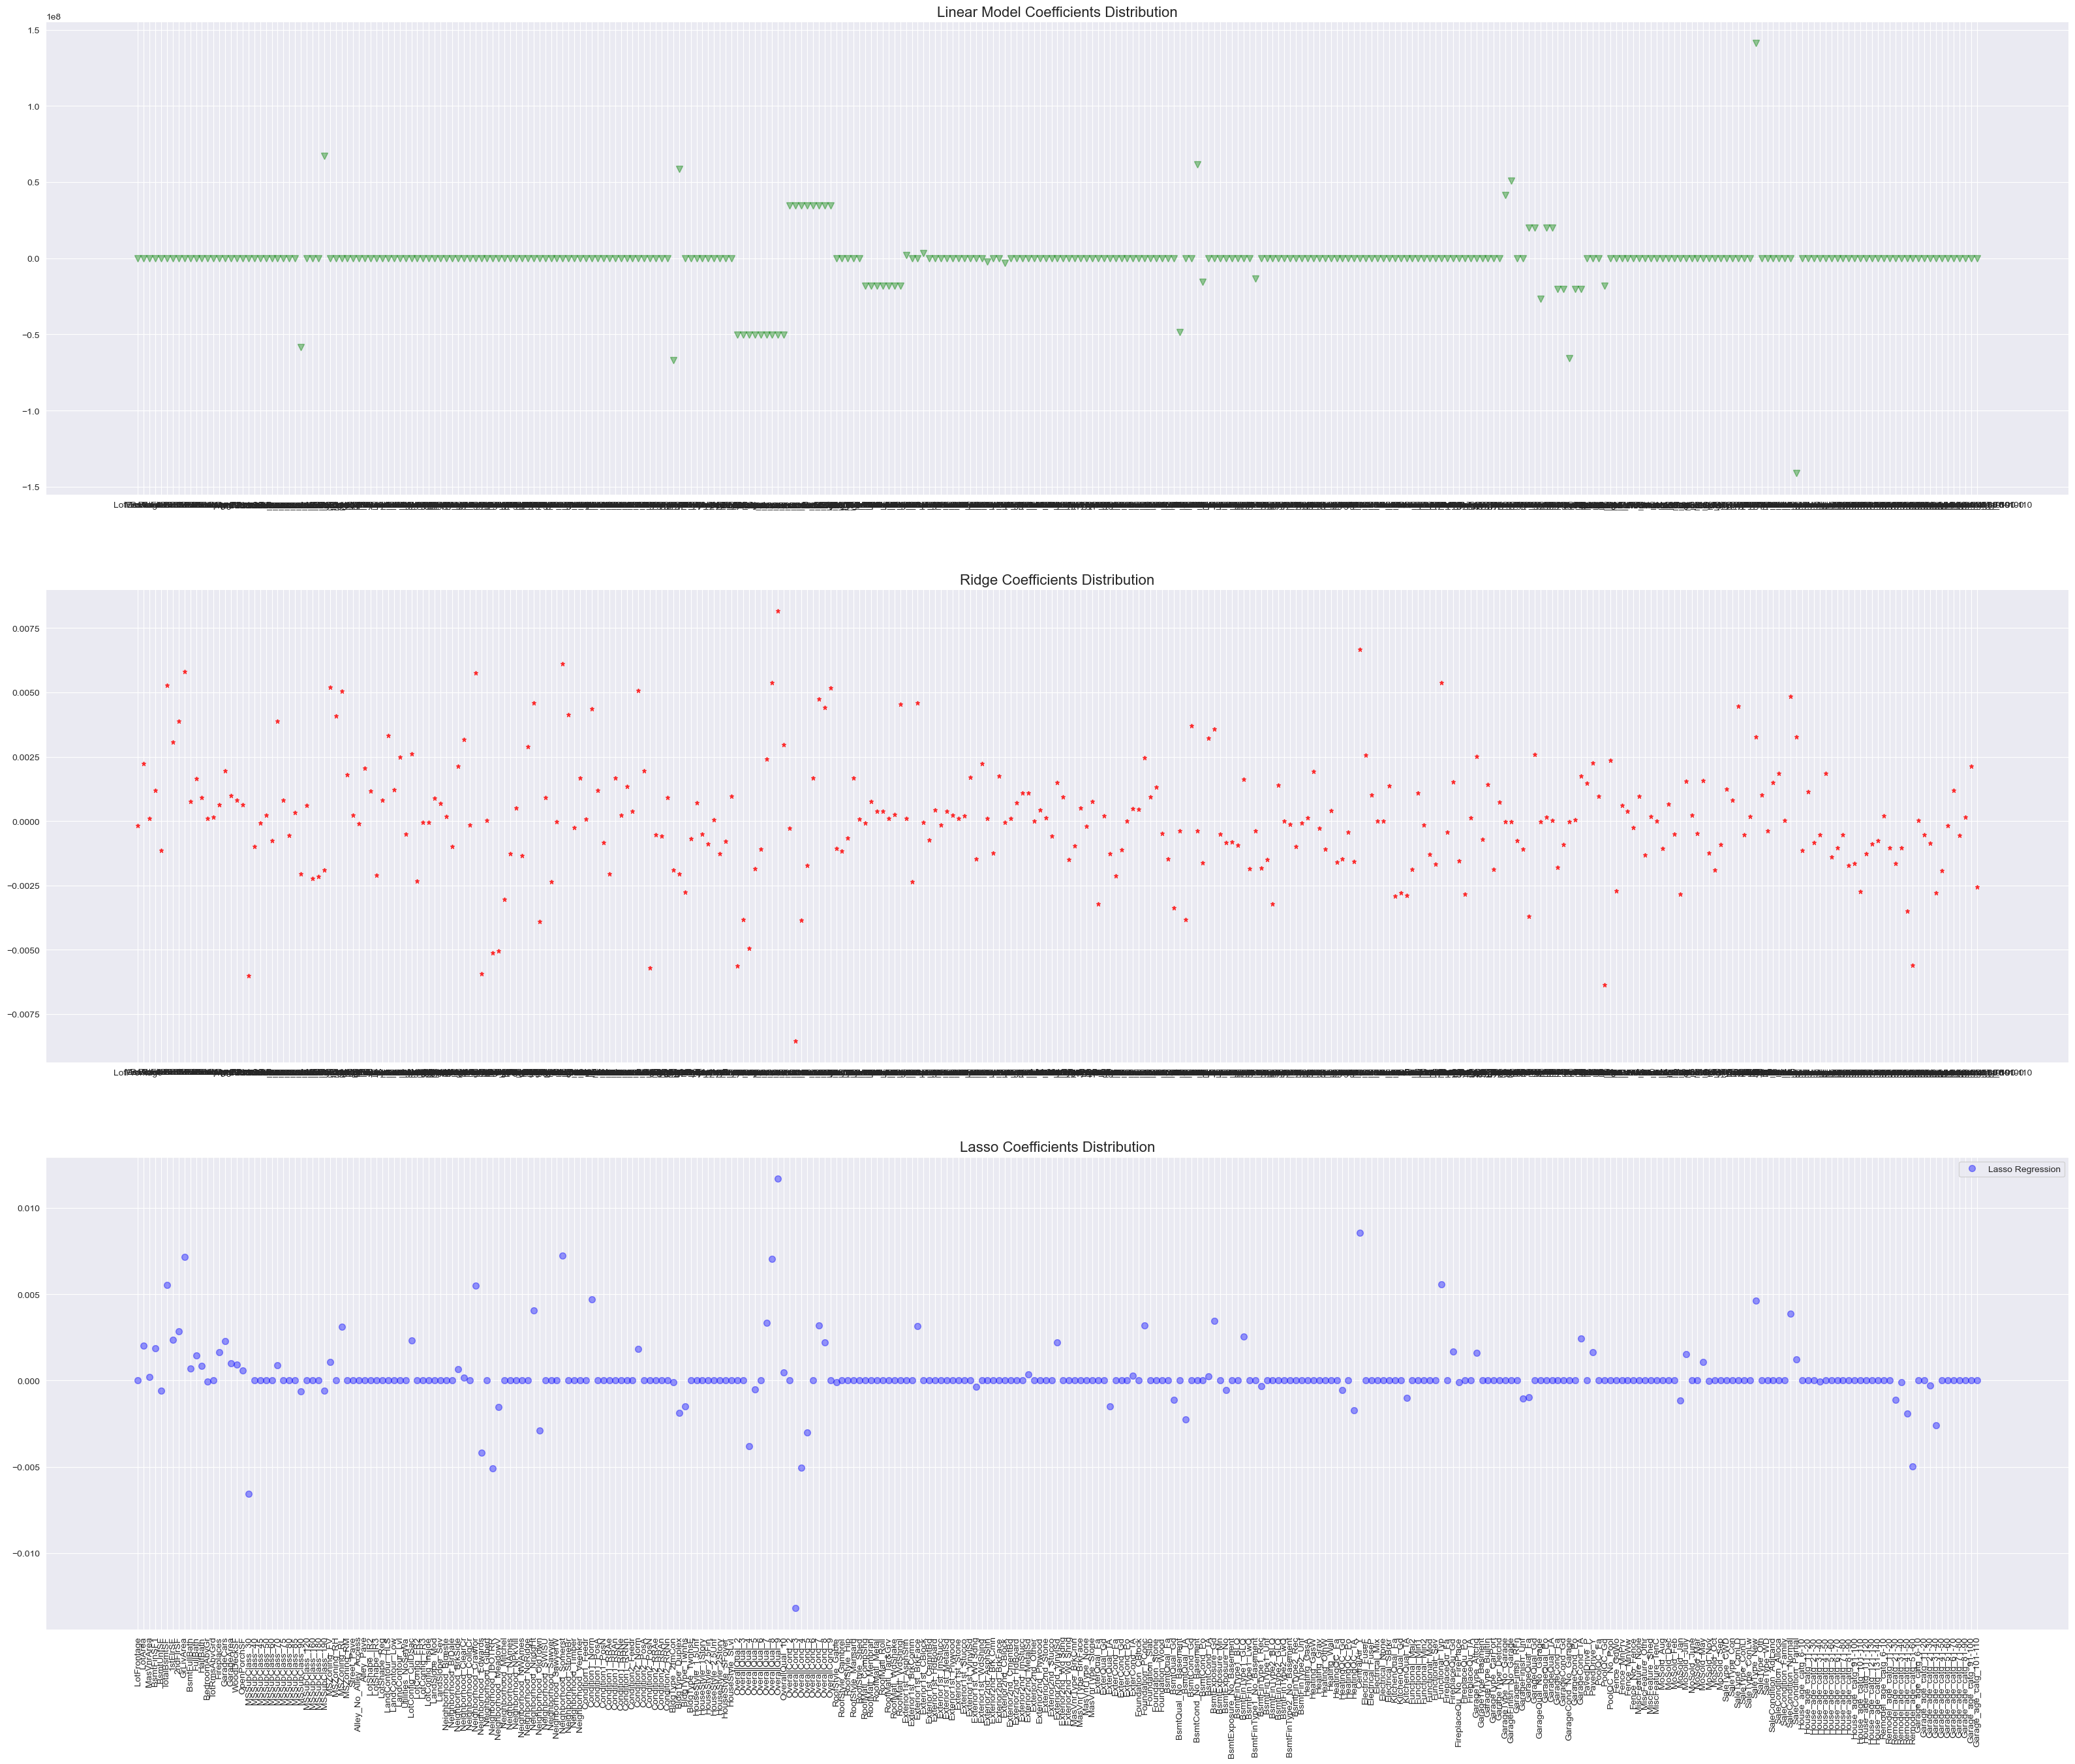

In [122]:
# Plot to compare Linear, Ridge and Lasso Co-efficients.
plt.subplots(figsize=(40,32))

plt.subplot(3,1,1)
plt.title('Linear Model Coefficients Distribution', fontsize=16)
plt.plot(X_train.columns,betas['Linear'],alpha=0.4,linestyle='none',marker='v',markersize=7,color='green',label='Linear Regression')

plt.subplot(3,1,2)
plt.title('Ridge Coefficients Distribution', fontsize=16)
plt.plot(X_train.columns,betas['Ridge'],alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 20$',zorder=7)

plt.subplot(3,1,3)
plt.title('Lasso Coefficients Distribution', fontsize=16)
plt.plot(X_train.columns,betas['Lasso'],alpha=0.4,linestyle='none',marker='o',markersize=7,color='blue',label='Lasso Regression')

plt.xticks(rotation = 90)
plt.axis('tight')
plt.legend()
plt.show()

# Case Study Part 1 : Final Inference

#### Revisit Business Goal
- To model the price of houses with the available independent variables.
- This model will then be used by the management to understand how exactly the prices vary with the variables.
- They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns.
- Further, the model will be a good way for management to understand the pricing dynamics of a new market.

#### Following Features / predictor variables have highers influence on SalePrice
- OverallQual : Houses with Rating 'Excellent' and 'Good' Rating for the  material and finish
- CentralAir : House with Central air conditioning
- GrLivArea: Houses with higher Above grade (ground) living area square feet
- Neighborhood: House with Physical locations within Ames city limits of 'Somerset' and 'Crawford'
- Functional: Houses with 'Typical Functionality' Home functionality
- Condition1: Houses with 'Normal' Proximity to various conditions or more than one varius conditions.
- TotalBsmtSF: Houses with higher Total square feet of basement area
- OverallCond: Houses with Rating of 'Excellent' Rating for their overall condition
- SaleType : 'New' - Home just constructed and sold
    - This concurrs with our observation from Data Exploration, that Houses which have been Built or remodelled or their Garages Built in last 5 years fetch higher SalePRice.
- MSZoning : Houses in 'FV' Floating Village Residential zone.

###### Surprise Housing should also look at collating external factors which can influence the Sale Price of the Houses.
- Collating and adding this data to pridict SalePrice, will enhance the Models developed.
- Few of the External Factors which commonly affect the Housing Prices:
    - Growth of Economy
    - Housing Loan Interest Rates
    - Employment / Un-Employment statistics
    - Mortage Availability
    - Market Index
    

# Case Study Part - 2

#### Subjective Questions

###### Question 1
What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented

The Optimal value of alpha for Ridge and Lasso Regression:
    - Ridge Regression - 10
    - Lasso Regression - 0.0001

In [123]:
# Lets check for the changes in the model if we choose double the value of alpha for both ridge and lasso
# Earlier Ridge Optimal Value was 10, double of it will be 20.
ridge = Ridge(alpha=20)

# Fit the model on training data
ridge.fit(X_train, y_train)

Ridge(alpha=20)

In [124]:
## Make predictions
y_train_pred_rge = ridge.predict(X_train)
y_test_pred_rge = ridge.predict(X_test)

In [125]:
## Check metrics
# Calculate and Compare the  R2 score, RSS and RMSE
# Calculate and Compare the  R2 score, RSS and RMSE
# Metrics Calculation
metric2 = []
r2_train_rge = r2_score(y_train, y_pred_train_rge)
print("Train - R2 Score : ", r2_train_rge)
metric2.append(r2_train_rge)

r2_test_rge = r2_score(y_test, y_pred_test_rge)
print("Test - R2 Score : ", r2_test_rge)
metric2.append(r2_test_rge)

rss1_rge = np.sum(np.square(y_train - y_pred_train_rge))
print("Train - Residual Sum of Squares : ", rss1_rge)
metric2.append(rss1_rge)

rss2_rge = np.sum(np.square(y_test - y_pred_test_rge))
print("Test - Residual Sum of Sqaures : ", rss2_rge)
metric2.append(rss2_rge)

mse_train_rge = mean_squared_error(y_train, y_pred_train_rge)
print("Train - Mean Squared Error : ", mse_train_rge)
metric2.append(mse_train_rge**0.5)

mse_test_rge = mean_squared_error(y_test, y_pred_test_rge)
print("Test - Mean Squared Error : ", mse_test_rge)
metric2.append(mse_test_rge**0.5)

Train - R2 Score :  0.9364541113288851
Test - R2 Score :  0.8810909362434415
Train - Residual Sum of Squares :  0.07041398011982536
Test - Residual Sum of Sqaures :  0.0594309315776376
Train - Mean Squared Error :  6.896570041119036e-05
Test - Mean Squared Error :  0.00013568705839643288


In [126]:
# Lets check for the changes in the model if we choose double the value of alpha for both ridge and lasso
# Earlier Ridge Optimal Value was 0.0001, double of it will be 0.0002.
#Fitting Lasso model for alpha = 0.0002 and printing coefficients which have been penalised

lasso = Lasso(alpha=0.0002)
        
lasso.fit(X_train, y_train)

Lasso(alpha=0.0002)

In [127]:
## Make predictions
y_train_pred_las = lasso.predict(X_train)
y_test_pred_las = lasso.predict(X_test)

In [128]:
# Metrics Calculation
metric3 = []
r2_train_las = r2_score(y_train, y_pred_train_las)
print("Train - R2 Score : ", r2_train_las)
metric3.append(r2_train_las)

r2_test_las = r2_score(y_test, y_pred_test_las)
print("Test - R2 Score : ", r2_test_las)
metric3.append(r2_test_las)

rss1_las = np.sum(np.square(y_train - y_pred_train_las))
print("Train - Residual Sum of Squares : ", rss1_las)
metric3.append(rss1_las)

rss2_las = np.sum(np.square(y_test - y_pred_test_las))
print("Test - Residual Sum of Sqaures : ", rss2_las)
metric3.append(rss2_las)

mse_train_las = mean_squared_error(y_train, y_pred_train_las)
print("Train - Mean Squared Error : ", mse_train_las)
metric3.append(mse_train_las**0.5)

mse_test_las = mean_squared_error(y_test, y_pred_test_las)
print("Test - Mean Squared Error : ", mse_test_las)
metric3.append(mse_test_las**0.5)

Train - R2 Score :  0.9145782368571967
Test - R2 Score :  0.8766711915153151
Train - Residual Sum of Squares :  0.09465421693711992
Test - Residual Sum of Sqaures :  0.061639926739399706
Train - Mean Squared Error :  9.270736232822715e-05
Test - Mean Squared Error :  0.00014073042634566143


In [129]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Ridge Regression': metric2
        }

rg_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Ridge Regression'] )

ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([rg_metric, ls_metric], axis = 1)

final_metric

Metric  Ridge Regression  Lasso Regression
0  R2 Score (Train)          0.936454          0.914578
1   R2 Score (Test)          0.881091          0.876671
2       RSS (Train)          0.070414          0.094654
3        RSS (Test)          0.059431          0.061640
4       MSE (Train)          0.008305          0.009628
5        MSE (Test)          0.011648          0.011863

- The Metrics for both Ridge and Lasso have remain same, when we double the optimal values.
- Lets Check whether there is any impact on the Coefficients, top 10 predictor features.

In [130]:
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns

In [131]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [132]:
pd.set_option('display.max_rows', None)
betas.shape

(317, 2)

In [133]:
## View the number of features selected by lasso
betas[betas['Lasso']!=0].shape

(64, 2)

In [134]:
## View the number of features removed by lasso
betas[betas['Lasso']==0].shape

(253, 2)

- Total of 254 Features have been eliminated after the optimal value was doubled, when compared to 224 features earlier.

In [135]:
## View the top 10 coefficients of Ridge regression in descending order
betas['Ridge'].sort_values(ascending=False)[:10]

OverallQual_9           0.006321
CentralAir_Y            0.006165
GrLivArea               0.005717
TotalBsmtSF             0.005109
Neighborhood_Somerst    0.004986
Functional_Typ          0.004831
Neighborhood_Crawfor    0.004777
OverallQual_8           0.004683
OverallCond_7           0.004470
SaleCondition_Normal    0.004294
Name: Ridge, dtype: float64

In [136]:
## View the top 10 coefficients of Lasso in descending order
betas['Lasso'].sort_values(ascending=False)[:10]

GrLivArea               0.009286
CentralAir_Y            0.009195
OverallQual_9           0.007335
Neighborhood_Somerst    0.005435
TotalBsmtSF             0.005334
OverallQual_8           0.004896
Functional_Typ          0.004693
Condition1_Norm         0.004559
Foundation_PConc        0.003746
SaleType_New            0.003390
Name: Lasso, dtype: float64

In [137]:
## Inorder to interpret the  coefficients in terms of target, we need to take inverse log (i.e. exponential) of betas
ridge_coeffs = np.exp(betas['Ridge'])
print("Top 10 Ridge Coefficients : ", '\n')
ridge_coeffs.sort_values(ascending=False)[:10]

Top 10 Ridge Coefficients :  



OverallQual_9           1.006342
CentralAir_Y            1.006185
GrLivArea               1.005734
TotalBsmtSF             1.005122
Neighborhood_Somerst    1.004998
Functional_Typ          1.004842
Neighborhood_Crawfor    1.004788
OverallQual_8           1.004694
OverallCond_7           1.004480
SaleCondition_Normal    1.004303
Name: Ridge, dtype: float64

In [138]:
## Inorder to interpret the  coefficients in terms of target, we need to take inverse log (i.e. exponential) of betas
lasso_coeffs = np.exp(betas['Lasso'])
print("Top 10 Lass Coefficients : ", '\n')
lasso_coeffs.sort_values(ascending=False)[:10]

Top 10 Lass Coefficients :  



GrLivArea               1.009330
CentralAir_Y            1.009237
OverallQual_9           1.007362
Neighborhood_Somerst    1.005450
TotalBsmtSF             1.005348
OverallQual_8           1.004908
Functional_Typ          1.004704
Condition1_Norm         1.004570
Foundation_PConc        1.003753
SaleType_New            1.003396
Name: Lasso, dtype: float64

#### With Alpha value doubled, the important predictor values are
- CentralAir_Y, GrLivArea, OverallQual_9, Neighborhood_Somerst, TotalBsmtSF, OverallQual_8, Neighborhood_Crawfor, Functional_Typ, Condition1_Norm, SaleCondition_Normal, OverallCond_7   

##### Question : 2
You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

###### Answer :
Prefer to select Lasso Regression.
We have noticed that both Ridge and Lasso Regression are performing well in terms of predicting the SalePrice.
However, Ridge regression does have one obvious disadvantage. It would include all the predictors in the final model. This may not affect the accuracy of the predictions but can make model interpretation challenging when the number of predictors is very large. 
The number of feature variables is very large (300+) and the data may have unrelated or noisy variables, we may not want to keep such variables in the model. Lasso regression helps us here by performing feature selection.


###### Question : 3
After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [139]:
# Lets drop the top 5 predictor variables from original model, where optimal value was 10 and 0.0001 for Ridge and Lasso, respectively, which are as follows:
# OverallQual : Houses with Rating 'Excellent' and 'Good' Rating for the material and finish
# CentralAir : House with Central air conditioning
# GrLivArea: Houses with higher Above grade (ground) living area square feet
# Neighborhood: House with Physical locations within Ames city limits of 'Somerset' and 'Crawford'

drop_pred = ['OverallQual_9', 'CentralAir_Y', 'GrLivArea', 'Neighborhood_Somerst', 'OverallQual_8']

# Dropping the top 5 from X Train and X Test
X_train_drop = X_train.drop(drop_pred, axis=1)
X_test_drop = X_test.drop(drop_pred, axis=1)


###### Since we preferred Lasso Regression, we will proceed with it.

In [140]:
## Creating a Lasso model
## Run a cross validation on a list of alphas to find the optimum value of alpha
lasso = Lasso()
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_drop, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [141]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [142]:
#Fitting Lasso model for alpha = 0.0001 and printing coefficients which have been penalised

lasso = Lasso(alpha=0.0001)
        
lasso.fit(X_train_drop, y_train)

Lasso(alpha=0.0001)

###### Lets Predict and calculate some metrics such as R2 score, RSS and RMSE

In [143]:
# Prediction
y_pred_train_las = lasso.predict(X_train_drop)
y_pred_test_las = lasso.predict(X_test_drop)

In [144]:
# Metrics Calculation
metric3 = []
r2_train_las = r2_score(y_train, y_pred_train_las)
print("Train - R2 Score : ", r2_train_las)
metric3.append(r2_train_las)

r2_test_las = r2_score(y_test, y_pred_test_las)
print("Test - R2 Score : ", r2_test_las)
metric3.append(r2_test_las)

rss1_las = np.sum(np.square(y_train - y_pred_train_las))
print("Train - Residual Sum of Squares : ", rss1_las)
metric3.append(rss1_las)

rss2_las = np.sum(np.square(y_test - y_pred_test_las))
print("Test - Residual Sum of Sqaures : ", rss2_las)
metric3.append(rss2_las)

mse_train_las = mean_squared_error(y_train, y_pred_train_las)
print("Train - Mean Squared Error : ", mse_train_las)
metric3.append(mse_train_las**0.5)

mse_test_las = mean_squared_error(y_test, y_pred_test_las)
print("Test - Mean Squared Error : ", mse_test_las)
metric3.append(mse_test_las**0.5)

Train - R2 Score :  0.908448401049012
Test - R2 Score :  0.8729530287166067
Train - Residual Sum of Squares :  0.10144657039635338
Test - Residual Sum of Sqaures :  0.06349827018188914
Train - Mean Squared Error :  9.936001018252045e-05
Test - Mean Squared Error :  0.0001449732195933542


#### Lets observe the changes in the coefficients after regularization

In [145]:
betas = pd.DataFrame(index=X_train_drop.columns)
betas.rows = X_train_drop.columns

In [146]:
betas['Lasso'] = lasso.coef_

In [147]:
## View the number of features selected by lasso
betas[betas['Lasso']!=0].shape

(96, 1)

In [148]:
## View the number of features removed by lasso
betas[betas['Lasso']==0].shape

(216, 1)

In [149]:
## View the top 10 coefficients of Lasso in descending order
betas['Lasso'].sort_values(ascending=False)[:10]

MSZoning_FV             0.008511
2ndFlrSF                0.008320
1stFlrSF                0.007285
TotalBsmtSF             0.006021
Functional_Typ          0.005050
Neighborhood_Crawfor    0.005032
Neighborhood_NridgHt    0.004853
SaleType_New            0.004449
Condition1_Norm         0.004337
SaleCondition_Normal    0.003885
Name: Lasso, dtype: float64

In [150]:
## Inorder to interpret the  coefficients in terms of target, we need to take inverse log (i.e. exponential) of betas
lasso_coeffs = np.exp(betas['Lasso'])
print("Top 10 Lass Coefficients : ", '\n')
lasso_coeffs.sort_values(ascending=False)[:10]

Top 10 Lass Coefficients :  



MSZoning_FV             1.008548
2ndFlrSF                1.008355
1stFlrSF                1.007311
TotalBsmtSF             1.006039
Functional_Typ          1.005063
Neighborhood_Crawfor    1.005045
Neighborhood_NridgHt    1.004865
SaleType_New            1.004459
Condition1_Norm         1.004346
SaleCondition_Normal    1.003892
Name: Lasso, dtype: float64

###### Answer :
- After removing the top 5 predictors / features, following colums are our top 10 predictors / features:
    - MSZoning_FV, 2ndFlrSF, 1stFlrSF, TotalBsmtSF, Functional_Typ, Neighborhood_Crawfor, Neighborhood_NridgHt, SaleType_New, Condition1_Norm, SaleCondition_Normal

###### Question : 4
How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

The model development cycle goes through various stages, starting from data collation, exploration, analysis to model building.
Robust and Generalizable: We can say a model is robust and generalisable, when the model performance is not much affected with any change / variation in the data set provided.
•	A generalizable model is able to adapt properly to new, previously unseen data, drawn from the same distribution as the one used to create the model.
o	In fact, We have noticed in the case study for Surprise Housing, that removing the top 5 features or doubling the alpha value did not have a substantial impact on the model performance.
•	To make sure a model is robust and generalizable, we have to take care it is not too complex and doesn't overfit. 
o	Overfitting model has very high variance and a smallest change in data affects the model prediction heavily. Such a model will perform well and identify all the patterns of a training data, but fail to demonstrate similar performance with the unseen test data.
Accuracy : When we increase the complexity of a model, the accuracy increases. But we may end up overfitting the model on the training data set and most likely the model accuracy will drop when we run with some un-seen data.
Following are few areas which we need to focus when it comes accuracy:
•	Add more data - More the data, better the chances of getting better accuracy. 
o	As stated in the case study Part 1 Summary, Surprise Housing can get better accuracy if they include / collate the external factors affecting the Sale Price of the Houses, e.g. economic stability, Housing Loan Interest rates, Mortage availability, geo-political status, employment / un employment statistics..etc.
•	Handle the Data : Missing values and Outliers
o	In our case study, we have treated the missing values based on the data definition from data dictionary and have also treated the outliers for the numeric variables.       
•	 Feature Engineering - Understand the data and apply the changes, e.g. create derived columns for variables by grouping them in bins (e.g. we applied the same in our case study and grouped the age of the house based on the year build, year sold, year remodelled...so on.
•	Feature Selection - find out the best subset of attributes that better explains the relationship of independent variabl	es with the target variable.
In short, 
•	Building complexity into the model may lead to overfitting and negatively impact the model from being robust and generalizable. 
•	Accuracy of model can be improved by quality of data, feature selection techniques, feature engineering (handling outliers, missing data...), using regularization techniques.
•	Ridge and Lasso regression techniques help in creating balance between model accuracy and complexity.
